<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('display.max_columns', None)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

### Create a model  to calculate cost of residential based on predictors that cannot be renovated

## Item Checklist

#### 1) perform EDA
#### 2) only residential dataset required
#### 3) identify fixed features that can predict price
#### 4) train a model on pre-2010 data and evaluate using test set on 2010 houses
#### 5) characterize model

In [2]:
# Load the data
hse = pd.read_csv('./housing.csv')

In [3]:
hse.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Extracting only Residential 

In [4]:
hse=hse[hse['MSZoning']!='C (all)']
hse.MSZoning.unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

### Predictors that 'NOT' renovate-able Under Investigations

```python
hse_lot=hse[['LotArea','LotShape', 'LandContour','LandSlope']] done

hse_neighborhood=hse['Neighborhood'] done

hse_year=hse[['YearBuilt','YearRemodAdd']] done

hse_foundation=hse['Foundation'] done

hse_basement=hse[['BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinSF1',
'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']] done

hse_sqft=[['1stFlrSF','2ndFlrSF']] done

hse_garage=hse[['GarageType','GarageYrBlt','GarageFinish','GarageCars',
'GarageArea','GarageQual','GarageCond']] done

hse_pool=hse[['PoolArea','PoolQC']] done

hse_sale=hse[['SaleType','SaleCondition']] done

hse_porch=hse[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']] done
```

### Summary of Predictors to be Tested with SalePrice After Investigations


```python
# Neighborhood
hse_neighborhood[['NoRidge', 'NridgHt','OldTown','NAmes']]

# YearBuilt and YearRemodAdd
hse_year[['YearBuilt', 'YearRemodAdd']]

# Foundation
hse_year[['PConc', 'CBlock','BrkTil']]

# Pool
hse_pool[['PoolCond_Ex_Area', 'PoolCond_Ex']]

# Square Feet 1st and 2nd Floor
hse_sqft[['1stFlrSF','2ndFlrSF','1st_2ndFLSF']]

# Lot Shape and Area, Land Contour and Slope
hse_lot[['LandContour_Lvl_A','LandSlope_Gtl_A','LotArea','LotShape_IR_A','LotShape_IR1','LotShape_Reg']]

# Basement
hse_base1[['TotalBsmtSF','BsmtQual_Ex','B1_SF1_GLQ','BsmtFinSF1','BsmtExposure_Gd','BsmtQual_Gd','BsmtUnfSF','BsmtQual_TA']]

# Garage
hse_garage[['GarageCars','GarageArea','GarageYrBlt','GarageFinish_Fin','GarageType_Attchd','GarageCond_TA','GarageQual_TA','GarageFinish_Unf','GarageType_Detchd']]

# Porch
hse_porch[['WoodDeckSF','OpenPorchSF','EnclosedPorch']]
```

### Target Variable

In [5]:
y_true=hse['SalePrice']

### Investigation 1.0:  SalePrice

1) There are 71 outliers that are more than the q75+1.5std which is about 5% of the overall data. Removing them could be an option but further investigation will be conducted to see if there are any implications to remove the outliers totally.

2) The overall distribution of the SalePrice is quite positively skewed and this is attributed by the outliers.


Total no. of outliers 71
Percentage of outliers 4.8965517241379315


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


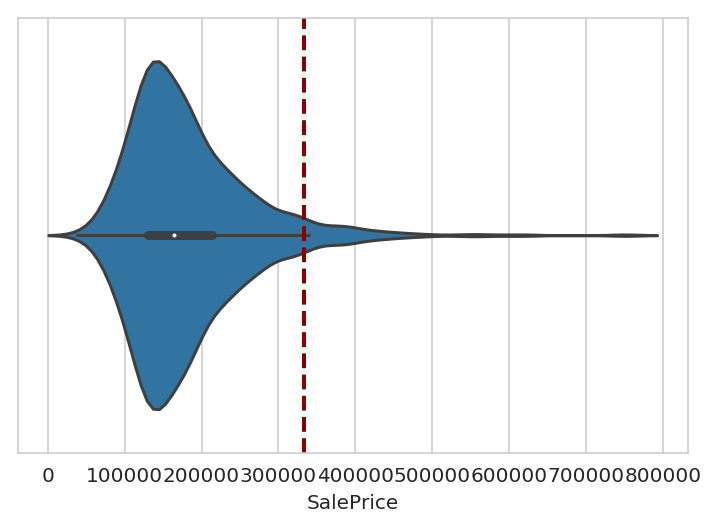

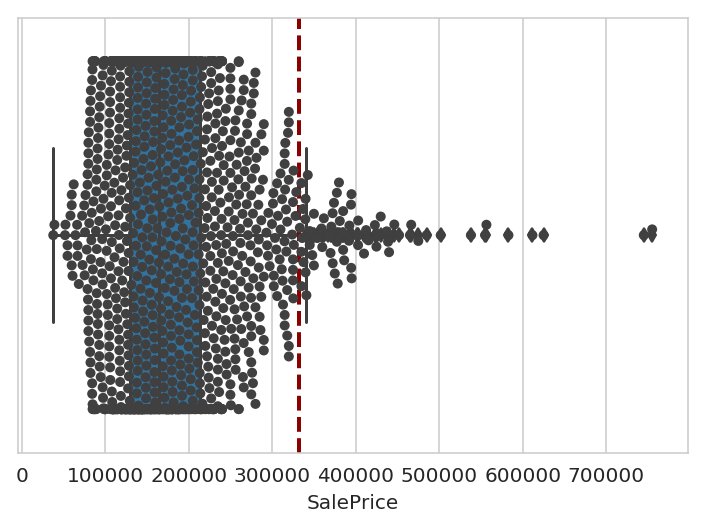

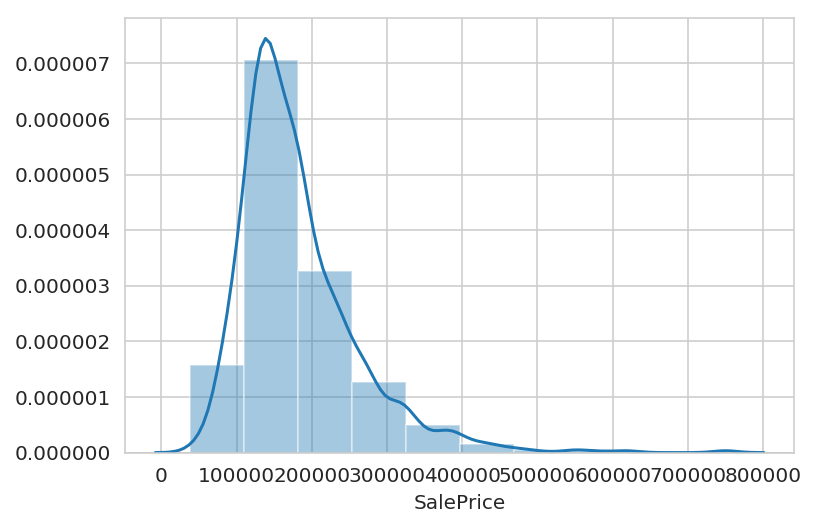

positive skewed


In [6]:
# 1) BOXPLOT & VIOLINPLOT

# Determine the outliers
q75, q25 = np.percentile(y_true, [75 ,25])
upper_bound=q75+1.5*np.std(y_true)
print('Total no. of outliers {}'.format((y_true>upper_bound).value_counts()[1]))
# Determine the percentage of outliers
print('Percentage of outliers {}'.format((y_true>upper_bound).value_counts()[1]/(y_true>upper_bound).value_counts().sum()*100))

sns.violinplot(y_true)
plt.axvline(x=upper_bound,linewidth=2, color='darkred',linestyle='--')
plt.show()

sns.boxplot(y_true)
sns.swarmplot(y_true, color=".25")
plt.axvline(x=upper_bound,linewidth=2, color='darkred',linestyle='--')
plt.show()

# 2) DISTRIBUTION PLOT

sns.distplot(y_true,bins=10)
plt.show()

# 3) SKEWNESS 
y_true.mode()[0]
dmean=y_true.describe()[1]
dmedian=y_true.describe()[5]
dmode=y_true.mode()[0]
if (dmean == dmedian) and (dmedian == dmode):
    print('symmetrical')

if (dmean < dmedian) and (dmedian < dmode):
    print('negative skewed')

if (dmean > dmedian) and (dmedian > dmode):
    print('positive skewed')

### Investigation 1.1: Outliers in SalePrice

1) After investigation, it seems like majority of the outliers data are from the NridgHt and NoRidge neighborhoods. Removing these outliers data could implicate the investigation of SalePrice of properties in these neighborhood. This is because these regions could be High-End properties. Hence, these outliers at NridgHt and NoRidge Neighborhood will remain.

In [7]:
# Investigate the Outliers ( Using Neighborhood as the base index to verify the SalePrice)

# Extracting the outliers for neighborhood and SalePrice
outliers=hse[hse['SalePrice']>upper_bound][['Neighborhood','SalePrice']]
# Determining the sum of saleprice per neighborhood
print(outliers.groupby('Neighborhood')['SalePrice'].sum().sort_values(ascending=False))
# Determining the no of properties per neighborhood in the outlier category
print(outliers.Neighborhood.value_counts())
# Determining the average cost of property per neighborhood
print((outliers.groupby('Neighborhood')['SalePrice'].sum()/outliers.Neighborhood.value_counts()).sort_values(ascending=False))



Neighborhood
NridgHt    12005512
NoRidge     6621668
StoneBr     3933475
Somerst     1473628
Crawfor     1467600
Timber      1458400
CollgCr      808840
OldTown      475000
Veenker      385000
Gilbert      377500
NAmes        345000
Name: SalePrice, dtype: int64
NridgHt    29
NoRidge    15
StoneBr     9
Crawfor     4
Timber      4
Somerst     4
CollgCr     2
OldTown     1
Gilbert     1
Veenker     1
NAmes       1
Name: Neighborhood, dtype: int64
OldTown    475000.000000
NoRidge    441444.533333
StoneBr    437052.777778
NridgHt    413983.172414
CollgCr    404420.000000
Veenker    385000.000000
Gilbert    377500.000000
Somerst    368407.000000
Crawfor    366900.000000
Timber     364600.000000
NAmes      345000.000000
dtype: float64


In [8]:
# After investigating the outliers, datas from NoRidge and Nridge will be maintained.
# This is because the contribution of the no. of houses and average prices of the houses seems to be major to the overall sample.
retain1=hse[hse['Neighborhood']=='NoRidge']
retain1_1=retain1[retain1['SalePrice']>upper_bound]
retain2=hse[hse['Neighborhood']=='NridgHt']
retain2_1=retain2[retain2['SalePrice']>upper_bound]
retain3=hse[hse['SalePrice']<=upper_bound]
# house[house[house['Neighborhood']=='NridgHt']['SalePrice']>upper_bound]

In [9]:
# Removing outliers except NrdgHt and NoRidge
hse_1=pd.concat([retain1_1,retain2_1,retain3])
hse_1.shape

(1423, 81)

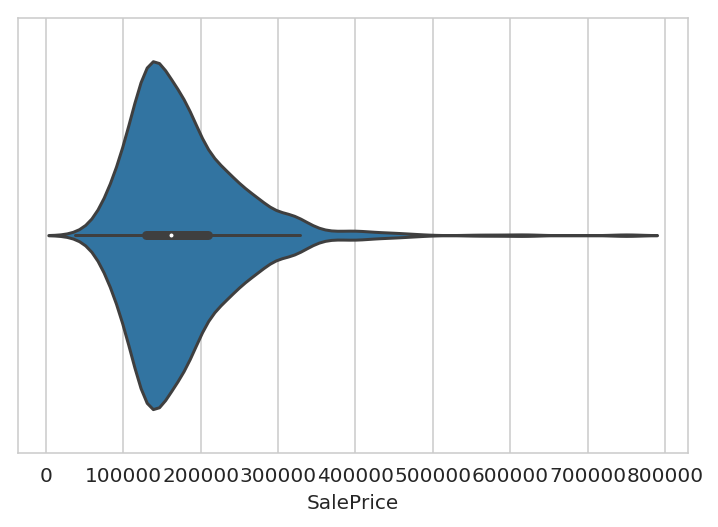

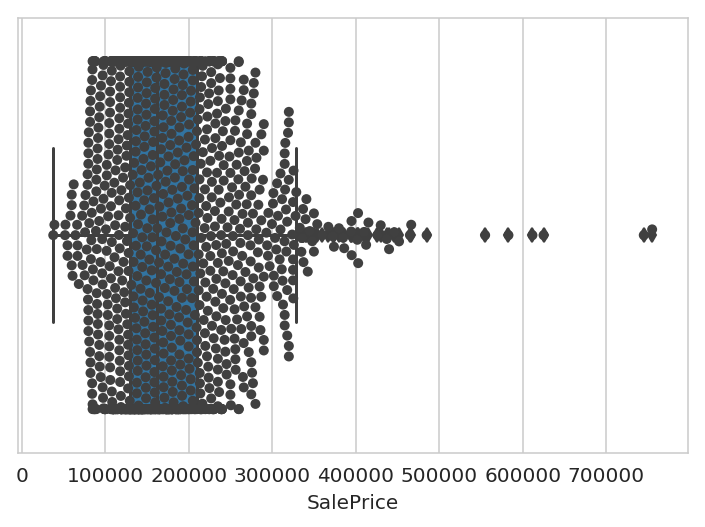

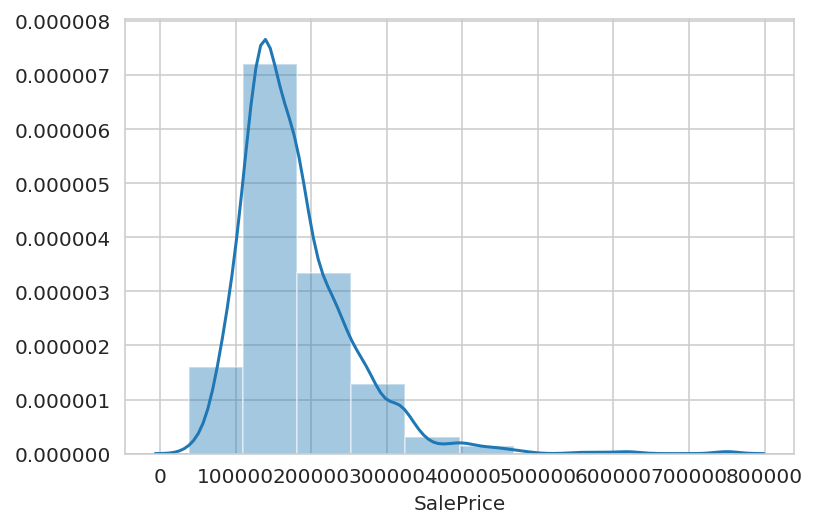

positive skewed


In [10]:
# Removing the outliers. See the implications to the overall distribution
y_true=hse_1['SalePrice']
# 1) BOXPLOT & VIOLINPLOT

sns.violinplot(y_true)
# plt.axvline(x=upper_bound,linewidth=2, color='darkred',linestyle='--')
plt.show()

sns.boxplot(y_true)
sns.swarmplot(y_true, color=".25")
# plt.axvline(x=upper_bound,linewidth=2, color='darkred',linestyle='--')
plt.show()

# 2) DISTRIBUTION PLOT

sns.distplot(y_true,bins=10)
plt.show()

# 3) SKEWNESS 
y_true.mode()[0]
dmean=y_true.describe()[1]
dmedian=y_true.describe()[5]
dmode=y_true.mode()[0]
if (dmean == dmedian) and (dmedian == dmode):
    print('symmetrical')

if (dmean < dmedian) and (dmedian < dmode):
    print('negative skewed')

if (dmean > dmedian) and (dmedian > dmode):
    print('positive skewed')



### Investigation 1.2 SalePrice VS Neighborhood
1) Based on correlation, four locations, `NoRidge, NridgHt, NAmes,and Oldtown` seem to have a positive and negative correlations

There is null values house[Neighborhood]: False


Text(0.5, 1.0, 'Distribution of Residential Properties')

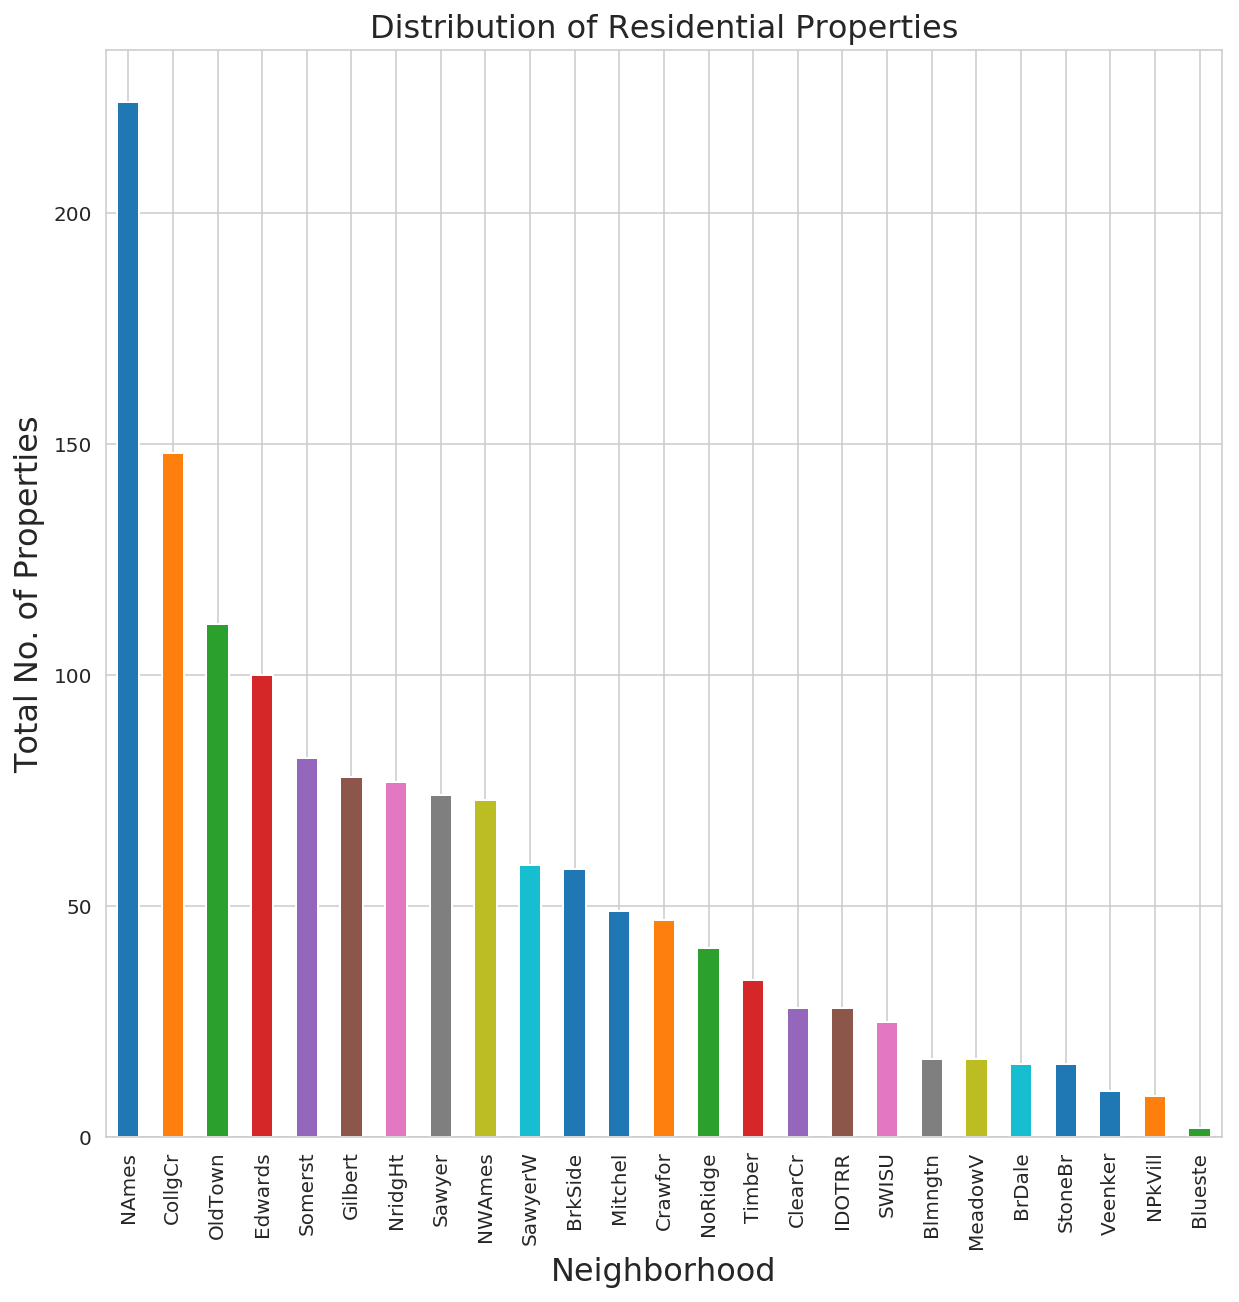

In [11]:
# Investigating the Neighborhood with SalePrice of Property
print('There is null values house[Neighborhood]:',hse_1['Neighborhood'].isnull().any())
plt.figure(figsize=(10,10))
hse_1['Neighborhood'].value_counts().plot(kind='bar')
plt.xlabel('Neighborhood',fontsize=16)
plt.ylabel('Total No. of Properties',fontsize=16)
plt.title('Distribution of Residential Properties',fontsize=16)

Text(0.5, 1.0, 'Distribution of Sum of Residential Properties')

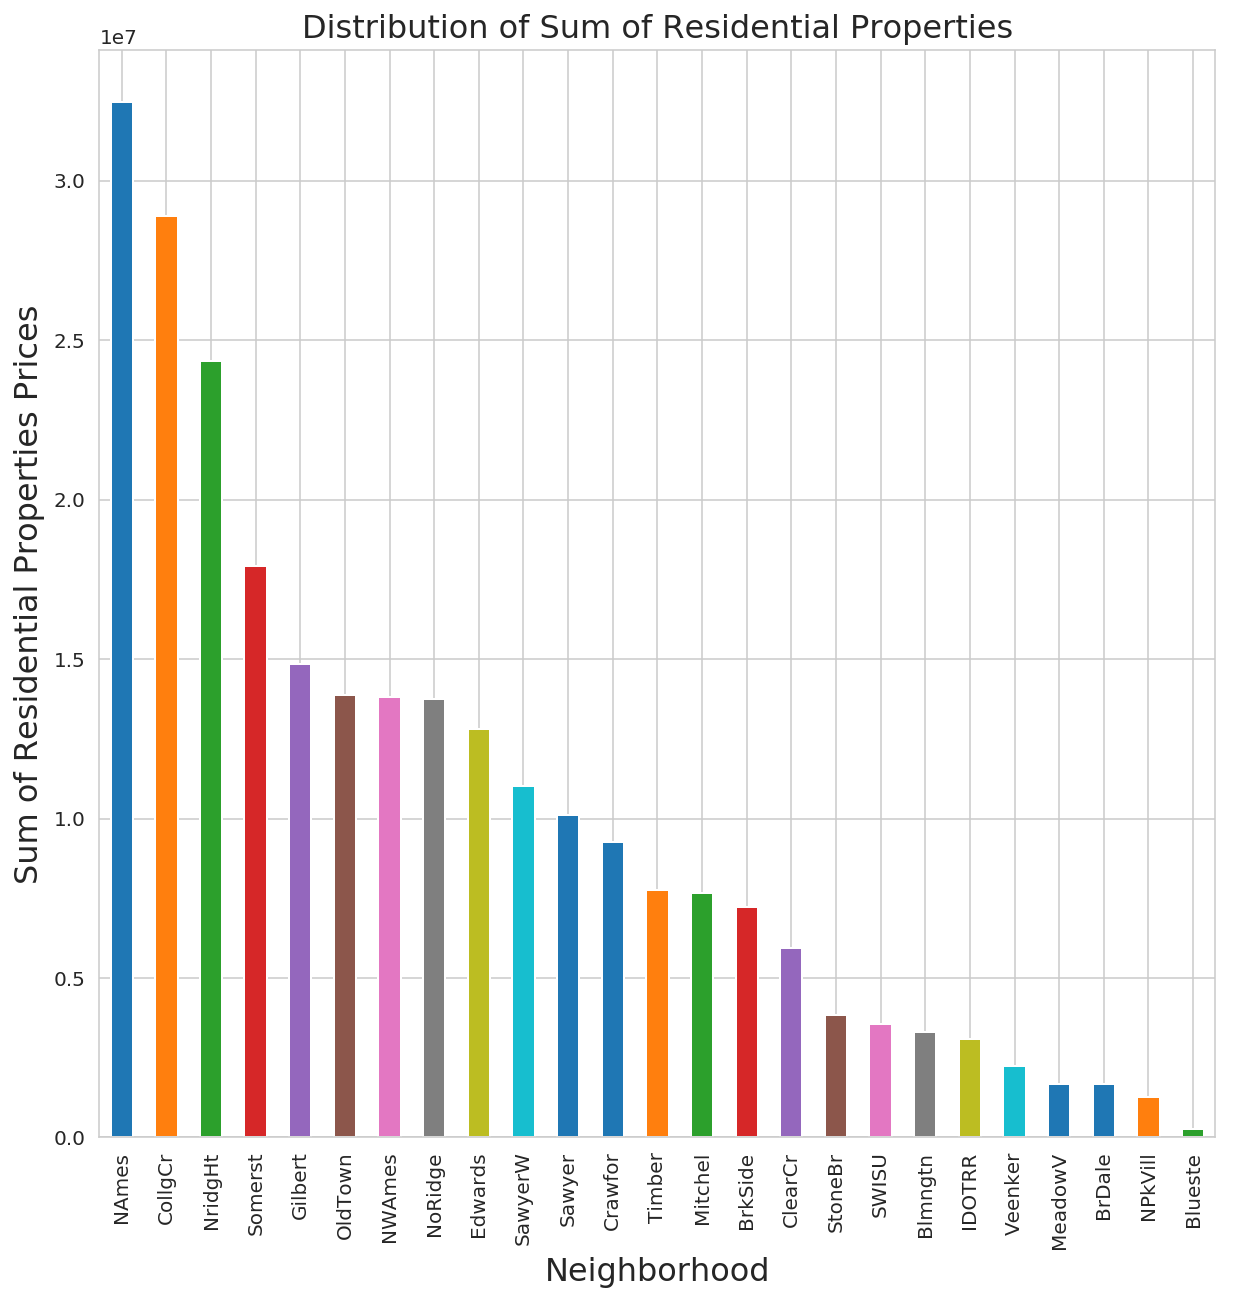

In [12]:
plt.figure(figsize=(10,10))
hse_1.groupby('Neighborhood')['SalePrice'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Neighborhood',fontsize=16)
plt.ylabel('Sum of Residential Properties Prices',fontsize=16)
plt.title('Distribution of Sum of Residential Properties',fontsize=16)

Text(0.5, 1.0, 'Distribution of Average Prices of Residential Properties')

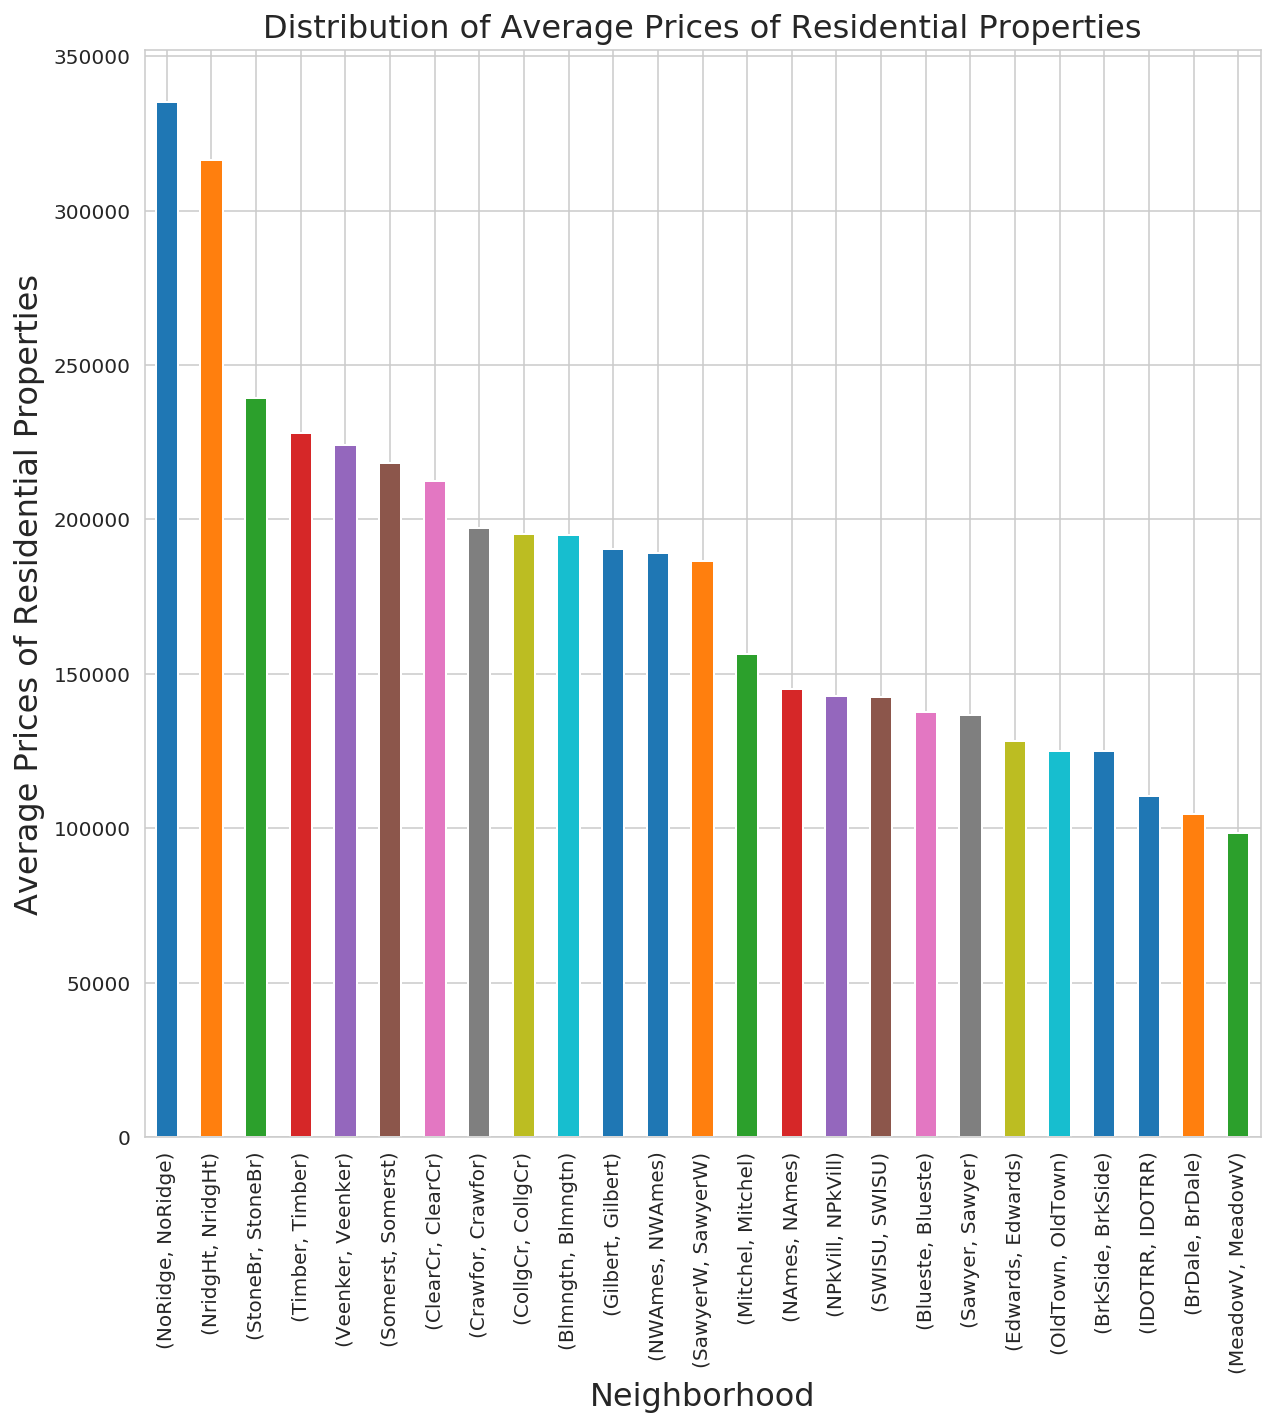

In [13]:
plt.figure(figsize=(10,10))
data=(hse_1.groupby('Neighborhood')['SalePrice'].sum())/(hse_1.groupby('Neighborhood')['Neighborhood'].value_counts())
data.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Neighborhood',fontsize=16)
plt.ylabel('Average Prices of Residential Properties',fontsize=16)
plt.title('Distribution of Average Prices of Residential Properties',fontsize=16)


In [14]:
# Checking if Neighborhood has some correlation with SalePrice

dummy_neighborhood=pd.get_dummies(hse_1['Neighborhood'])
hse_neighborhood=pd.concat([dummy_neighborhood,y_true],axis=1)
hse_neighborhood.corr()

Blmngtn   Blueste    BrDale   BrkSide   ClearCr   CollgCr  \
Blmngtn    1.000000 -0.004125 -0.011726 -0.022666 -0.015578 -0.037463   
Blueste   -0.004125  1.000000 -0.004001 -0.007733 -0.005315 -0.012782   
BrDale    -0.011726 -0.004001  1.000000 -0.021982 -0.015108 -0.036332   
BrkSide   -0.022666 -0.007733 -0.021982  1.000000 -0.029204 -0.070230   
ClearCr   -0.015578 -0.005315 -0.015108 -0.029204  1.000000 -0.048269   
CollgCr   -0.037463 -0.012782 -0.036332 -0.070230 -0.048269  1.000000   
Crawfor   -0.020322 -0.006934 -0.019708 -0.038097 -0.026184 -0.062967   
Edwards   -0.030231 -0.010314 -0.029318 -0.056672 -0.038950 -0.093669   
Gilbert   -0.026480 -0.009034 -0.025680 -0.049640 -0.034118 -0.082047   
IDOTRR    -0.015578 -0.005315 -0.015108 -0.029204 -0.020072 -0.048269   
MeadowV   -0.012091 -0.004125 -0.011726 -0.022666 -0.015578 -0.037463   
Mitchel   -0.020765 -0.007085 -0.020138 -0.038927 -0.026754 -0.064340   
NAmes     -0.047528 -0.016216 -0.046092 -0.089097 -0.061236 -0.147262   
NPkVill   -0.008773 -0.002993 -0.008508 -0.016445 -0.011303 -0.027181   
NWAmes    -0.025570 -0.008724 -0.024797 -0.047934 -0.032945 -0.079226   
NoRidge   -0.018940 -0.006462 -0.018368 -0.035505 -0.024402 -0.058683   
NridgHt   -0.026300 -0.008973 -0.025506 -0.049303 -0.033886 -0.081489   
OldTown   -0.031984 -0.010912 -0.031018 -0.059957 -0.041208 -0.099099   
SWISU     -0.014704 -0.005017 -0.014260 -0.027565 -0.018946 -0.045561   
Sawyer    -0.025754 -0.008787 -0.024976 -0.048279 -0.033182 -0.079797   
SawyerW   -0.022869 -0.007803 -0.022178 -0.042871 -0.029465 -0.070859   
Somerst   -0.027191 -0.009277 -0.026370 -0.050973 -0.035034 -0.084250   
StoneBr   -0.011726 -0.004001 -0.011372 -0.021982 -0.015108 -0.036332   
Timber    -0.017204 -0.005870 -0.016684 -0.032250 -0.022166 -0.053305   
Veenker   -0.009250 -0.003156 -0.008971 -0.017341 -0.011918 -0.028662   
SalePrice  0.025842 -0.020412 -0.105820 -0.147612  0.067339  0.081481   

            Crawfor   Edwards   Gilbert    IDOTRR   MeadowV   Mitchel  \
Blmngtn   -0.020322 -0.030231 -0.026480 -0.015578 -0.012091 -0.020765   
Blueste   -0.006934 -0.010314 -0.009034 -0.005315 -0.004125 -0.007085   
BrDale    -0.019708 -0.029318 -0.025680 -0.015108 -0.011726 -0.020138   
BrkSide   -0.038097 -0.056672 -0.049640 -0.029204 -0.022666 -0.038927   
ClearCr   -0.026184 -0.038950 -0.034118 -0.020072 -0.015578 -0.026754   
CollgCr   -0.062967 -0.093669 -0.082047 -0.048269 -0.037463 -0.064340   
Crawfor    1.000000 -0.050811 -0.044507 -0.026184 -0.020322 -0.034902   
Edwards   -0.050811  1.000000 -0.066207 -0.038950 -0.030231 -0.051919   
Gilbert   -0.044507 -0.066207  1.000000 -0.034118 -0.026480 -0.045477   
IDOTRR    -0.026184 -0.038950 -0.034118  1.000000 -0.015578 -0.026754   
MeadowV   -0.020322 -0.030231 -0.026480 -0.015578  1.000000 -0.020765   
Mitchel   -0.034902 -0.051919 -0.045477 -0.026754 -0.020765  1.000000   
NAmes     -0.079883 -0.118832 -0.104088 -0.061236 -0.047528 -0.081624   
NPkVill   -0.014745 -0.021934 -0.019212 -0.011303 -0.008773 -0.015066   
NWAmes    -0.042977 -0.063931 -0.055999 -0.032945 -0.025570 -0.043914   
NoRidge   -0.031833 -0.047354 -0.041479 -0.024402 -0.018940 -0.032527   
NridgHt   -0.044204 -0.065757 -0.057598 -0.033886 -0.026300 -0.045168   
OldTown   -0.053757 -0.079968 -0.070046 -0.041208 -0.031984 -0.054929   
SWISU     -0.024715 -0.036765 -0.032203 -0.018946 -0.014704 -0.025253   
Sawyer    -0.043286 -0.064392 -0.056402 -0.033182 -0.025754 -0.044230   
SawyerW   -0.038438 -0.057179 -0.050085 -0.029465 -0.022869 -0.039276   
Somerst   -0.045702 -0.067985 -0.059550 -0.035034 -0.027191 -0.046698   
StoneBr   -0.019708 -0.029318 -0.025680 -0.015108 -0.011726 -0.020138   
Timber    -0.028915 -0.043014 -0.037677 -0.022166 -0.017204 -0.029546   
Veenker   -0.015548 -0.023129 -0.020259 -0.011918 -0.009250 -0.015887   
SalePrice  0.049593 -0.184236  0.042260 -0.129086 -0.117951 -0.054612   

              NAmes   NPkVill    NWAmes   NoRidge   NridgHt   OldTow

Text(0.5, 1.0, 'Heatmap SalePrice VS Neighborhood')

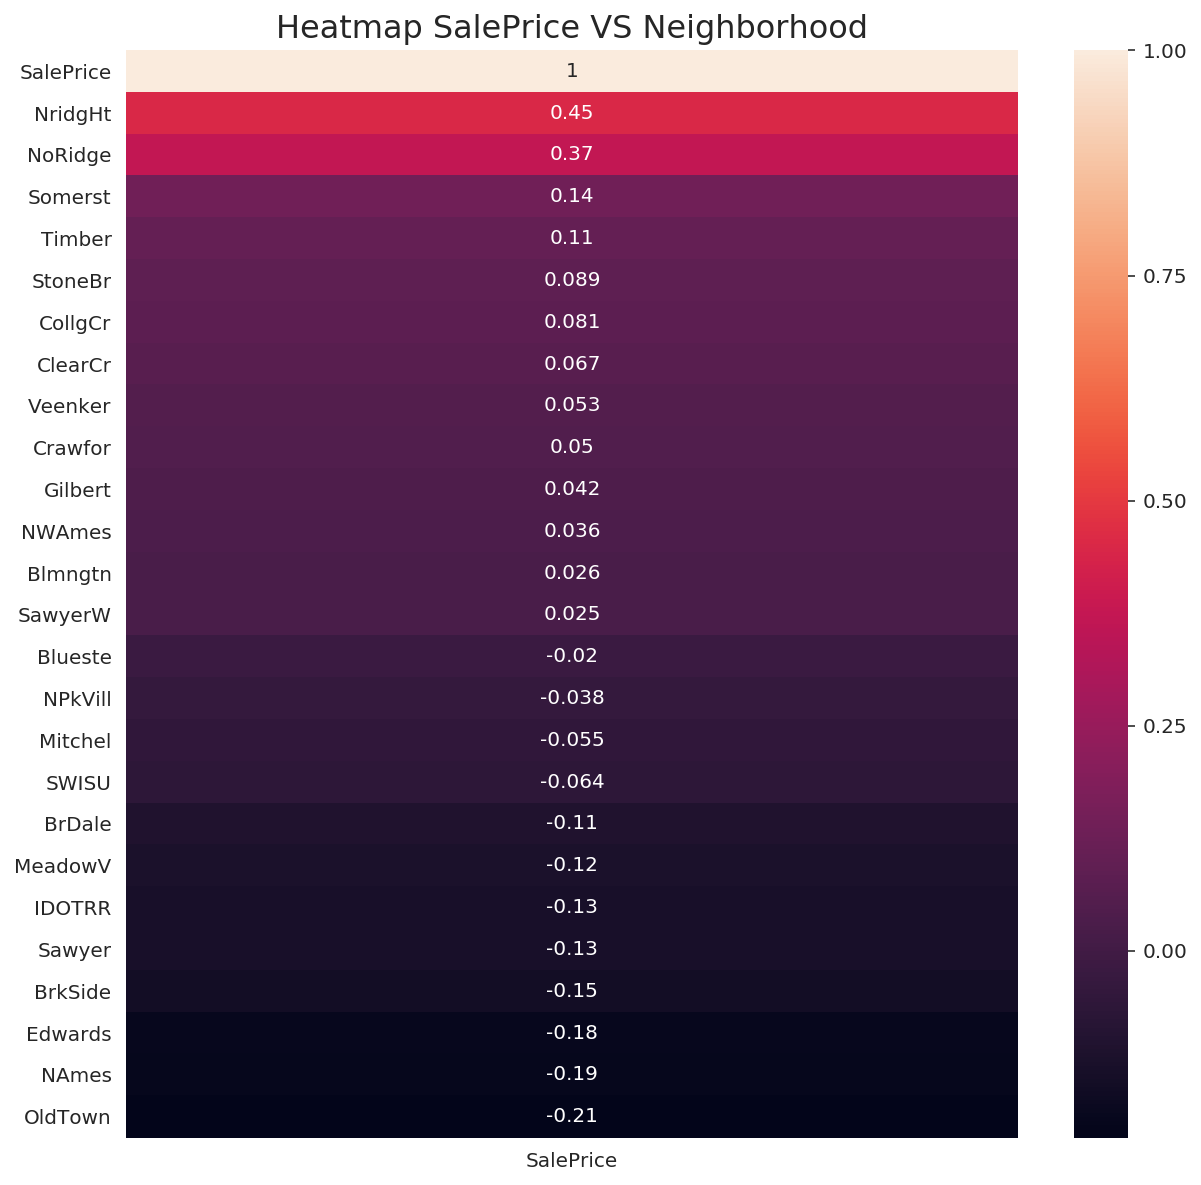

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_neighborhood.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title('Heatmap SalePrice VS Neighborhood',fontsize=16)

### Investigation 1.3 SalePrice VS 'YearBuilt','YearRemodAdd'

1) The year built of a property could be important as it could mean the property is a heritage asset.

2) Based on the correlation, both `YearBuilt` and `YearRemodAdd` seem to be quite positively correlated with sale price. 


In [16]:
hse_year=hse_1[['YearBuilt','YearRemodAdd']]
hse_year['SalePrice']=hse_1['SalePrice']
print('There is null values:\n',hse_year.isnull().any())
print(hse_year.describe())

There is null values:
 YearBuilt       False
YearRemodAdd    False
SalePrice       False
dtype: bool
         YearBuilt  YearRemodAdd      SalePrice
count  1423.000000   1423.000000    1423.000000
mean   1971.229796   1984.723823  177565.160225
std      29.920568     20.567006   73662.450732
min    1872.000000   1950.000000   37900.000000
25%    1954.000000   1967.000000  129950.000000
50%    1972.000000   1993.000000  162000.000000
75%    2000.000000   2004.000000  210000.000000
max    2009.000000   2010.000000  755000.000000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
hse_year.corr()

YearBuilt  YearRemodAdd  SalePrice
YearBuilt      1.000000      0.587804   0.532138
YearRemodAdd   0.587804      1.000000   0.500333
SalePrice      0.532138      0.500333   1.000000

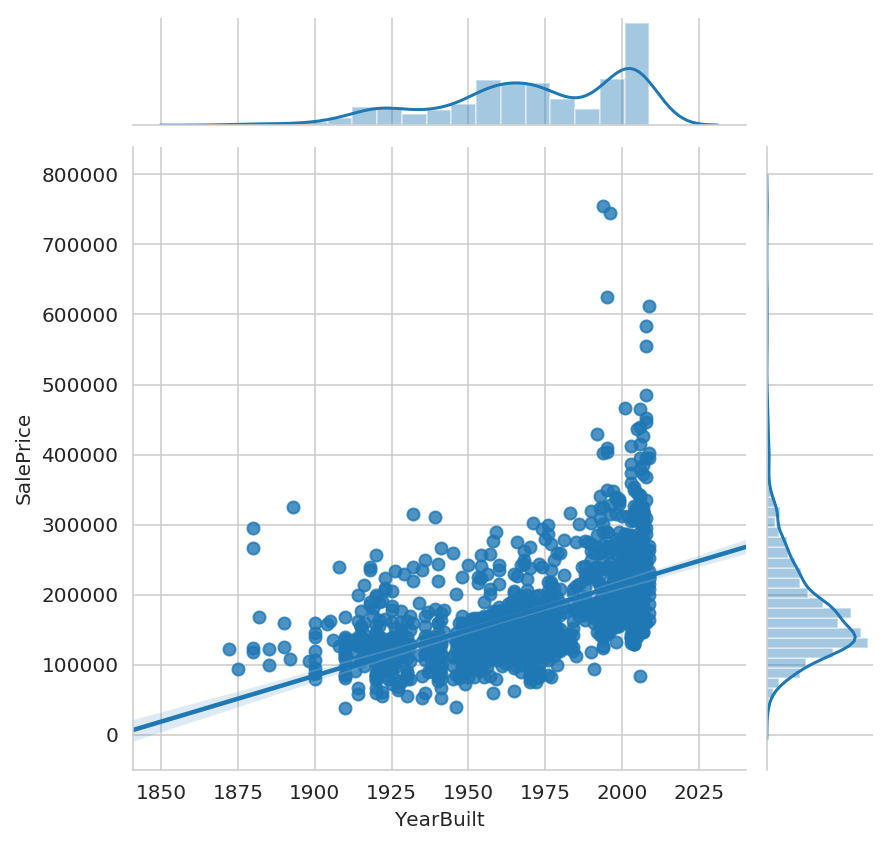

In [18]:
sns.jointplot(x='YearBuilt', y='SalePrice', data=hse_year,kind='reg')


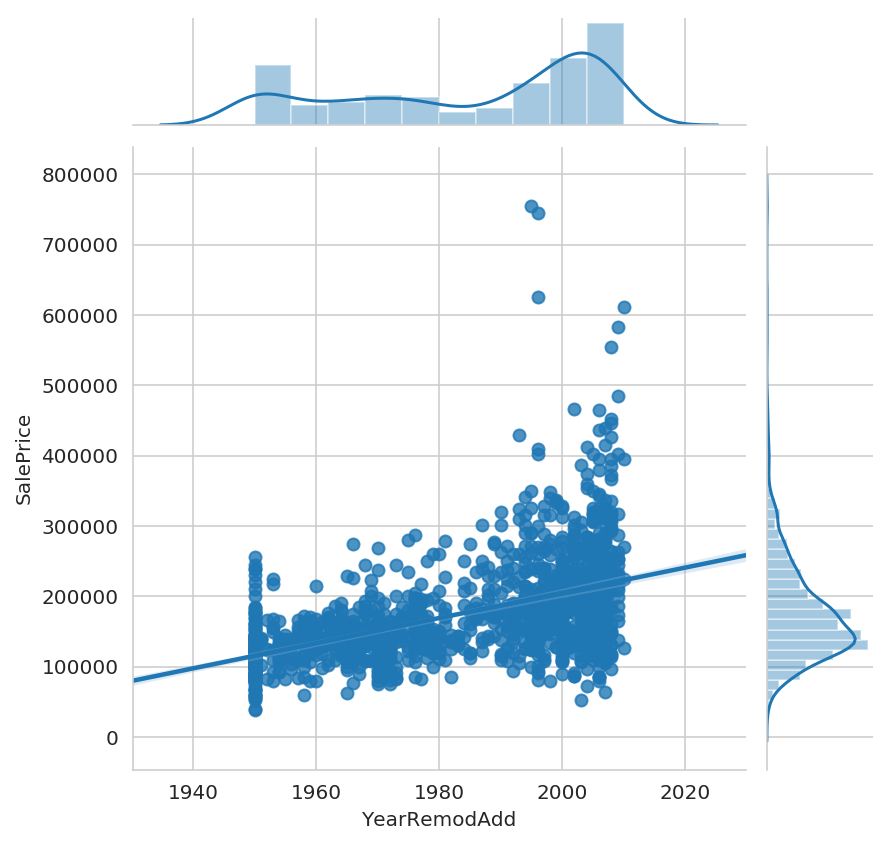

In [19]:
sns.jointplot(x='YearRemodAdd', y='SalePrice', data=hse_year,kind='reg')


### Investigation 1.4 SalePrice VS 'Foundation'

1) Based on the correlation, the foundation type `PConc` showed relatively strong positive correlation with SalePrice. While `BrkTil` and `Cblock` are both showing negative correlation with SalePrice. The other features can be drop as the correlation with SalePrice are relatively weak.

In [20]:
print('There is null values:',hse_1['Foundation'].isnull().any())

There is null values: False


In [21]:
dummy_foundation=pd.get_dummies(hse_1['Foundation'])
hse_foundation=pd.concat([dummy_foundation,hse_1['SalePrice']],axis=1)

In [22]:
hse_foundation.corr(method='spearman')

BrkTil    CBlock     PConc      Slab     Stone      Wood  \
BrkTil     1.000000 -0.294959 -0.295802 -0.043778 -0.019848 -0.015363   
CBlock    -0.294959  1.000000 -0.780976 -0.115583 -0.052402 -0.040562   
PConc     -0.295802 -0.780976  1.000000 -0.115914 -0.052552 -0.040678   
Slab      -0.043778 -0.115583 -0.115914  1.000000 -0.007778 -0.006020   
Stone     -0.019848 -0.052402 -0.052552 -0.007778  1.000000 -0.002729   
Wood      -0.015363 -0.040562 -0.040678 -0.006020 -0.002729  1.000000   
SalePrice -0.258047 -0.360271  0.556395 -0.155718 -0.005985  0.012905   

           SalePrice  
BrkTil     -0.258047  
CBlock     -0.360271  
PConc       0.556395  
Slab       -0.155718  
Stone      -0.005985  
Wood        0.012905  
SalePrice   1.000000

Text(0.5, 1.0, 'Heatmap SalePrice VS Foundation')

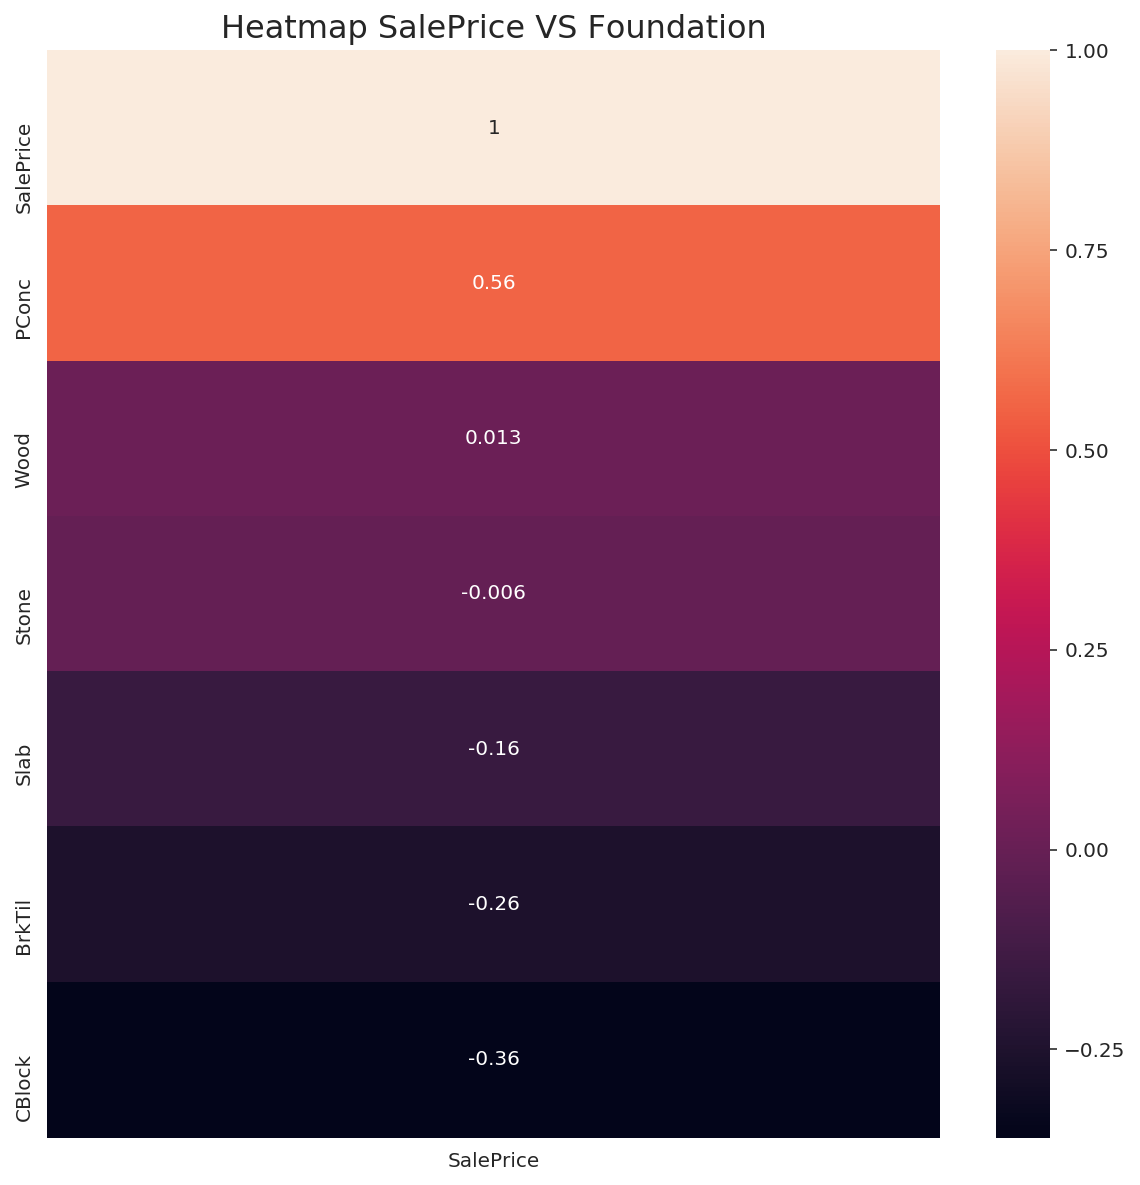

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_foundation.corr('spearman')[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title('Heatmap SalePrice VS Foundation',fontsize=16)

### Investigation 1.5 SalePrice VS 'PoolArea','PoolQC

1) Will be combining these two features together to investigate the implication of a given area of the pool with respect to the condition of the pool towards SaleP_rice (feature engineering)

2) The presence of null values will be left as it is as the null values in `PoolQC` represents no pool.

3) Based on the correlation with SalePrice, all pool attributes seems to be weakly correlated with SalePrice. The feature with the strongest correlation is `PoolCond_Ex_Area` and `PoolCond_Ex` which is pool are with excellent condition

In [24]:
print('There is null values:\n',hse_1[['PoolArea','PoolQC']].isnull().any())

There is null values:
 PoolArea    False
PoolQC       True
dtype: bool


In [25]:
#converting PoolQC to dummy variables
dummy_pool=pd.get_dummies(hse_1['PoolQC'])
hse_pool=pd.concat([dummy_pool,hse_1['PoolArea']],axis=1)
hse_pool['PoolCond_Ex_Area']=hse_pool['Ex']*hse_pool['PoolArea']
hse_pool['PoolCond_Fa_Area']=hse_pool['Fa']*hse_pool['PoolArea']
hse_pool['PoolCond_Gd_Area']=hse_pool['Gd']*hse_pool['PoolArea']
hse_pool['SalePrice']=hse_1['SalePrice']
hse_pool.columns=['PoolCond_Ex', 'PoolCond_Fa', 'PoolCond_Gd', 'PoolArea', 'PoolCond_Ex_Area', 'PoolCond_Fa_Area',
       'PoolCond_Gd_Area', 'SalePrice']

In [26]:
hse_pool.corr(method='pearson')

PoolCond_Ex  PoolCond_Fa  PoolCond_Gd  PoolArea  \
PoolCond_Ex          1.000000    -0.001407    -0.001724  0.489398   
PoolCond_Fa         -0.001407     1.000000    -0.001724  0.535510   
PoolCond_Gd         -0.001724    -0.001724     1.000000  0.672477   
PoolArea             0.489398     0.535510     0.672477  1.000000   
PoolCond_Ex_Area     0.999188    -0.001406    -0.001723  0.489799   
PoolCond_Fa_Area    -0.001399     0.993937    -0.001714  0.538799   
PoolCond_Gd_Area    -0.001698    -0.001698     0.984485  0.683131   
SalePrice            0.159178     0.019327     0.015246  0.104120   

                  PoolCond_Ex_Area  PoolCond_Fa_Area  PoolCond_Gd_Area  \
PoolCond_Ex               0.999188         -0.001399         -0.001698   
PoolCond_Fa              -0.001406          0.993937         -0.001698   
PoolCond_Gd              -0.001723         -0.001714          0.984485   
PoolArea                  0.489799          0.538799          0.683131   
PoolCond_Ex_Area          1.000000         -0.001398         -0.001696   
PoolCond_Fa_Area         -0.001398          1.000000         -0.001687   
PoolCond_Gd_Area         -0.001696         -0.001687          1.000000   
SalePrice                 0.164280          0.017279          0.020440   

                  SalePrice  
PoolCond_Ex        0.159178  
PoolCond_Fa        0.019327  
PoolCond_Gd        0.015246  
PoolArea           0.104120  
PoolCond_Ex_Area   0.164280  
PoolCond_Fa_Area   0.017279  
PoolCond_Gd_Area   0.020440  
SalePrice          1.000000

Text(0.5, 1.0, 'Heatmap SalePrice VS Pool')

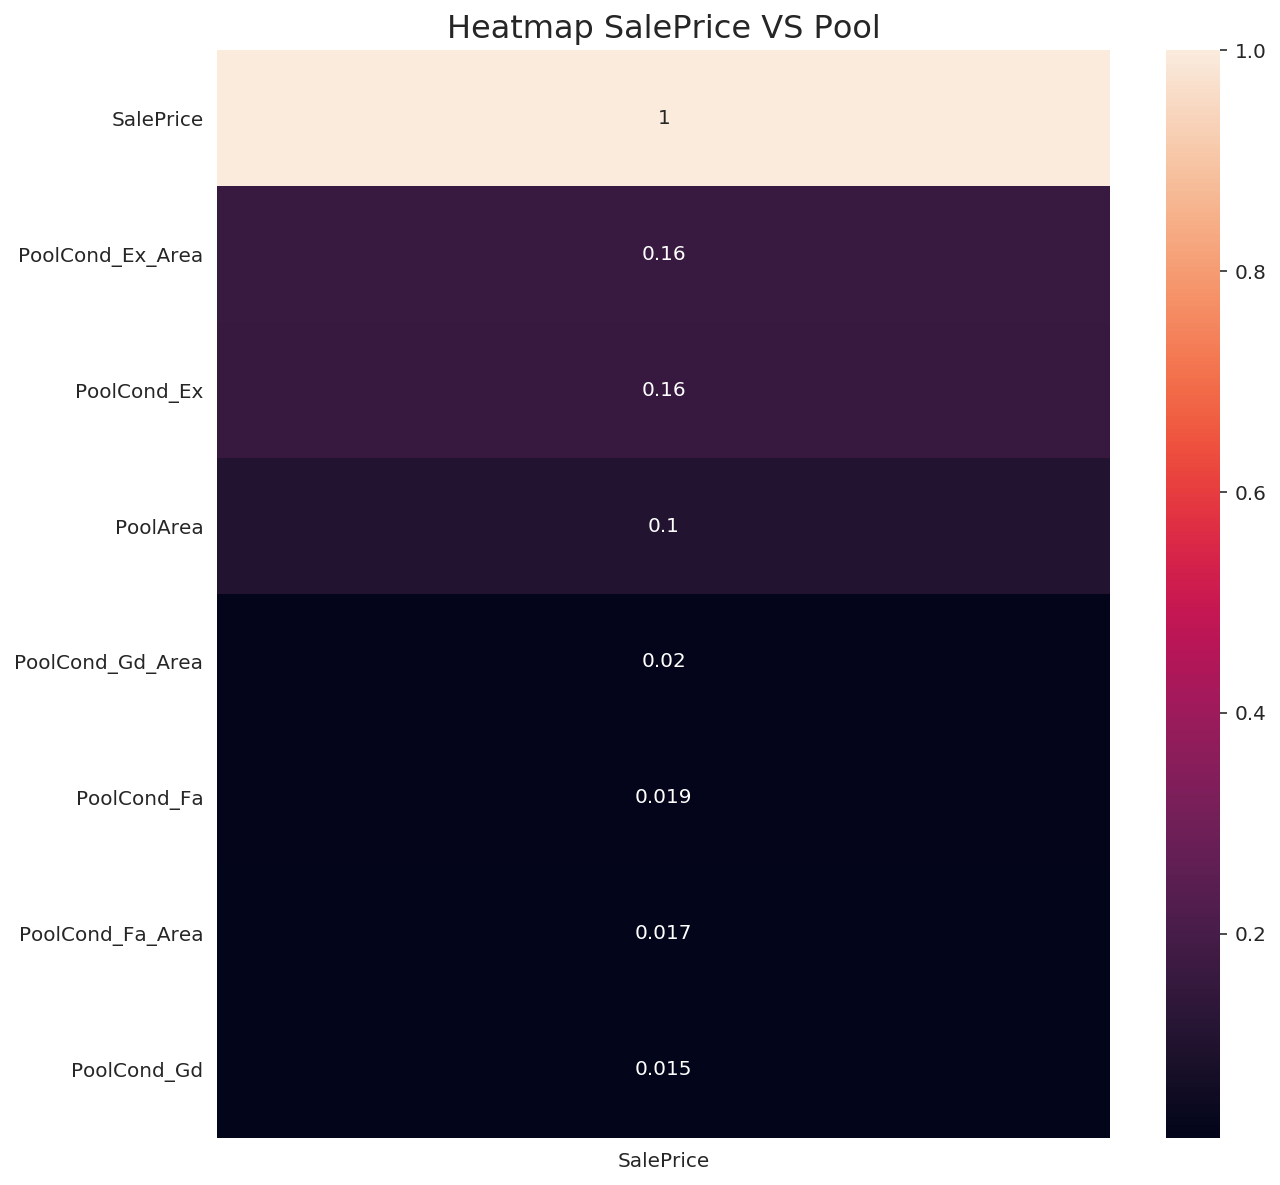

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_pool.corr('pearson')[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title('Heatmap SalePrice VS Pool',fontsize=16)

### Investigation 1.6 SalePrice VS '1stFlrSF' , '2ndFlrSF'

1) These two features will be added together to investigate the interaction with having larger area with SalesPrice (feature engineering)

2) Joining the two features together `1st_2ndFLSF` has shown a strong positive correlation with SalePrice. This indicates that the more floor surface in a property, the higher the SalePrice. Similarly for `1stFlrSF`, the significantly strong positive correlation with SalePrice is due that all property sold have a 1st Floor and with a larger floor area, the higher the price. Based on the jointplot for 2nd FlrSF, there are a significant number properties without second floor, which causes the data to the weakly positive skewed with respect to SalePrice and bimodal.

In [28]:
print('There is null values:\n',hse_1[['1stFlrSF','2ndFlrSF']].isnull().any())

There is null values:
 1stFlrSF    False
2ndFlrSF    False
dtype: bool


In [29]:
joined=hse_1['1stFlrSF']+hse_1['2ndFlrSF']
hse_sqft=hse_1[['1stFlrSF','2ndFlrSF']]
hse_sqft['1st_2ndFLSF']=joined
hse_sqft['SalePrice']=hse_1['SalePrice']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
hse_sqft.corr('spearman')

1stFlrSF  2ndFlrSF  1st_2ndFLSF  SalePrice
1stFlrSF     1.000000 -0.292784     0.479233   0.554714
2ndFlrSF    -0.292784  1.000000     0.648244   0.296012
1st_2ndFLSF  0.479233  0.648244     1.000000   0.728636
SalePrice    0.554714  0.296012     0.728636   1.000000

Text(0.5, 1.0, 'Heatmap SalePrice VS Square 1st and 2nd Floor')

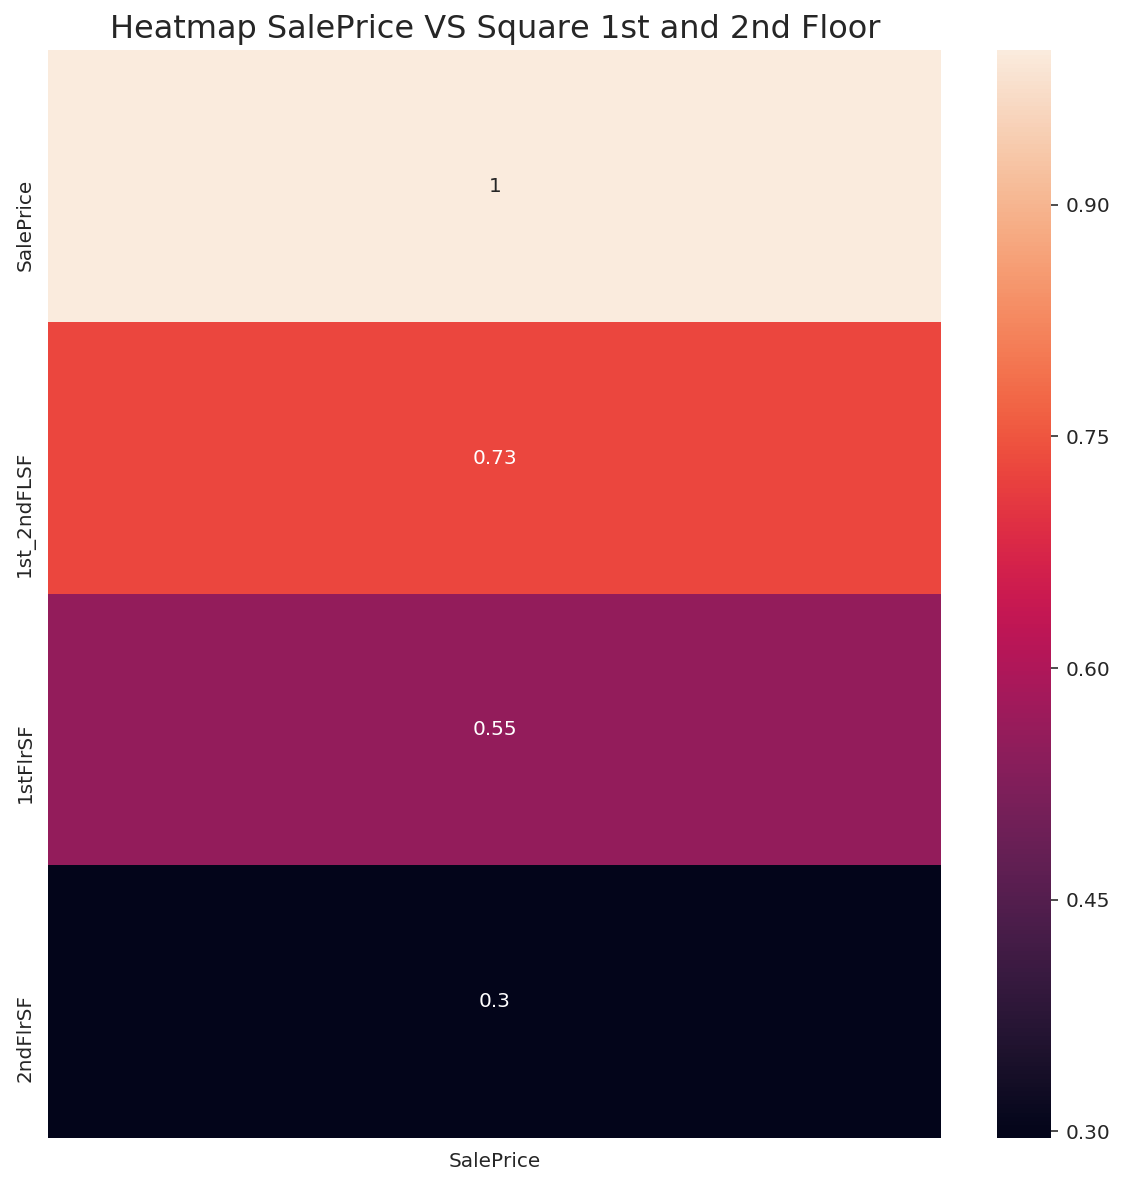

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_sqft.corr('spearman')[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title('Heatmap SalePrice VS Square 1st and 2nd Floor',fontsize=16)

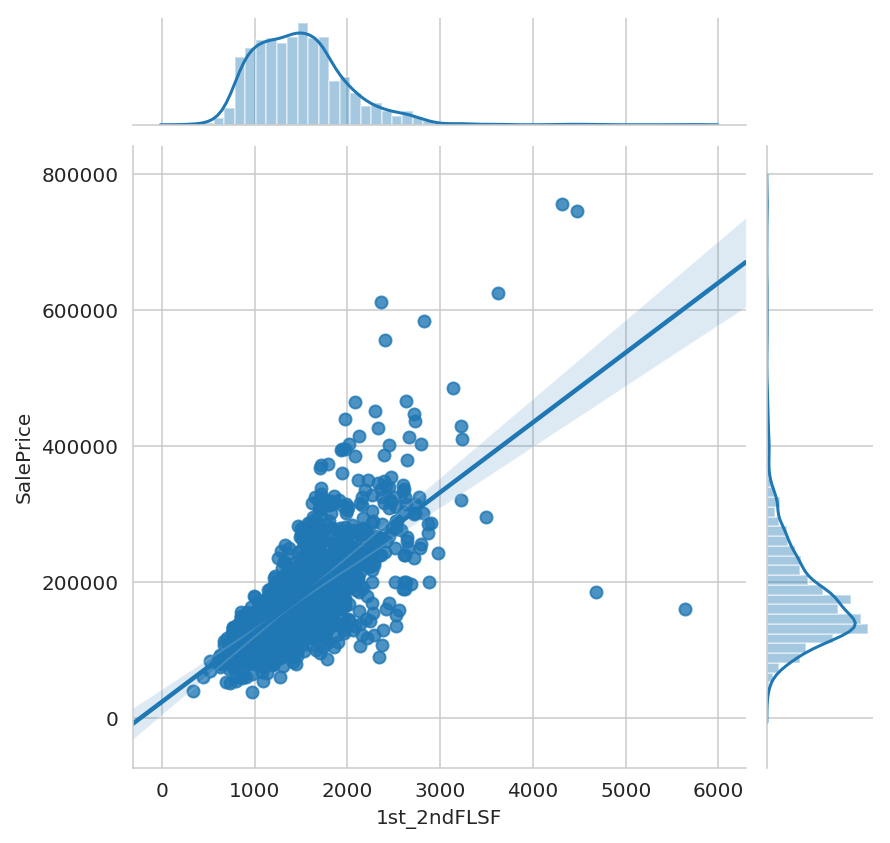

In [32]:
sns.jointplot(x='1st_2ndFLSF', y='SalePrice', data=hse_sqft,kind='reg')

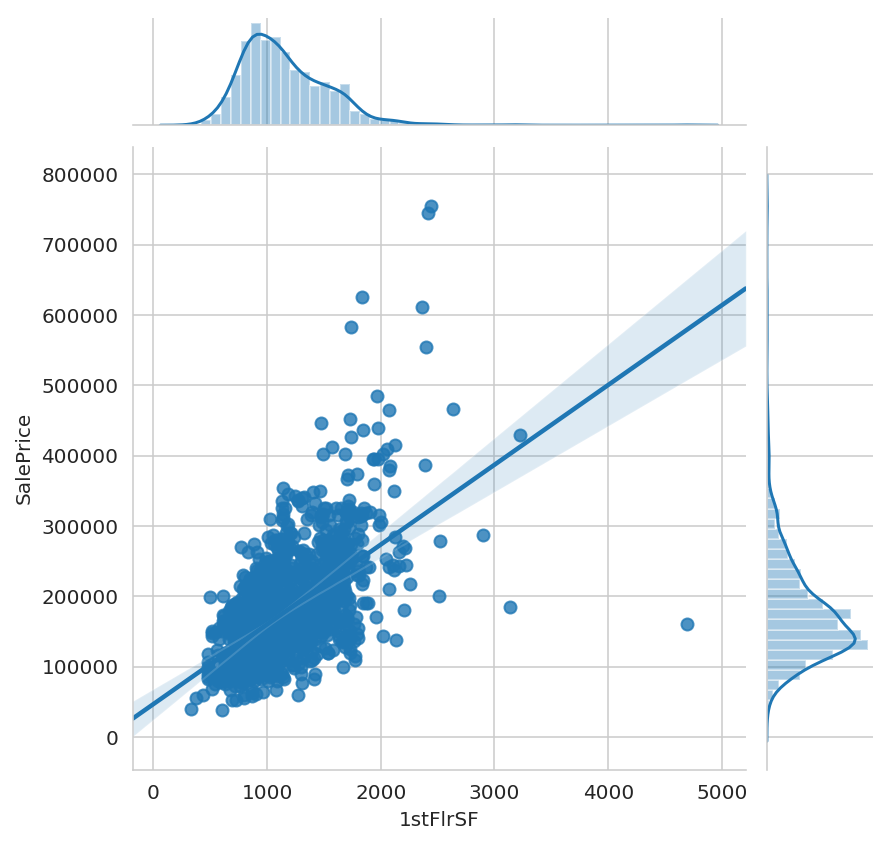

In [33]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=hse_sqft,kind='reg')

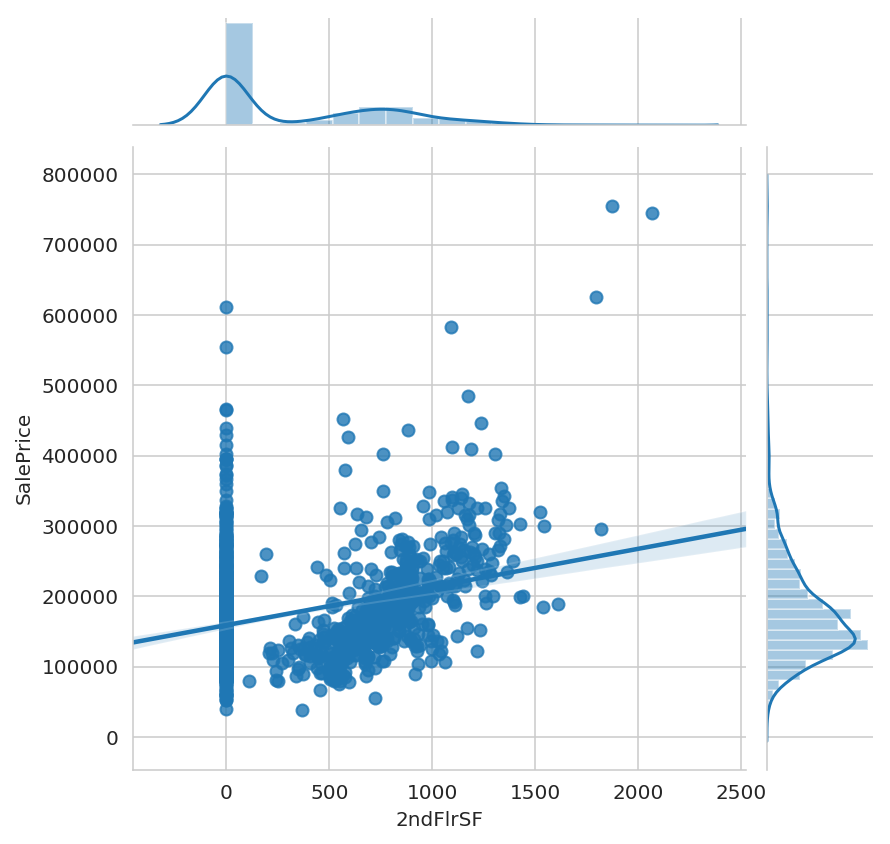

In [34]:
sns.jointplot(x='2ndFlrSF', y='SalePrice', data=hse_sqft,kind='reg')

### Investigation 1.7 SalePrice VS 'SaleType','SaleCondition'

1) From the sale conditions VS sale price, it seems most the sale conditions are normal sales and the total sum of sales from normal sale holds the largest proportion of the overall costs of sales. However, by taking the average of each transaction, partial sale (new homes) seems to be carrying a lot of weightage. This could mean that new properties have been significantly more costly than older properties.

2) Similarly for the sale type, similar trends can be noticed with new properties. The number of properties sold if very few but the average seems to be very large with each transaction. Majority of the sale of properties is done through warranty deed(conventional)

3) It seems from correlation, the sale condition and sale type features are weakly correlation to the SalePrice. Only `SaleType_New, SaleCondition_Partial and SaleType_WD` are significantly correlated relative to other features with SalePrice. `SaleType_New and SaleCondition_Partial` are positively correlated with SalePrice because each transaction that happens are off significant value,while `SaleType_WD` transaction occure frequently but off smaller values, making it negatively correled with SalePrice

In [35]:
print('There is null values:\n', hse_1[['SaleType','SaleCondition']].isnull().any())


There is null values:
 SaleType         False
SaleCondition    False
dtype: bool


Text(0.5, 1.0, 'Distribution of Sale Condition')

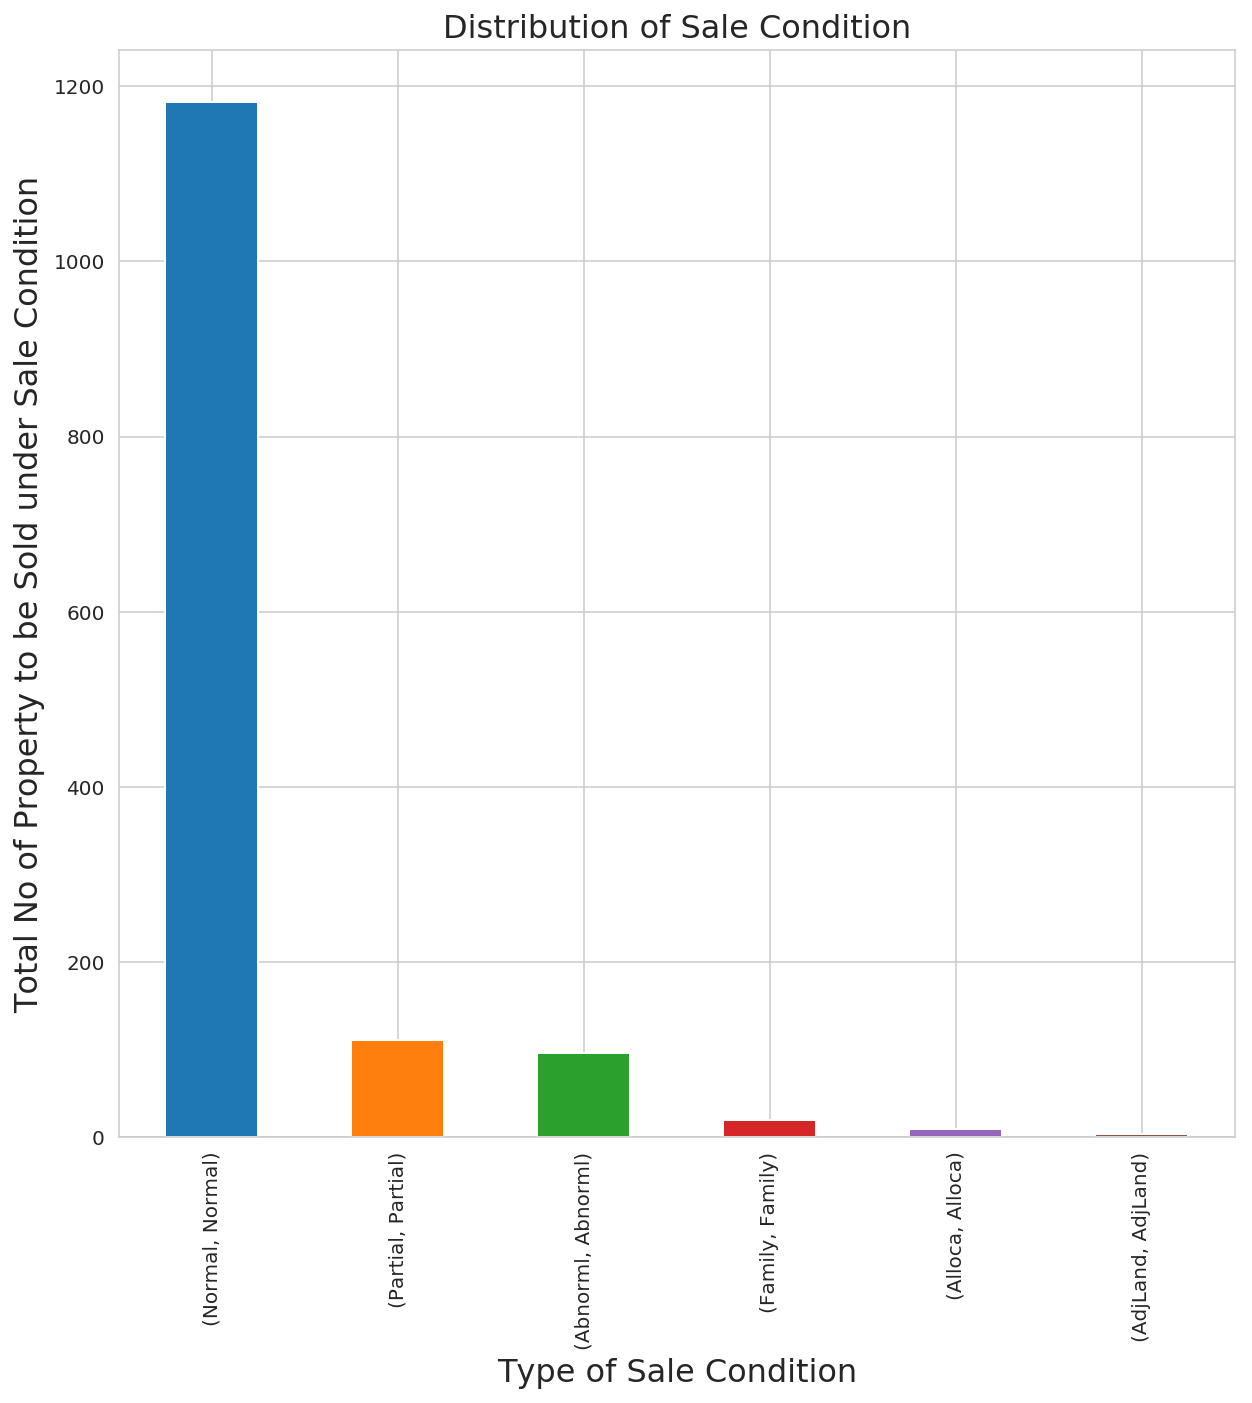

In [36]:
plt.figure(figsize=(10,10))
data=(hse_1.groupby('SaleCondition')['SaleCondition'].value_counts())
data.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Type of Sale Condition',fontsize=16)
plt.ylabel('Total No of Property to be Sold under Sale Condition',fontsize=16)
plt.title('Distribution of Sale Condition',fontsize=16)

Text(0.5, 1.0, 'Distribution of Sale Condition')

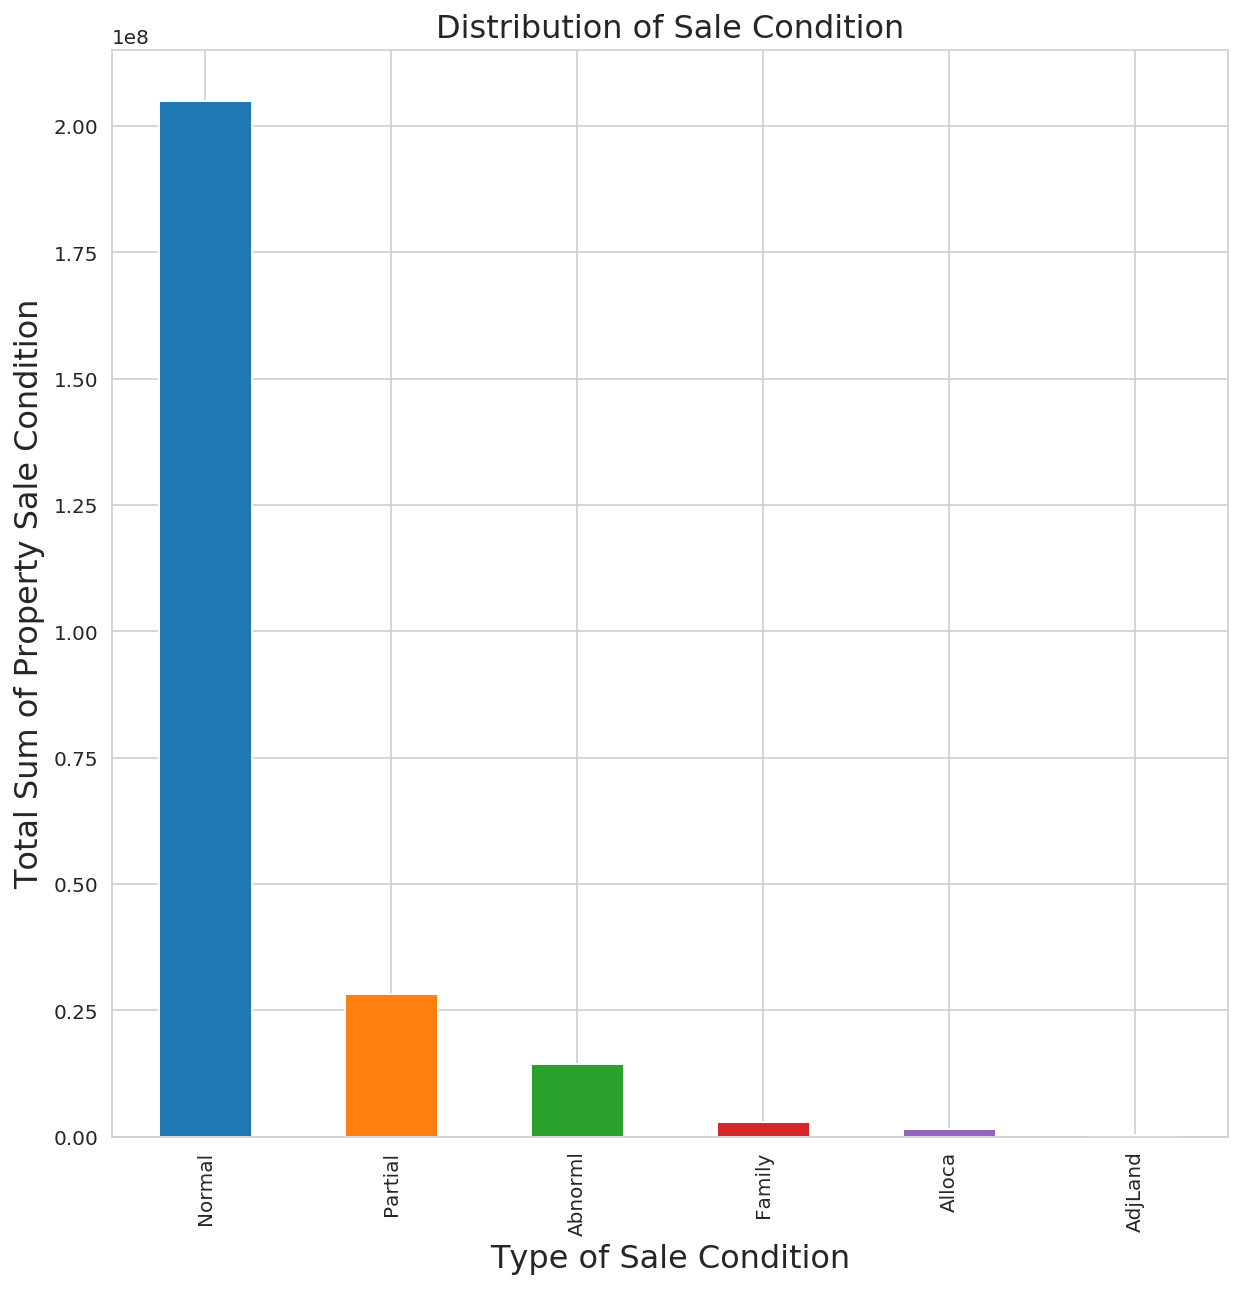

In [37]:
plt.figure(figsize=(10,10))
data=(hse_1.groupby('SaleCondition')['SalePrice'].sum())
data.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Type of Sale Condition',fontsize=16)
plt.ylabel('Total Sum of Property Sale Condition',fontsize=16)
plt.title('Distribution of Sale Condition',fontsize=16)

In [38]:
print(hse_1.groupby('SaleCondition')['SalePrice'].sum())
print(hse_1.groupby('SaleCondition')['SaleCondition'].value_counts())

SaleCondition
Abnorml     14472802
AdjLand       416500
Alloca       1593436
Family       2992000
Normal     204886933
Partial     28313552
Name: SalePrice, dtype: int64
SaleCondition  SaleCondition
Abnorml        Abnorml            96
AdjLand        AdjLand             4
Alloca         Alloca             10
Family         Family             20
Normal         Normal           1182
Partial        Partial           111
Name: SaleCondition, dtype: int64


Text(0.5, 1.0, 'Distribution of Sale Condition')

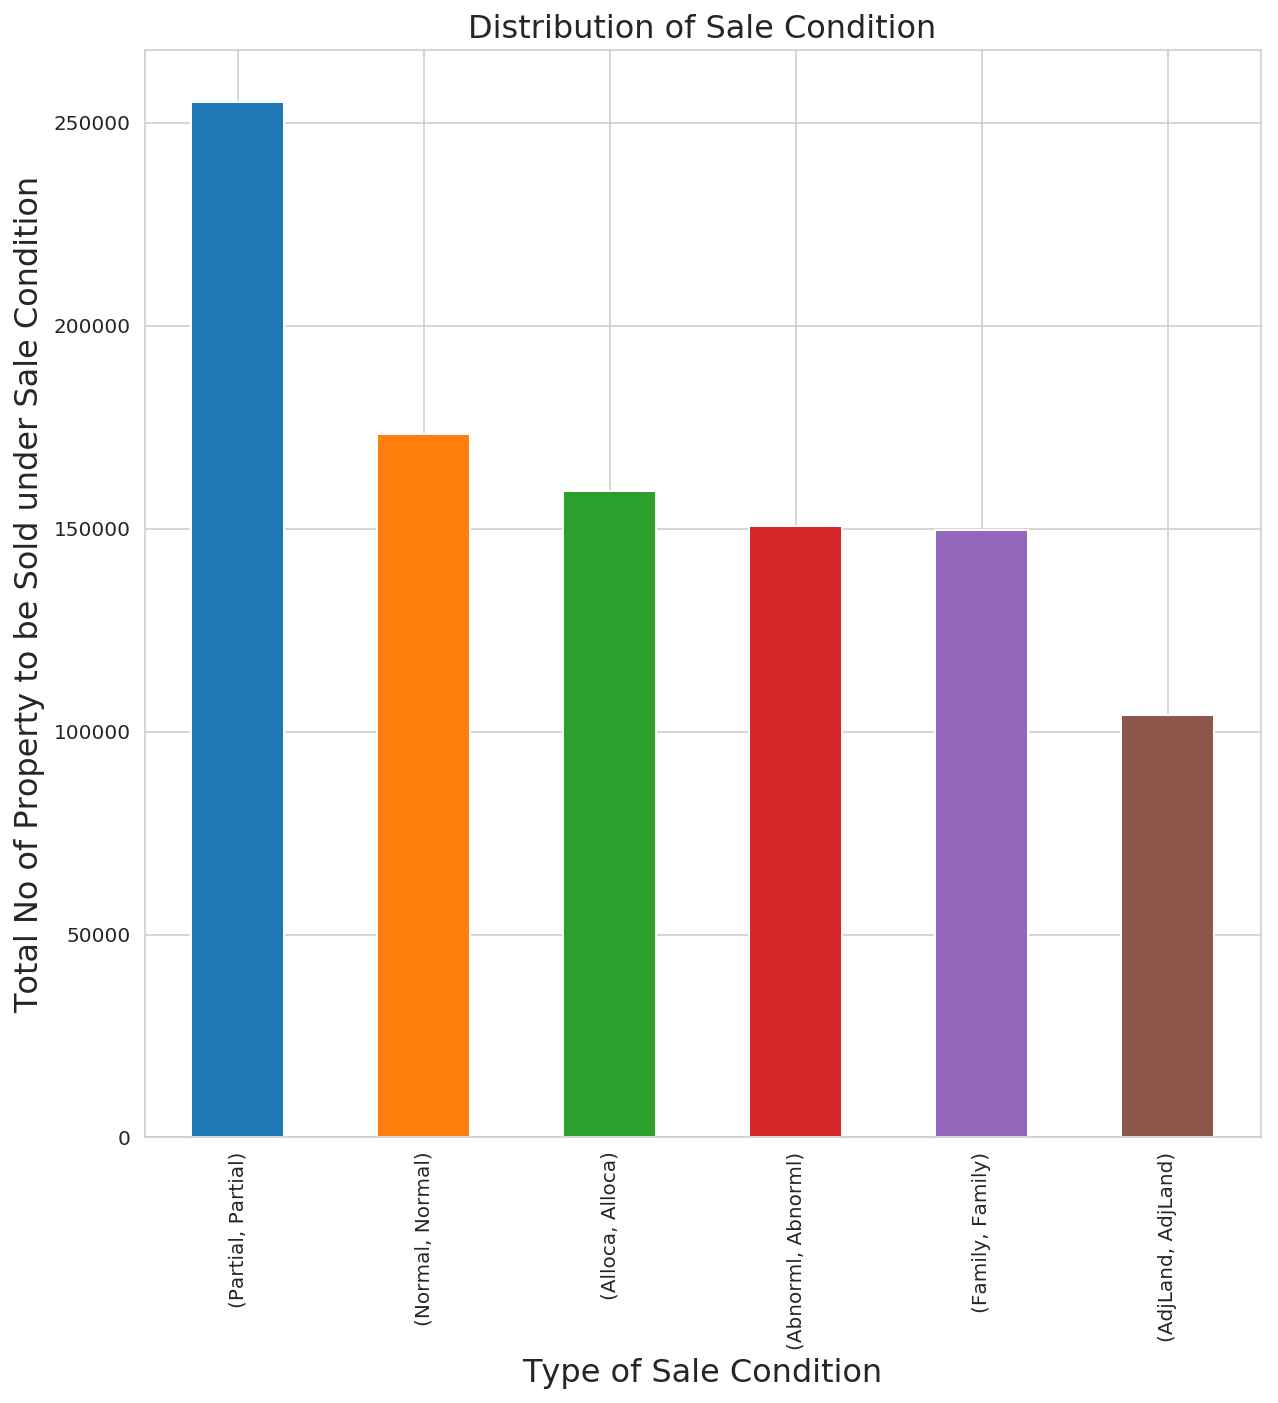

In [39]:
plt.figure(figsize=(10,10))
data=(hse_1.groupby('SaleCondition')['SalePrice'].sum()/hse_1.groupby('SaleCondition')['SaleCondition'].value_counts())
data.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Type of Sale Condition',fontsize=16)
plt.ylabel('Total No of Property to be Sold under Sale Condition',fontsize=16)
plt.title('Distribution of Sale Condition',fontsize=16)

In [40]:
hse_1['SaleType'].value_counts()

WD       1248
New       108
COD        41
ConLD       7
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

Text(0.5, 1.0, 'Distribution of Sale Type')

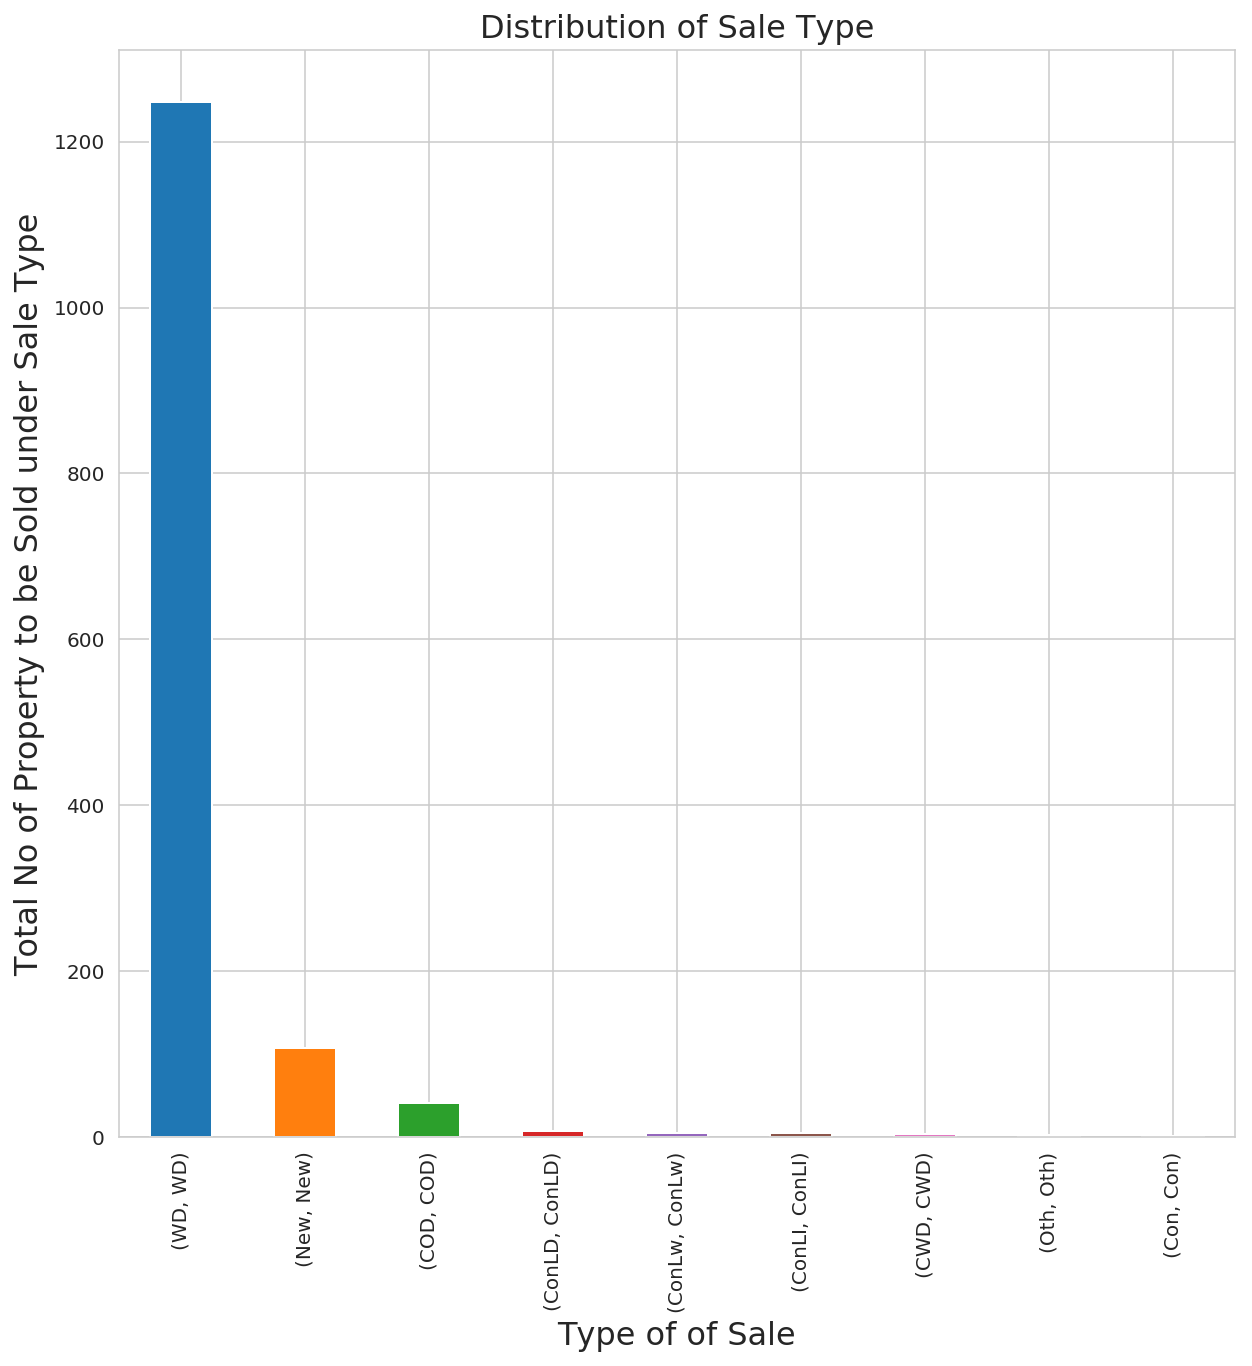

In [41]:
plt.figure(figsize=(10,10))
data=(hse_1.groupby('SaleType')['SaleType'].value_counts())
data.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Type of of Sale',fontsize=16)
plt.ylabel('Total No of Property to be Sold under Sale Type',fontsize=16)
plt.title('Distribution of Sale Type',fontsize=16)

Text(0.5, 1.0, 'Distribution of Sale Type')

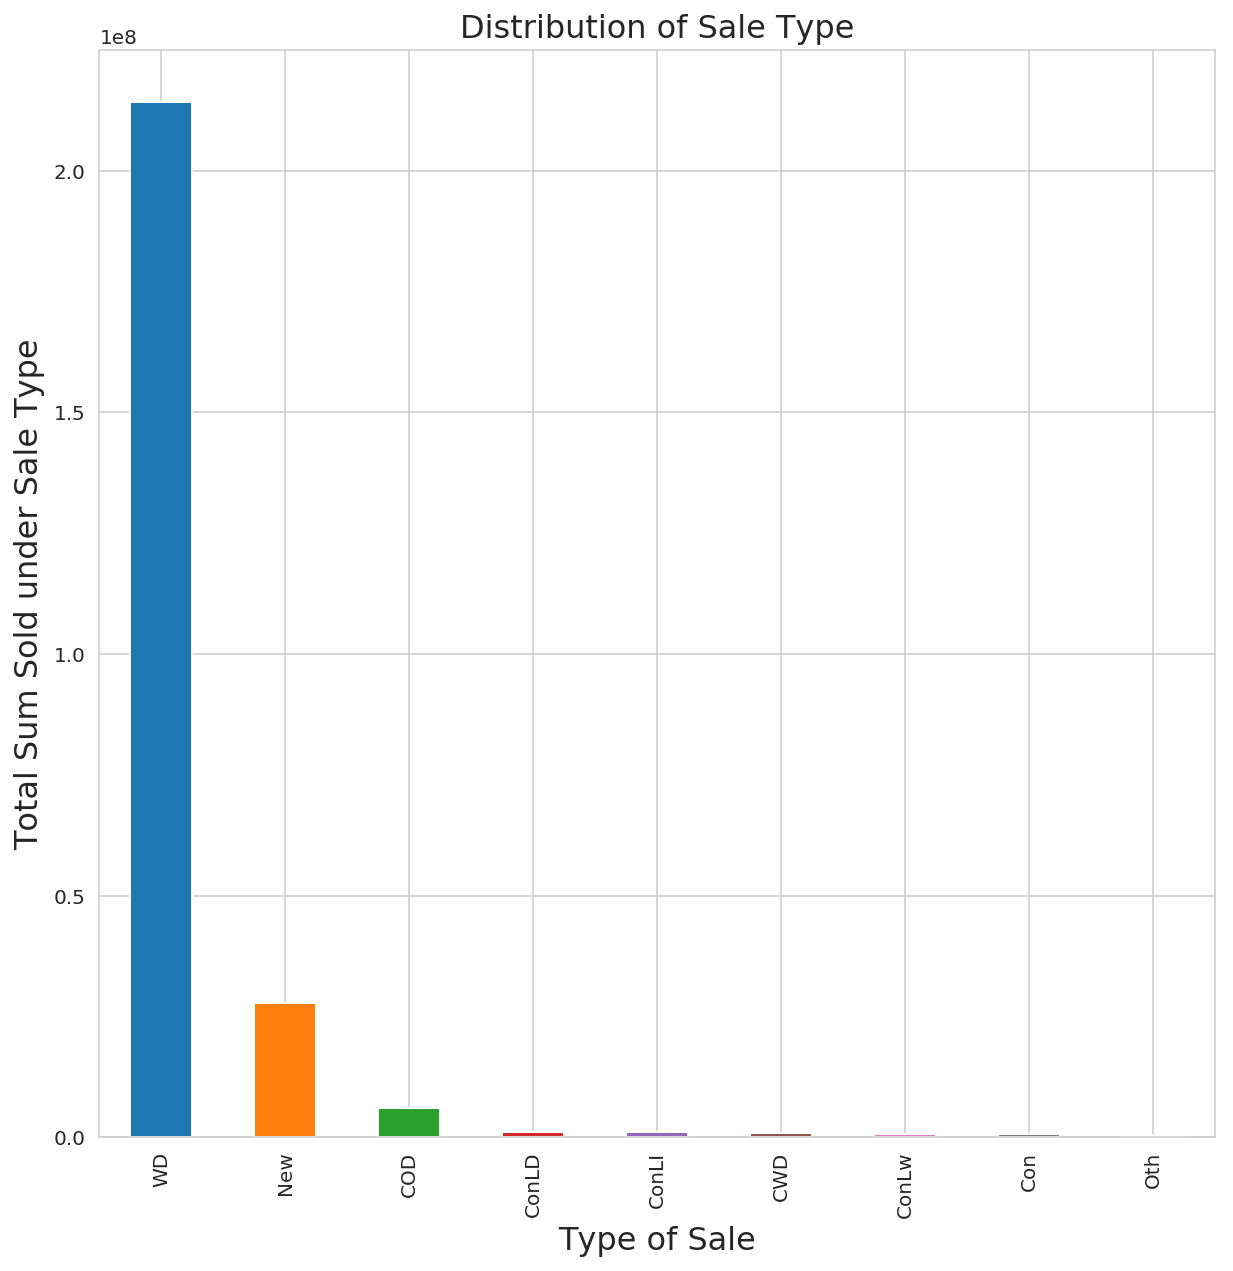

In [42]:
plt.figure(figsize=(10,10))
data=(hse_1.groupby('SaleType')['SalePrice'].sum())
data.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Type of Sale',fontsize=16)
plt.ylabel('Total Sum Sold under Sale Type',fontsize=16)
plt.title('Distribution of Sale Type',fontsize=16)

Text(0.5, 1.0, 'Distribution of Sale Type')

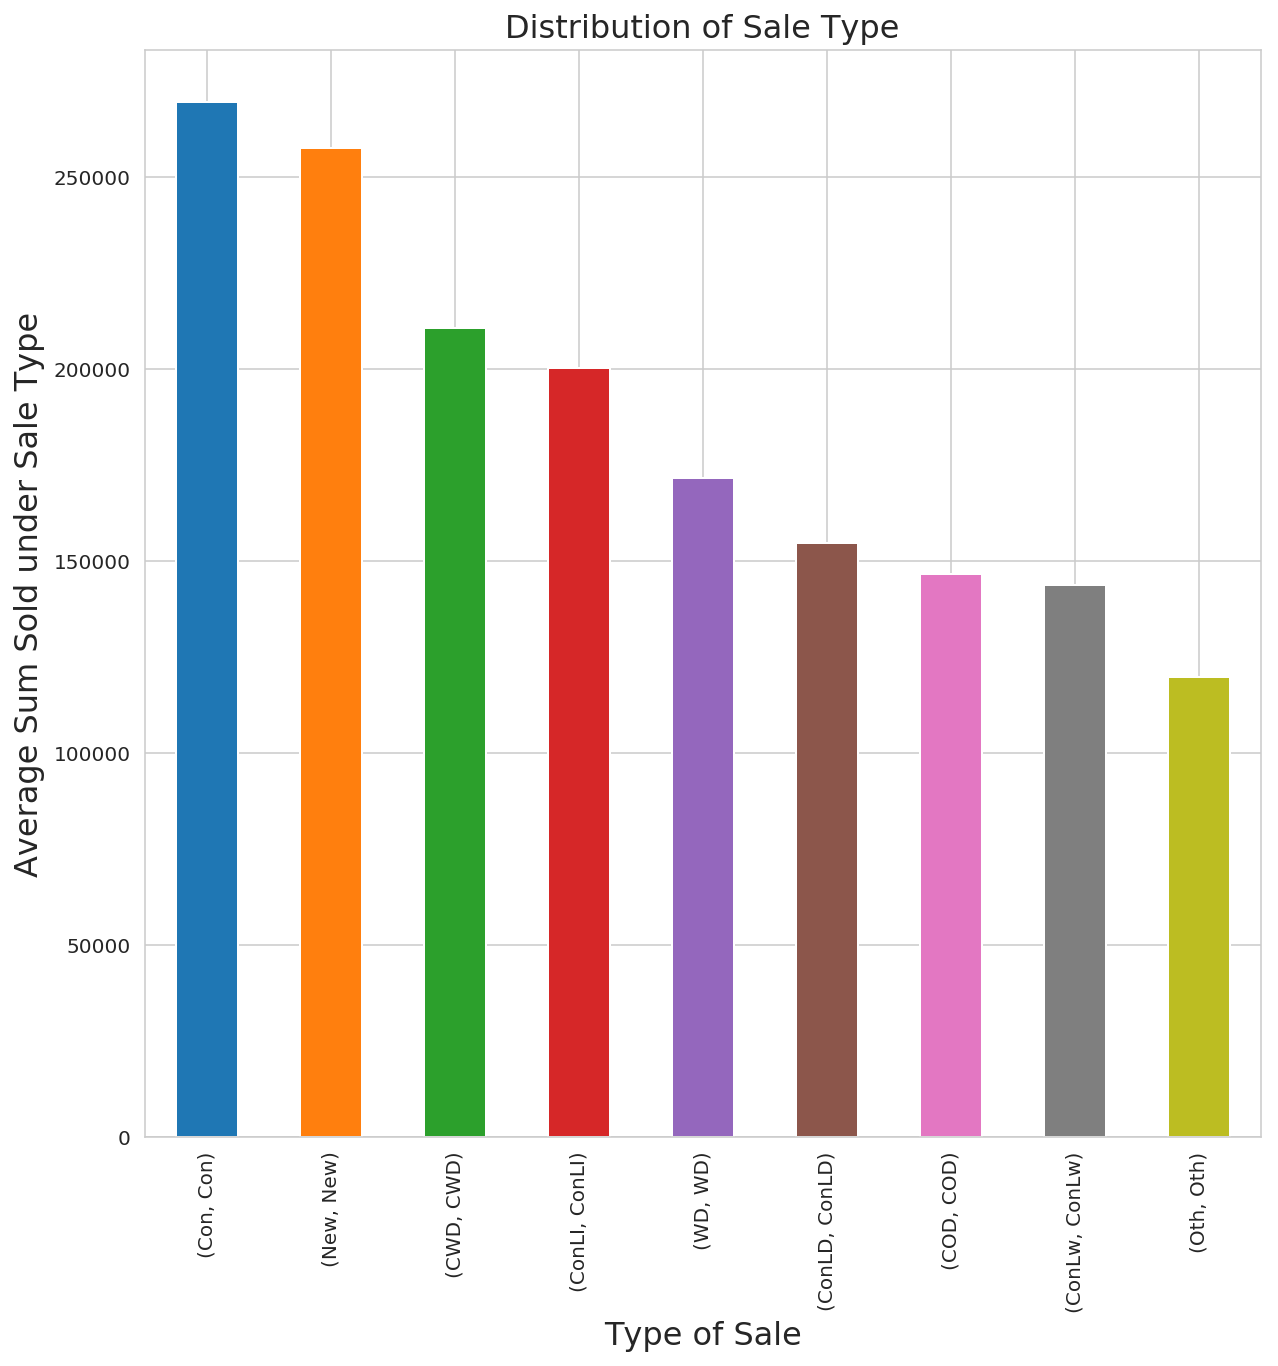

In [43]:
plt.figure(figsize=(10,10))
data=(hse_1.groupby('SaleType')['SalePrice'].sum()/hse_1.groupby('SaleType')['SaleType'].value_counts())
data.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Type of Sale',fontsize=16)
plt.ylabel('Average Sum Sold under Sale Type',fontsize=16)
plt.title('Distribution of Sale Type',fontsize=16)

In [44]:
dummy_sale=pd.get_dummies(hse_1[['SaleType','SaleCondition']])


In [45]:
hse_sale=pd.concat([dummy_sale,hse_1['SalePrice']],axis=1)

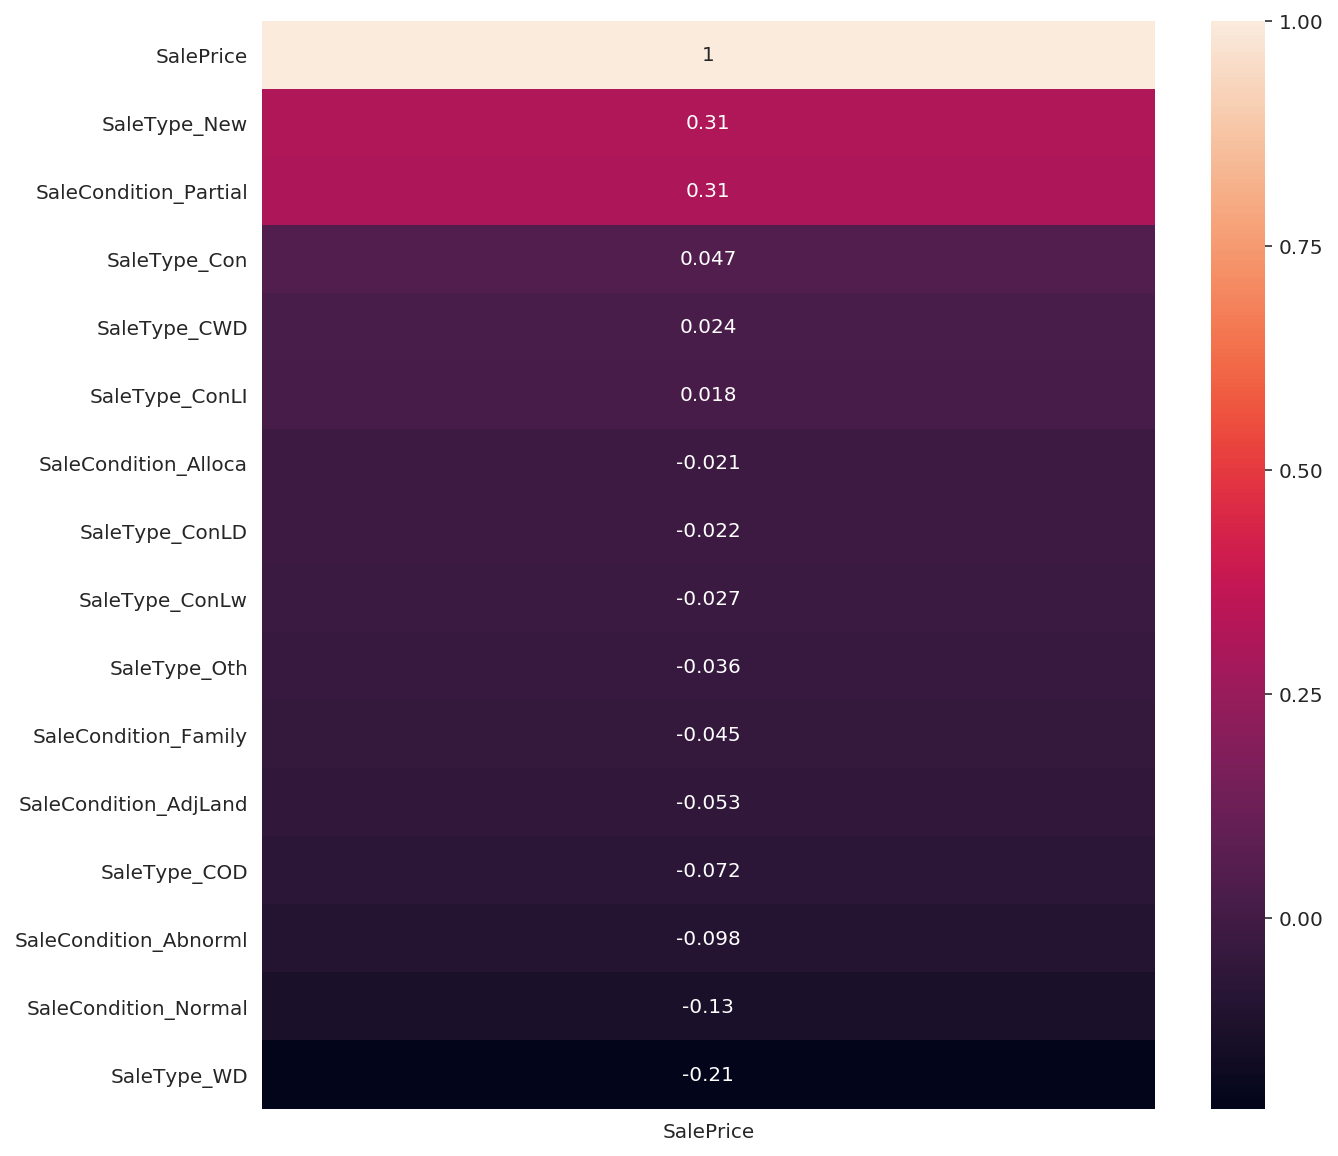

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_sale.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)

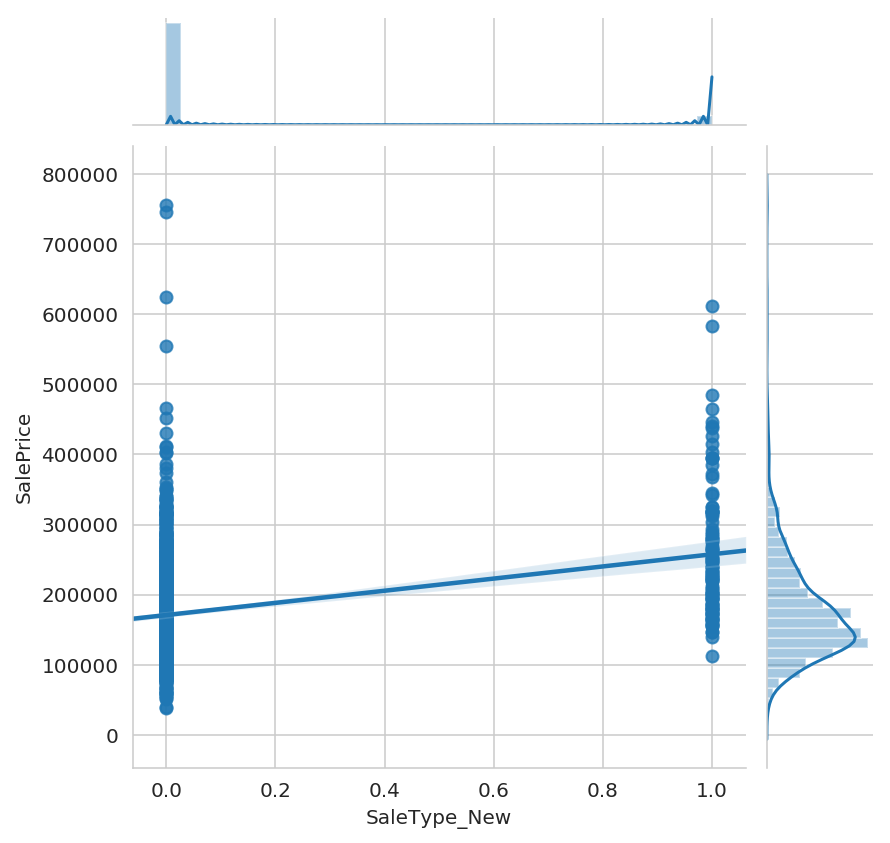

In [47]:
 sns.jointplot(x='SaleType_New', y='SalePrice', data=hse_sale,kind='reg')

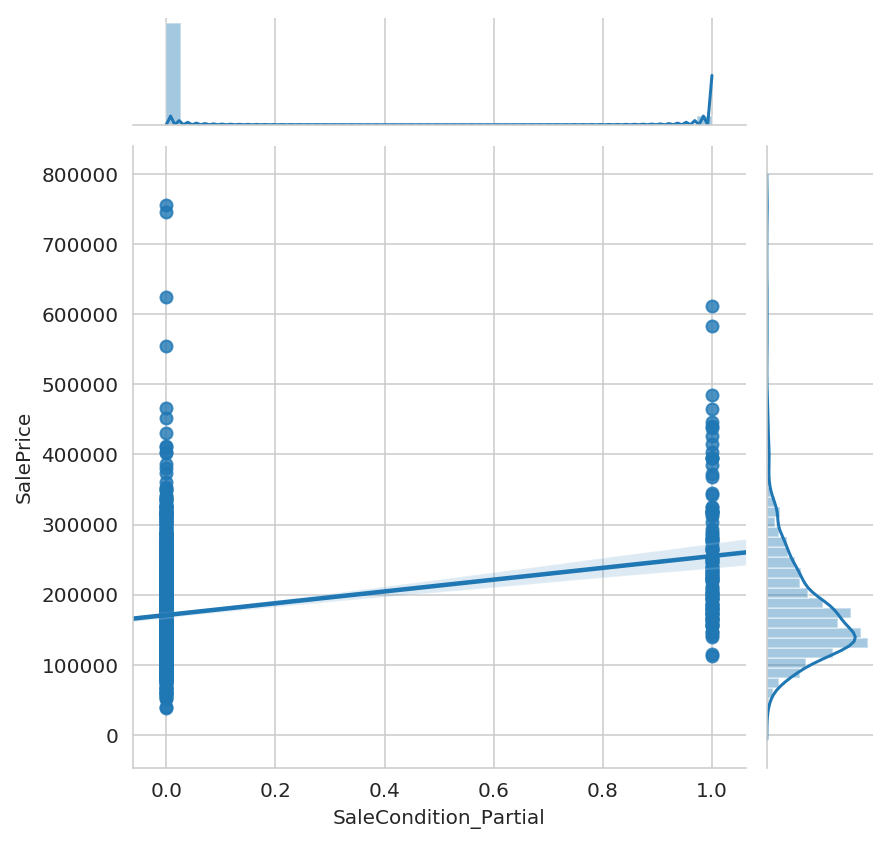

In [48]:
 sns.jointplot(x='SaleCondition_Partial', y='SalePrice', data=hse_sale,kind='reg')

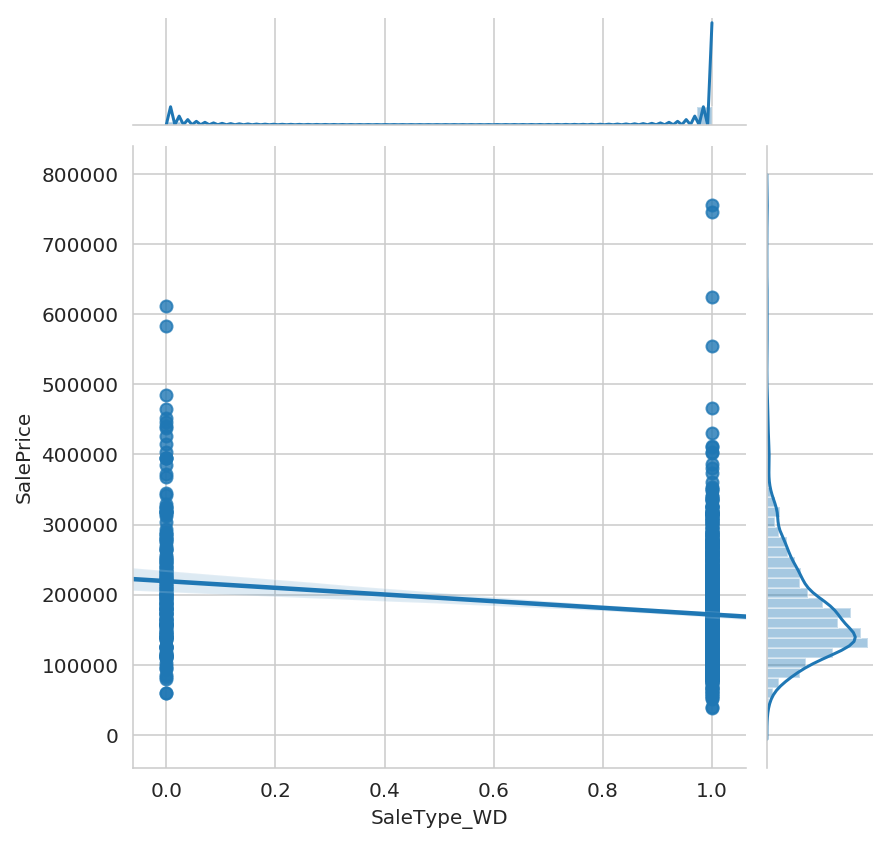

In [49]:
 sns.jointplot(x='SaleType_WD', y='SalePrice', data=hse_sale,kind='reg')

### Investigation 1.7 SalePrice VS 'LotArea','LotShape', 'LandContour','LandSlope'

1) Multiplying LotArea with the other respective features to determine interaction with respect to the area.

2) Based on the correlation,` LandContour_Lvl_A, LandSlope_GTL_A, LandArea and LandShape_Reg` are correlated with SalePrice weakly.

In [50]:
hse_1[['LotArea','LotShape', 'LandContour','LandSlope']].isnull().any()

LotArea        False
LotShape       False
LandContour    False
LandSlope      False
dtype: bool

In [51]:
dummy_lot1=pd.get_dummies(hse_1[['LotShape', 'LandContour','LandSlope']])

In [52]:
dummy_lot2=dummy_lot1[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev']].multiply(hse_1['LotArea'], axis="index")
dummy_lot2.columns=['LotShape_IR1_A', 'LotShape_IR2_A', 'LotShape_IR3_A', 'LotShape_Reg_A',
       'LandContour_Bnk_A', 'LandContour_HLS_A', 'LandContour_Low_A',
       'LandContour_Lvl_A', 'LandSlope_Gtl_A', 'LandSlope_Mod_A', 'LandSlope_Sev_A']

In [53]:
hse_lot=pd.concat([hse_1['LotArea'],dummy_lot1,dummy_lot2,hse_1['SalePrice']],axis=1)

In [54]:
hse_lot.corr()

LotArea  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
LotArea            1.000000      0.126157      0.255155      0.112319   
LotShape_IR1       0.126157      1.000000     -0.114924     -0.056116   
LotShape_IR2       0.255155     -0.114924      1.000000     -0.013035   
LotShape_IR3       0.112319     -0.056116     -0.013035      1.000000   
LotShape_Reg      -0.226373     -0.931131     -0.216291     -0.105613   
LandContour_Bnk    0.041416     -0.011130      0.030023      0.069821   
LandContour_HLS    0.099805      0.128818      0.024655      0.039251   
LandContour_Low    0.322410      0.054475      0.124139      0.047688   
LandContour_Lvl   -0.248951     -0.093344     -0.097798     -0.095174   
LandSlope_Gtl     -0.303654     -0.070649     -0.107025      0.018010   
LandSlope_Mod      0.101652      0.054327      0.056702     -0.016297   
LandSlope_Sev      0.495293      0.049453      0.129806     -0.007357   
LotShape_IR1_A     0.528928      0.723148     -0.083107     -0.040580   
LotShape_IR2_A     0.612622     -0.070139      0.610304     -0.007955   
LotShape_IR3_A     0.179570     -0.045483     -0.010565      0.810512   
LotShape_Reg_A     0.035409     -0.752739     -0.174852     -0.085379   
LandContour_Bnk_A  0.234624      0.003393      0.050736      0.166585   
LandContour_HLS_A  0.474861      0.074837      0.030459      0.035384   
LandContour_Low_A  0.653270      0.014250      0.238147      0.014584   
LandContour_Lvl_A  0.222647      0.123593      0.059649      0.021264   
LandSlope_Gtl_A    0.345116      0.147249      0.105562      0.210006   
LandSlope_Mod_A    0.281618      0.045180      0.092936     -0.012075   
LandSlope_Sev_A    0.781437      0.023029      0.176263     -0.005178   
SalePrice          0.254139      0.228667      0.083265      0.022545   

                   LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
LotArea               -0.226373         0.041416         0.099805   
LotShape_IR1          -0.931131        -0.011130         0.128818   
LotShape_IR2          -0.216291         0.030023         0.024655   
LotShape_IR3          -0.105613         0.069821         0.039251   
LotShape_Reg           1.000000        -0.010553        -0.140664   
LandContour_Bnk       -0.010553         1.000000        -0.036762   
LandContour_HLS       -0.140664        -0.036762         1.000000   
LandContour_Low       -0.102234        -0.032373        -0.026125   
LandContour_Lvl        0.139376        -0.659262        -0.532021   
LandSlope_Gtl          0.101567        -0.192220        -0.234930   
LandSlope_Mod         -0.069230         0.202180         0.221901   
LandSlope_Sev         -0.090123         0.017963         0.075999   
LotShape_IR1_A        -0.673346         0.004635         0.158103   
LotShape_IR2_A        -0.132003         0.011907         0.017069   
LotShape_IR3_A        -0.085600         0.096700         0.034236   
LotShape_Reg_A         0.808413         0.005615        -0.105516   
LandContour_Bnk_A     -0.047566         0.707474        -0.026009   
LandContour_HLS_A     -0.089132        -0.019169         0.521416   
LandContour_Low_A     -0.095144        -0.021004        -0.016950   
LandContour_Lvl_A     -0.144166        -0.390163        -0.314860   
LandSlope_Gtl_A       -0.213613        -0.010720        -0.076901   
LandSlope_Mod_A       -0.072965         0.078578         0.143041   
LandSlope_Sev_A       -0.080000         0.013662         0.092291   
SalePrice             -0.254997        -0.095813         0.053624   

                   LandContour_Low  LandContour_Lvl  LandSlope_Gtl  \
LotArea                   0.322410        -0.248951      -0.303654   
LotShape_IR1              0.054475        -0.093344      -0.070649   
LotShape_IR2              0.124139        -0.097798      -0.107025   
LotShape_IR3              0.047688        -0.095174       0.018010   
LotShape_Reg             -0.102234         0.139376       0.101567   
LandContour_Bnk          -0.032373        -0.659

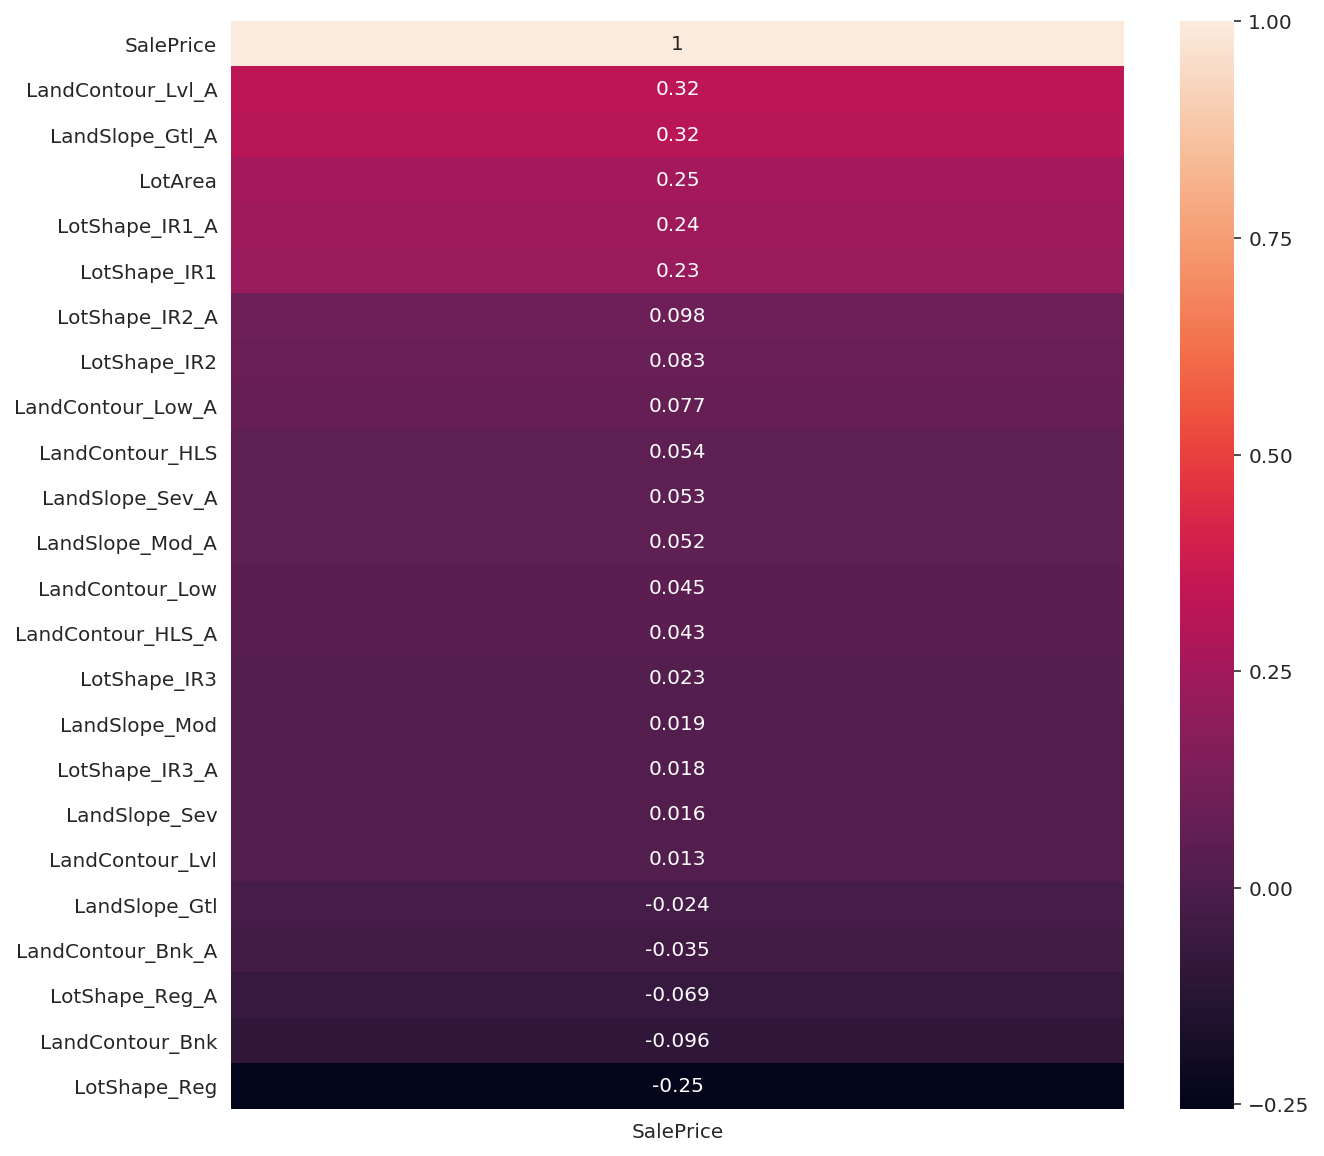

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_lot.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)

### Investigation 1.8 SalePrice VS 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'

1)  The following features are feature with strong correlation with SalePrice  `'TotalBsmtSF','BsmtQual_Ex','B1_SF1_GLQ','BsmtFinSF1','BsmtExposure_Gd','BsmtQual_Gd','BsmtUnfSF','BsmtQual_TA'`

In [56]:
hse_1[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].isnull().any()

BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinSF1      False
BsmtFinType2     True
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
dtype: bool

In [57]:
dummy_base1=pd.get_dummies(hse_1['BsmtFinType1'])
dummy_base2=pd.get_dummies(hse_1['BsmtFinType2'])
dummy_base3=pd.get_dummies(hse_1[['BsmtQual','BsmtCond','BsmtExposure']])

In [58]:
dummy_base11=dummy_base1.multiply(hse_1['BsmtFinSF1'],axis='index')
dummy_base22=dummy_base2.multiply(hse_1['BsmtFinSF2'],axis='index')
dummy_base11.columns=['B1_SF1_ALQ', 'B1_SF1_BLQ', 'B1_SF1_GLQ', 'B1_SF1_LwQ', 'B1_SF1_Rec', 'B1_SF1_Unf']
dummy_base22.columns=['B2_SF2_ALQ', 'B2_SF2_BLQ', 'B2_SF2_GLQ', 'B2_SF2_LwQ', 'B2_SF2_Rec', 'B2_SF2_Unf']
hse_base1=pd.concat([dummy_base3,dummy_base11,hse_1['BsmtFinSF1'],dummy_base22,hse_1['BsmtFinSF2'],hse_1['BsmtUnfSF'],hse_1['TotalBsmtSF'],hse_1['SalePrice']],axis=1)
hse_base1.head()

BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  BsmtCond_Fa  \
231            0            0            1            0            0   
496            0            0            1            0            0   
654            0            0            1            0            0   
661            0            0            1            0            0   
691            1            0            0            0            0   

     BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  BsmtExposure_Gd  \
231            0            0            1                0                0   
496            0            0            1                0                0   
654            0            0            1                0                1   
661            1            0            0                0                0   
691            0            0            1                0                1   

     BsmtExposure_Mn  BsmtExposure_No  B1_SF1_ALQ  B1_SF1_BLQ  B1_SF1_GLQ  \
231                0                1           0           0         689   
496                0                1           0           0        1231   
654                0                0           0           0        1696   
661                0                1           0           0        1361   
691                0                0           0           0        1455   

     B1_SF1_LwQ  B1_SF1_Rec  B1_SF1_Unf  BsmtFinSF1  B2_SF2_ALQ  B2_SF2_BLQ  \
231           0           0           0         689           0           0   
496           0           0           0        1231           0           0   
654           0           0           0        1696           0           0   
661           0           0           0        1361           0           0   
691           0           0           0        1455           0           0   

     B2_SF2_GLQ  B2_SF2_LwQ  B2_SF2_Rec  B2_SF2_Unf  BsmtFinSF2  BsmtUnfSF  \
231           0           0           0           0           0        773   
496           0           0           0           0           0       1969   
654           0           0           0           0           0        413   
661           0           0         180           0         180         88   
691           0           0           0           0           0        989   

     TotalBsmtSF  SalePrice  
231         1462     403000  
496         3200     430000  
654         2109     350000  
661         1629     402000  
691         2444     755000

In [59]:
hse_base1['B2_SF2_Unf'].unique()

array([0])

In [60]:
hse_base1.corr()

BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  \
BsmtQual_Ex         1.000000    -0.044590    -0.243228    -0.252786   
BsmtQual_Fa        -0.044590     1.000000    -0.137549    -0.142954   
BsmtQual_Gd        -0.243228    -0.137549     1.000000    -0.779791   
BsmtQual_TA        -0.252786    -0.142954    -0.779791     1.000000   
BsmtCond_Fa        -0.049567     0.183997    -0.136312     0.113525   
BsmtCond_Gd         0.069340    -0.034460     0.058684    -0.072618   
BsmtCond_Po        -0.010534     0.236254    -0.032497    -0.033774   
BsmtCond_TA         0.005965    -0.095828     0.115057     0.066864   
BsmtExposure_Av     0.123573    -0.066809     0.163926    -0.185018   
BsmtExposure_Gd     0.164751    -0.032422     0.064424    -0.124241   
BsmtExposure_Mn    -0.017965     0.041347     0.040890    -0.029337   
BsmtExposure_No    -0.165149     0.055716    -0.138871     0.280591   
B1_SF1_ALQ         -0.065017    -0.038823    -0.038494     0.103875   
B1_SF1_BLQ         -0.083382    -0.028205    -0.137891     0.205323   
B1_SF1_GLQ          0.370422    -0.080311     0.221091    -0.362467   
B1_SF1_LwQ         -0.044065     0.078473    -0.056342     0.064612   
B1_SF1_Rec         -0.077671    -0.039402    -0.175447     0.242005   
B1_SF1_Unf               NaN          NaN          NaN          NaN   
BsmtFinSF1          0.250104    -0.108435     0.057357    -0.103237   
B2_SF2_ALQ          0.007369    -0.016431    -0.047591     0.054037   
B2_SF2_BLQ         -0.035022    -0.019806    -0.030810     0.061687   
B2_SF2_GLQ          0.040549    -0.014193     0.055251    -0.067118   
B2_SF2_LwQ         -0.043075    -0.005236    -0.034272     0.066308   
B2_SF2_Rec         -0.045029    -0.025465    -0.089981     0.129440   
B2_SF2_Unf               NaN          NaN          NaN          NaN   
BsmtFinSF2         -0.034292    -0.038548    -0.071795     0.116651   
BsmtUnfSF           0.131167     0.010593     0.118548    -0.122633   
TotalBsmtSF         0.378909    -0.115812     0.152744    -0.187554   
SalePrice           0.522710    -0.133428     0.268580    -0.448276   

                 BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
BsmtQual_Ex        -0.049567     0.069340    -0.010534     0.005965   
BsmtQual_Fa         0.183997    -0.034460     0.236254    -0.095828   
BsmtQual_Gd        -0.136312     0.058684    -0.032497     0.115057   
BsmtQual_TA         0.113525    -0.072618    -0.033774     0.066864   
BsmtCond_Fa         1.000000    -0.038307    -0.006622    -0.522052   
BsmtCond_Gd        -0.038307     1.000000    -0.008141    -0.641799   
BsmtCond_Po        -0.006622    -0.008141     1.000000    -0.110952   
BsmtCond_TA        -0.522052    -0.641799    -0.110952     1.000000   
BsmtExposure_Av    -0.074266     0.041504    -0.015784     0.051550   
BsmtExposure_Gd    -0.039392     0.054658     0.055512     0.004278   
BsmtExposure_Mn     0.012459     0.003004    -0.010643     0.016544   
BsmtExposure_No     0.082525    -0.053156    -0.012909     0.111449   
B1_SF1_ALQ         -0.042918    -0.003716    -0.013947     0.060329   
B1_SF1_BLQ         -0.023855    -0.028691     0.024200     0.055725   
B1_SF1_GLQ         -0.089276     0.043576    -0.018974     0.066283   
B1_SF1_LwQ          0.101811    -0.005512    -0.007114    -0.036545   
B1_SF1_Rec          0.014892    -0.044978    -0.010377     0.047302   
B1_SF1_Unf               NaN          NaN          NaN          NaN   
BsmtFinSF1         -0.091803     0.010250    -0.021905     0.131041   
B2_SF2_ALQ         -0.018265     0.091400    -0.003882    -0.042776   
B2_SF2_BLQ         -0.022016     0.036226    -0.004679    -0.001057   
B2_SF2_GLQ         -0.015778     0.030088    -0.003353    -0.003576   
B2_SF2_LwQ         -0.014039     0.001767    -0.005755     0.020569   
B2_SF2_Rec         -0.010834     0.011459    -0.006016     0.012770   
B2_SF2_Unf               NaN          NaN          NaN          NaN   
BsmtFinSF2         -0.036538     0.07939

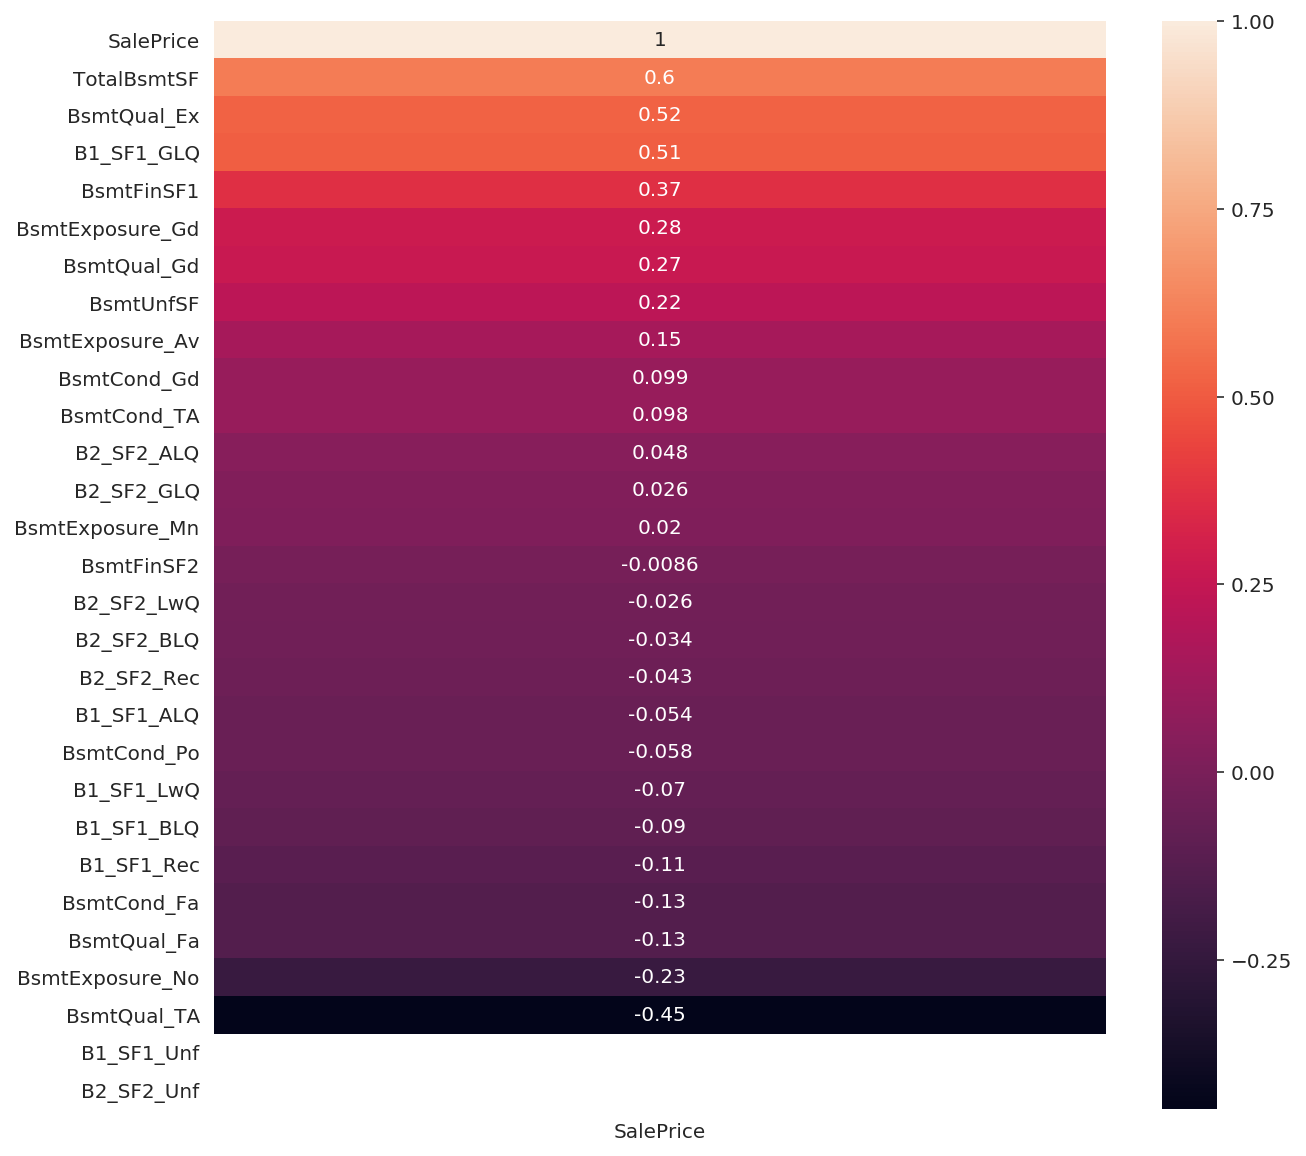

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_base1.corr('pearson')[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)

### Investigation 1.9 SalePrice VS 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond'

1)`'GarageCars','GarageArea','GarageYrBlt','GarageFinish_Fin','GarageType_Attchd','GarageCond_TA','GarageQual_TA','GarageFinish_Unf','GarageType_Detchd'` are features with significant correlation with SalePrice


In [62]:
 hse_1[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].isnull().any()

GarageType       True
GarageYrBlt      True
GarageFinish     True
GarageCars      False
GarageArea      False
GarageQual       True
GarageCond       True
dtype: bool

In [63]:
 hse_1[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 231 to 1459
Data columns (total 7 columns):
GarageType      1344 non-null object
GarageYrBlt     1344 non-null float64
GarageFinish    1344 non-null object
GarageCars      1423 non-null int64
GarageArea      1423 non-null int64
GarageQual      1344 non-null object
GarageCond      1344 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 88.9+ KB


In [64]:
 hse_1[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].describe()

GarageYrBlt   GarageCars   GarageArea
count  1344.000000  1423.000000  1423.000000
mean   1978.271577     1.752635   468.144765
std      24.566349     0.738211   209.588654
min    1906.000000     0.000000     0.000000
25%    1961.000000     1.000000   325.500000
50%    1979.000000     2.000000   474.000000
75%    2001.250000     2.000000   576.000000
max    2010.000000     4.000000  1418.000000

In [65]:
hse_garage=pd.get_dummies( hse_1[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','SalePrice']])

In [66]:
hse_garage.head()

GarageYrBlt  GarageCars  GarageArea  SalePrice  GarageType_2Types  \
231       1995.0           3         810     403000                  0   
496       1992.0           2         546     430000                  0   
654       1995.0           3         839     350000                  0   
661       1994.0           3         711     402000                  0   
691       1994.0           3         832     755000                  0   

     GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
231                  1                   0                   0   
496                  1                   0                   0   
654                  1                   0                   0   
661                  1                   0                   0   
691                  1                   0                   0   

     GarageType_CarPort  GarageType_Detchd  GarageFinish_Fin  \
231                   0                  0                 1   
496                   0                  0                 0   
654                   0                  0                 1   
661                   0                  0                 0   
691                   0                  0                 1   

     GarageFinish_RFn  GarageFinish_Unf  GarageQual_Ex  GarageQual_Fa  \
231                 0                 0              0              0   
496                 1                 0              0              0   
654                 0                 0              0              0   
661                 1                 0              0              0   
691                 0                 0              0              0   

     GarageQual_Gd  GarageQual_Po  GarageQual_TA  GarageCond_Ex  \
231              0              0              1              0   
496              0              0              1              0   
654              0              0              1              0   
661              0              0              1              0   
691              0              0              1              0   

     GarageCond_Fa  GarageCond_Gd  GarageCond_Po  GarageCond_TA  
231              0              0              0              1  
496              0              0              0              1  
654              0              0              0              1  
661              0              0              0              1  
691              0              0              0              1

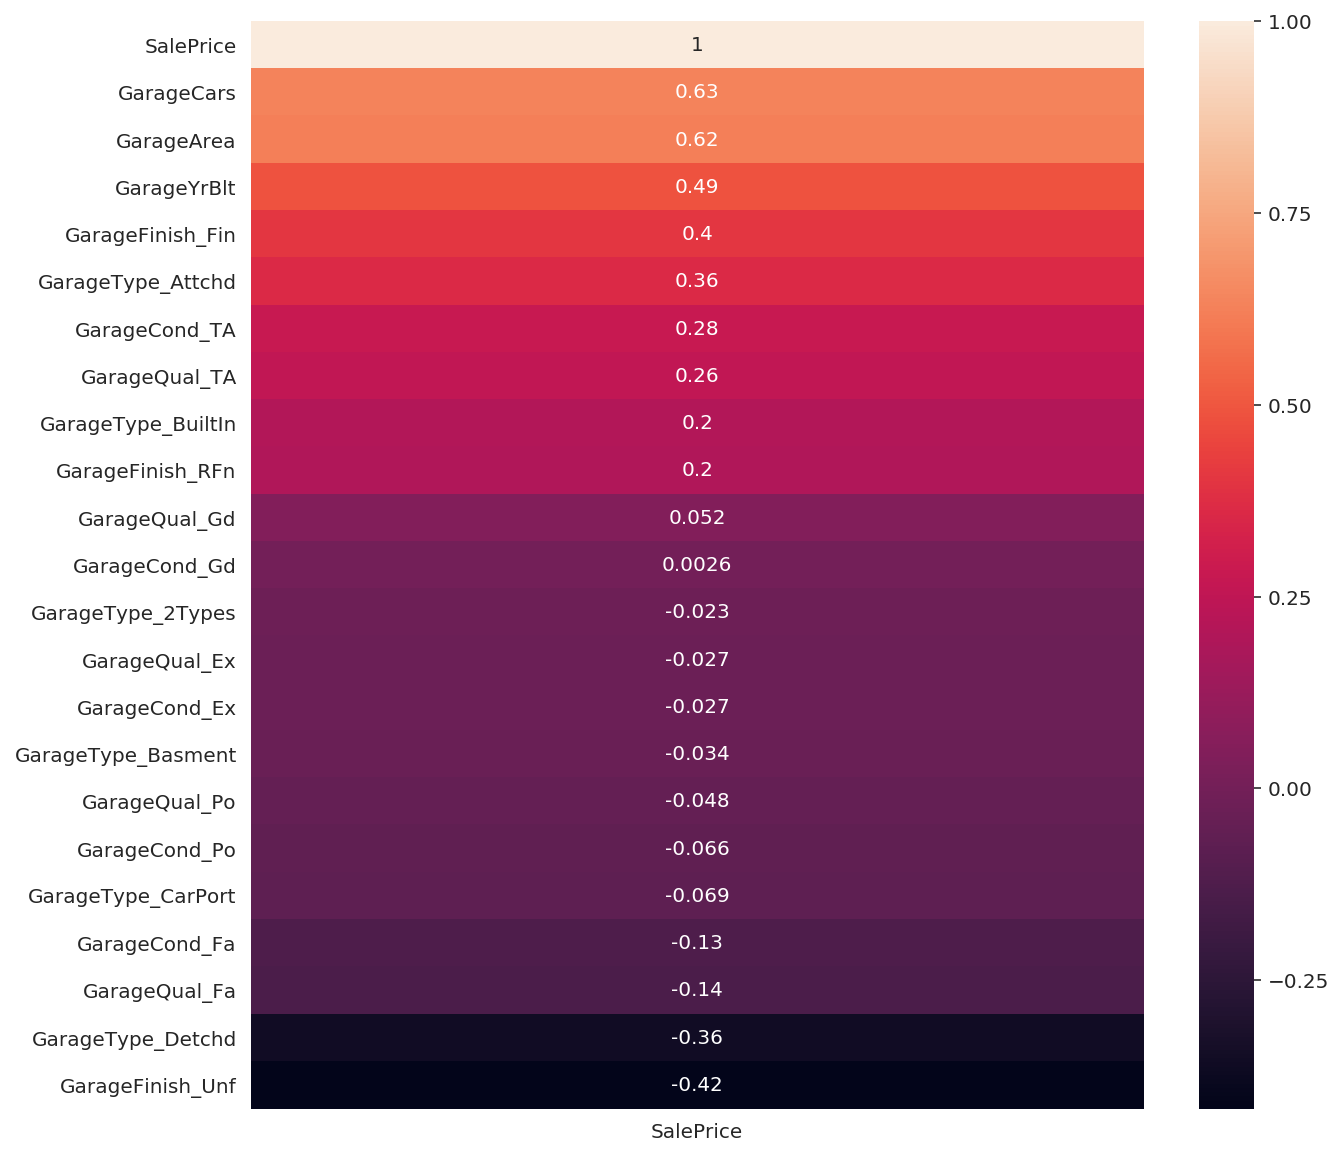

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_garage.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)

### Investigation 1.10 SalePrice VS 'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'

1) These features have a significant correlation with SalePrice`'WoodDeckSF','OpenPorchSF','EnclosedPorch'`

In [68]:
hse_porch=hse_1[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']]

In [69]:
hse_1[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].isnull().any()

WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
dtype: bool

In [70]:
hse_1[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 231 to 1459
Data columns (total 6 columns):
WoodDeckSF       1423 non-null int64
OpenPorchSF      1423 non-null int64
EnclosedPorch    1423 non-null int64
3SsnPorch        1423 non-null int64
ScreenPorch      1423 non-null int64
SalePrice        1423 non-null int64
dtypes: int64(6)
memory usage: 77.8 KB


In [71]:
hse_1[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']].corr()

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
WoodDeckSF       1.000000     0.059495      -0.119736  -0.034717    -0.079640   
OpenPorchSF      0.059495     1.000000      -0.103334  -0.004824     0.062517   
EnclosedPorch   -0.119736    -0.103334       1.000000  -0.036474    -0.081288   
3SsnPorch       -0.034717    -0.004824      -0.036474   1.000000    -0.031083   
ScreenPorch     -0.079640     0.062517      -0.081288  -0.031083     1.000000   
SalePrice        0.308371     0.326264      -0.116991   0.043903     0.098225   

               SalePrice  
WoodDeckSF      0.308371  
OpenPorchSF     0.326264  
EnclosedPorch  -0.116991  
3SsnPorch       0.043903  
ScreenPorch     0.098225  
SalePrice       1.000000

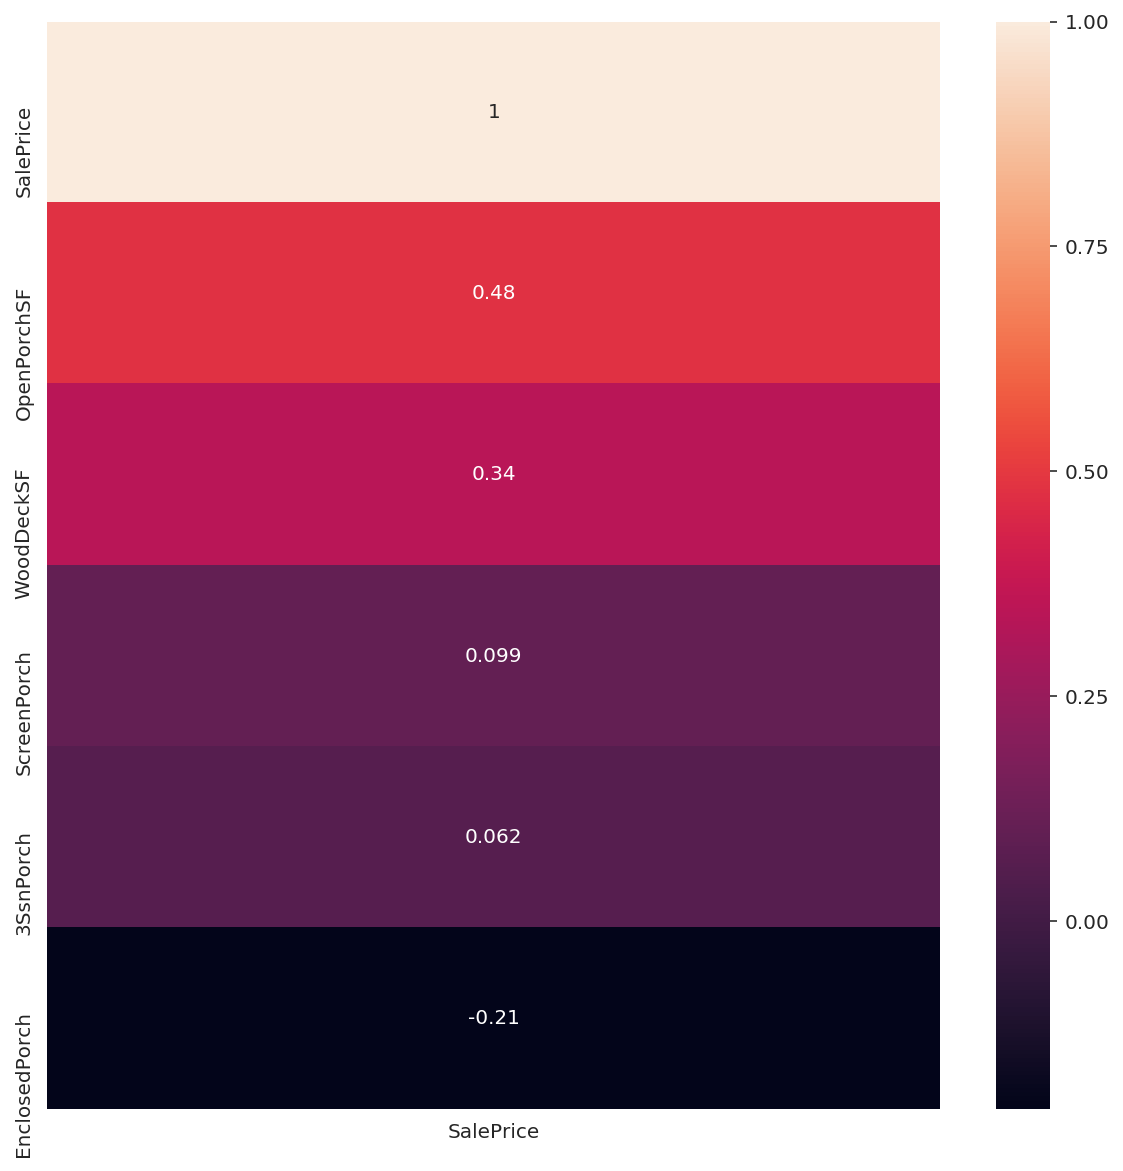

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_porch.corr('spearman')[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)

## Summarised Predictors

In [73]:
# Neighborhood
data1=hse_neighborhood[['NoRidge', 'NridgHt','OldTown','NAmes']]

# YearBuilt and YearRemodAdd
data2=hse_year[['YearBuilt','YearRemodAdd']]

# Foundation
data3=hse_foundation[['PConc','CBlock','BrkTil']]

# Pool
data4=hse_pool[['PoolCond_Ex_Area', 'PoolCond_Ex']]

# Square Feet 1st and 2nd Floor
data5=hse_sqft[['1stFlrSF','2ndFlrSF','1st_2ndFLSF']]

# Lot Shape and Area, Land Contour and Slope
data6=hse_lot[['LandContour_Lvl_A','LandSlope_Gtl_A','LotArea','LotShape_IR1_A','LotShape_IR1','LotShape_Reg']]

# Basement
data7=hse_base1[['TotalBsmtSF','BsmtQual_Ex','B1_SF1_GLQ','BsmtFinSF1','BsmtExposure_Gd','BsmtQual_Gd','BsmtUnfSF','BsmtQual_TA']]

# Garage
data8=hse_garage[['GarageCars','GarageArea','GarageYrBlt','GarageFinish_Fin','GarageType_Attchd','GarageCond_TA','GarageQual_TA','GarageFinish_Unf','GarageType_Detchd']]

# Porch
data9=hse_porch[['WoodDeckSF','OpenPorchSF','EnclosedPorch']]


In [74]:
data=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,hse_1['SalePrice']],axis=1)

In [75]:
data.isnull().any()

NoRidge              False
NridgHt              False
OldTown              False
NAmes                False
YearBuilt            False
YearRemodAdd         False
PConc                False
CBlock               False
BrkTil               False
PoolCond_Ex_Area     False
PoolCond_Ex          False
1stFlrSF             False
2ndFlrSF             False
1st_2ndFLSF          False
LandContour_Lvl_A    False
LandSlope_Gtl_A      False
LotArea              False
LotShape_IR1_A       False
LotShape_IR1         False
LotShape_Reg         False
TotalBsmtSF          False
BsmtQual_Ex          False
B1_SF1_GLQ           False
BsmtFinSF1           False
BsmtExposure_Gd      False
BsmtQual_Gd          False
BsmtUnfSF            False
BsmtQual_TA          False
GarageCars           False
GarageArea           False
GarageYrBlt           True
GarageFinish_Fin     False
GarageType_Attchd    False
GarageCond_TA        False
GarageQual_TA        False
GarageFinish_Unf     False
GarageType_Detchd    False
W

In [76]:
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)

## Splitting the data to Train and Test

In [77]:
data['YrSold']=hse_1.YrSold

In [78]:
data.head()

NoRidge  NridgHt  OldTown  NAmes  YearBuilt  YearRemodAdd  PConc  CBlock  \
231        1        0        0      0       1995          1996      1       0   
496        1        0        0      0       1992          1993      1       0   
654        1        0        0      0       1995          1995      1       0   
661        1        0        0      0       1994          2005      1       0   
691        1        0        0      0       1994          1995      1       0   

     BrkTil  PoolCond_Ex_Area  PoolCond_Ex  1stFlrSF  2ndFlrSF  1st_2ndFLSF  \
231       0                 0            0      1490      1304         2794   
496       0                 0            0      3228         0         3228   
654       0                 0            0      2113         0         2113   
661       0                 0            0      1686       762         2448   
691       0                 0            0      2444      1872         4316   

     LandContour_Lvl_A  LandSlope_Gtl_A  LotArea  LotShape_IR1_A  \
231              15138            15138    15138           15138   
496              12692            12692    12692           12692   
654              10437            10437    10437           10437   
661              46589            46589    46589               0   
691              21535            21535    21535           21535   

     LotShape_IR1  LotShape_Reg  TotalBsmtSF  BsmtQual_Ex  B1_SF1_GLQ  \
231             1             0         1462            0         689   
496             1             0         3200            0        1231   
654             1             0         2109            0        1696   
661             0             0         1629            0        1361   
691             1             0         2444            1        1455   

     BsmtFinSF1  BsmtExposure_Gd  BsmtQual_Gd  BsmtUnfSF  BsmtQual_TA  \
231         689                0            1        773            0   
496        1231                0            1       1969            0   
654        1696                1            1        413            0   
661        1361                0            1         88            0   
691        1455                1            0        989            0   

     GarageCars  GarageArea  GarageYrBlt  GarageFinish_Fin  GarageType_Attchd  \
231           3         810       1995.0                 1                  1   
496           2         546       1992.0                 0                  1   
654           3         839       1995.0                 1                  1   
661           3         711       1994.0                 0                  1   
691           3         832       1994.0                 1                  1   

     GarageCond_TA  GarageQual_TA  GarageFinish_Unf  GarageType_Detchd  \
231              1              1                 0                  0   
496              1              1                 0                  0   
654              1              1                 0                  0   
661              1              1                 0                  0   
691              1              1                 0                  0   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  YrSold  
231           0          146            202     403000    2009  
496         264           75            291     430000    2007  
654         236           46              0     350000    2008  
661         517           76              0     402000    2009  
691         382           50              0     755000    2007

In [79]:
y_test=data[data['YrSold']==2010].iloc[:,-2]
y_train=data[data['YrSold']<2010].iloc[:,-2]
x_test=data[data['YrSold']==2010].iloc[:,0:data.shape[1]-2]
x_train=data[data['YrSold']<2010].iloc[:,0:data.shape[1]-2]

In [80]:
y_test.shape

(168,)

In [81]:
y_train.shape

(1255,)

In [82]:
x_test.shape

(168, 40)

In [83]:
x_train.shape

(1255, 40)

## Standardising the Variables

In [84]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xs_test=ss.fit_transform(x_test)
xs_train=ss.fit_transform(x_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [85]:
print(xs_test.shape)
print(xs_train.shape)
print(y_test.shape)
print(y_train.shape)


(168, 40)
(1255, 40)
(168,)
(1255,)


## Using Lasso to investigate for MultiCollinearity Between Predictors

In [86]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(xs_train, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

52.423329574714636


...........................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [87]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(xs_train,y_train)
print('R-squared for train set:',lasso.score(xs_train,y_train))
print('R-squared for test set:',lasso.score(xs_test,y_test))

R-squared for train set: 0.8254236923339819
R-squared for test set: 0.8365436602538044


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [88]:
lasso_coefs = pd.DataFrame({'variable':x_test.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

variable          coef      abs_coef
9    PoolCond_Ex_Area  52162.640511  52162.640511
10        PoolCond_Ex -47409.183120  47409.183120
13        1st_2ndFLSF  26399.099119  26399.099119
21        BsmtQual_Ex  12439.139089  12439.139089
1             NridgHt  11792.443494  11792.443494
14  LandContour_Lvl_A  10335.542025  10335.542025
0             NoRidge   9550.811019   9550.811019
28         GarageCars   9147.662802   9147.662802
5        YearRemodAdd   8022.596022   8022.596022
15    LandSlope_Gtl_A  -7580.502671   7580.502671
20        TotalBsmtSF   6435.342175   6435.342175
24    BsmtExposure_Gd   6080.350475   6080.350475
25        BsmtQual_Gd   5330.455997   5330.455997
32  GarageType_Attchd   4981.833782   4981.833782
2             OldTown  -4007.568661   4007.568661
6               PConc   3772.197055   3772.197055
36  GarageType_Detchd   3245.702047   3245.702047
33      GarageCond_TA   3144.973784   3144.973784
27        BsmtQual_TA   2707.452520   2707.452520
31   GarageFinish_Fin   2529.551723   2529.551723
7              CBlock   2453.518913   2453.518913
22         B1_SF1_GLQ   2444.153808   2444.153808
4           YearBuilt   2437.904746   2437.904746
34      GarageQual_TA  -2206.444204   2206.444204
8              BrkTil   1978.747562   1978.747562
37         WoodDeckSF   1927.923533   1927.923533
35   GarageFinish_Unf  -1922.462487   1922.462487
16            LotArea   1717.359281   1717.359281
30        GarageYrBlt  -1457.236516   1457.236516
19       LotShape_Reg  -1129.294121   1129.294121
3               NAmes  -1107.527674   1107.527674
38        OpenPorchSF   1060.129413   1060.129413
29         GarageArea    980.150917    980.150917
17     LotShape_IR1_A    945.683349    945.683349
18       LotShape_IR1    680.195493    680.195493
26          BsmtUnfSF   -585.108235    585.108235
39      EnclosedPorch    130.936998    130.936998
12           2ndFlrSF      0.000000      0.000000
23         BsmtFinSF1     -0.000000      0.000000
11           1stFlrSF      0.000000      0.000000

### Cross-Validation

In [89]:
x_pred=data.iloc[:,0:data.shape[1]-2]
y_true=data.iloc[:,-2]

In [90]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xs_pred=ss.fit_transform(x_pred)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [91]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(xs_pred, y_true)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

52.06190921961328


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [92]:
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, xs_pred, y_true, cv=10)

print(lasso_scores) # outputs all the R2 values from using Ridge 10KFolds
print(np.mean(lasso_scores)) # mean R2 values 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

[ 0.71972098  0.67316236  0.80939716  0.63536348  0.77531381  0.76574529
  0.7985606   0.77472066 -0.14867549  0.7823067 ]
0.658561555059871


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [93]:
lasso.fit(xs_pred, y_true)

lasso_coefs = pd.DataFrame({'variable':x_pred.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


variable          coef      abs_coef
9    PoolCond_Ex_Area  48548.469792  48548.469792
10        PoolCond_Ex -44274.235750  44274.235750
13        1st_2ndFLSF  25639.425511  25639.425511
1             NridgHt  11548.158595  11548.158595
21        BsmtQual_Ex  11295.382953  11295.382953
14  LandContour_Lvl_A  10529.941863  10529.941863
28         GarageCars   9168.486896   9168.486896
0             NoRidge   8580.706115   8580.706115
20        TotalBsmtSF   8168.357258   8168.357258
5        YearRemodAdd   7893.180315   7893.180315
15    LandSlope_Gtl_A  -7722.810958   7722.810958
24    BsmtExposure_Gd   5747.878570   5747.878570
32  GarageType_Attchd   5080.404891   5080.404891
25        BsmtQual_Gd   3663.684254   3663.684254
2             OldTown  -3651.139283   3651.139283
4           YearBuilt   3260.745805   3260.745805
22         B1_SF1_GLQ   3234.300421   3234.300421
6               PConc   3149.728260   3149.728260
33      GarageCond_TA   3129.224164   3129.224164
36  GarageType_Detchd   3012.248327   3012.248327
31   GarageFinish_Fin   2843.040606   2843.040606
34      GarageQual_TA  -2305.045721   2305.045721
27        BsmtQual_TA   2187.667516   2187.667516
35   GarageFinish_Unf  -1781.120809   1781.120809
16            LotArea   1755.170747   1755.170747
30        GarageYrBlt  -1506.384364   1506.384364
8              BrkTil   1470.483598   1470.483598
37         WoodDeckSF   1461.412267   1461.412267
18       LotShape_IR1   1439.076477   1439.076477
7              CBlock   1294.970748   1294.970748
26          BsmtUnfSF  -1258.828033   1258.828033
3               NAmes  -1220.451436   1220.451436
29         GarageArea   1037.348050   1037.348050
17     LotShape_IR1_A    955.724997    955.724997
38        OpenPorchSF    947.178141    947.178141
12           2ndFlrSF    813.701256    813.701256
39      EnclosedPorch    579.967644    579.967644
19       LotShape_Reg   -268.414282    268.414282
23         BsmtFinSF1     -0.000000      0.000000
11           1stFlrSF      0.000000      0.000000

## Determining the significance of each variable parameter

In [94]:
x_pred1=x_pred
x_pred1['Intercept']=np.ones(data.shape[0])*-1

In [95]:
import statsmodels.api as sm
model=sm.OLS(y_true,x_pred1)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.3
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:48   Log-Likelihood:                -16712.
No. Observations:                1423   AIC:                         3.350e+04
Df Residuals:                    1383   BIC:                         3.371e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.904e+04   5555.336      8.828      0.000    3.81e+04    5.99e+04
NridgHt             5.19e+04   4473.330     11.602      0.000    4.31e+04    6.07e+04
OldTown            -1.44e+04   3777.311     -3.812      0.000   -2.18e+04   -6988.441
NAmes             -2849.8568   2681.258     -1.063      0.288   -8109.630    2409.916
YearBuilt           110.9669     65.226      1.701      0.089     -16.985     238.919
YearRemodAdd        387.4629     54.808      7.069      0.000     279.947     494.979
PConc              1.027e+04   7102.530      1.446      0.148   -3664.221    2.42e+04
CBlock             6009.5232   6884.365      0.873      0.383   -7495.404    1.95e+04
BrkTil             7906.2464   7477.619      1.057      0.291   -6762.456    2.26e+04
PoolCond_Ex_Area   6543.6941   1057.158      6.190      0.000    4469.887    8617.501
PoolCond_Ex       -3.383e+06   5.65e+05     -5.988      0.000   -4.49e+06   -2.27e+06
1stFlrSF             16.4354      3.039      5.409      0.000      10.475      22.396
2ndFlrSF             17.9369      2.015      8.903      0.000      13.985      21.889
1st_2ndFLSF          34.3742      1.927     17.842      0.000      30.595      38.154
LandContour_Lvl_A     2.2781      0.252      9.050      0.000       1.784       2.772
LandSlope_Gtl_A      -1.5943      0.267     -5.966      0.000      -2.118      -1.070
LotArea               0.2527      0.155      1.630      0.103      -0.052       0.557
LotShape_IR1_A        0.0872      0.215      0.406      0.685      -0.334       0.508
LotShape_IR1       3646.3270   6226.293      0.586      0.558   -8567.673    1.59e+04
LotShape_Reg       -211.5648   5298.733     -0.040      0.968   -1.06e+04    1.02e+04
TotalBsmtSF          19.4722      6.666      2.921      0.004       6.395      32.550
BsmtQual_Ex        4.364e+04   6986.934      6.246      0.000    2.99e+04    5.73e+04
B1_SF1_GLQ            7.8558      3.465      2.267      0.024       1.059      14.652
BsmtFinSF1           -2.5283      5.911     -0.428      0.669     -14.124       9.068
BsmtExposure_Gd    2.084e+04   3339.569      6.241      0.000    1.43e+04    2.74e+04
BsmtQual_Gd        8633.3010   5576.986      1.548      0.122   -2306.965    1.96e+04
BsmtUnfSF            -5.0429      5.401     -0.934      0.351     -15.637       5.551
BsmtQual_TA        5511.7696   4961.535      1.111      0.267   -4221.179    1.52e+04
GarageCars         1.236e+04   2712.830      4.556      0.000    7038.788    1.77e+04
GarageArea            7.0656      9.131      0.774      0.439     -10.846      24.977
GarageYrBlt          -4.8838      3.872     -1.261      0.207     -12.480       2.712
GarageFinish_Fin   6885.6108   2413.542      2.853      0.004    2151.012    1.16e+04
GarageType_Attchd  1.151e+04   3355.110      3.430      0.001    4925.986

In [96]:
x_pred1.drop(columns=['LotShape_Reg'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred1)
model1=model1.fit()
# y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     176.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:48   Log-Likelihood:                -16712.
No. Observations:                1423   AIC:                         3.350e+04
Df Residuals:                    1384   BIC:                         3.371e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.905e+04   5551.816      8.834      0.000    3.82e+04    5.99e+04
NridgHt            5.189e+04   4467.060     11.617      0.000    4.31e+04    6.07e+04
OldTown           -1.439e+04   3774.861     -3.813      0.000   -2.18e+04   -6989.633
NAmes             -2849.5320   2680.279     -1.063      0.288   -8107.380    2408.316
YearBuilt           111.1128     65.100      1.707      0.088     -16.592     238.817
YearRemodAdd        387.5229     54.768      7.076      0.000     280.086     494.960
PConc              1.026e+04   7097.596      1.446      0.148   -3661.863    2.42e+04
CBlock             5994.0267   6870.937      0.872      0.383   -7484.549    1.95e+04
BrkTil             7897.4028   7471.642      1.057      0.291   -6759.564    2.26e+04
PoolCond_Ex_Area   6544.6247   1056.520      6.195      0.000    4472.071    8617.178
PoolCond_Ex       -3.383e+06   5.65e+05     -5.992      0.000   -4.49e+06   -2.28e+06
1stFlrSF             16.4329      3.036      5.414      0.000      10.478      22.388
2ndFlrSF             17.9400      2.014      8.909      0.000      13.990      21.890
1st_2ndFLSF          34.3693      1.924     17.860      0.000      30.594      38.144
LandContour_Lvl_A     2.2772      0.251      9.082      0.000       1.785       2.769
LandSlope_Gtl_A      -1.5927      0.264     -6.027      0.000      -2.111      -1.074
LotArea               0.2549      0.145      1.758      0.079      -0.030       0.539
LotShape_IR1_A        0.0850      0.207      0.410      0.682      -0.322       0.492
LotShape_IR1       3865.8783   2919.629      1.324      0.186   -1861.498    9593.254
TotalBsmtSF          19.4905      6.648      2.932      0.003       6.449      32.532
BsmtQual_Ex        4.364e+04   6984.292      6.248      0.000    2.99e+04    5.73e+04
B1_SF1_GLQ            7.8491      3.459      2.269      0.023       1.063      14.636
BsmtFinSF1           -2.5405      5.901     -0.430      0.667     -14.117       9.036
BsmtExposure_Gd    2.084e+04   3337.501      6.246      0.000    1.43e+04    2.74e+04
BsmtQual_Gd        8638.2524   5573.595      1.550      0.121   -2295.356    1.96e+04
BsmtUnfSF            -5.0618      5.378     -0.941      0.347     -15.611       5.488
BsmtQual_TA        5511.0983   4959.717      1.111      0.267   -4218.277    1.52e+04
GarageCars         1.236e+04   2711.496      4.559      0.000    7043.158    1.77e+04
GarageArea            7.0463      9.114      0.773      0.440     -10.833      24.926
GarageYrBlt          -4.8805      3.870     -1.261      0.207     -12.472       2.711
GarageFinish_Fin   6888.6043   2411.507      2.857      0.004    2158.001    1.16e+04
GarageType_Attchd   1.15e+04   3348.709      3.434      0.001    4931.096    1.81e+04
GarageCond_TA      1.216e+04   5320.240      2.285      0.022    1722.152

In [97]:
x_pred1.drop(columns=['LotShape_IR1_A'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred1)
model1=model1.fit()
y_pred=model1.predict(x_pred1)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     180.8
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:48   Log-Likelihood:                -16712.
No. Observations:                1423   AIC:                         3.350e+04
Df Residuals:                    1385   BIC:                         3.370e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge             4.91e+04   5548.555      8.849      0.000    3.82e+04       6e+04
NridgHt            5.185e+04   4464.712     11.614      0.000    4.31e+04    6.06e+04
OldTown           -1.434e+04   3771.541     -3.803      0.000   -2.17e+04   -6943.523
NAmes             -2864.0320   2679.240     -1.069      0.285   -8119.838    2391.774
YearBuilt           112.8337     64.944      1.737      0.083     -14.566     240.234
YearRemodAdd        386.6995     54.714      7.068      0.000     279.367     494.032
PConc              1.027e+04   7095.440      1.447      0.148   -3650.256    2.42e+04
CBlock             5984.3591   6868.832      0.871      0.384   -7490.079    1.95e+04
BrkTil             7919.1971   7469.208      1.060      0.289   -6732.985    2.26e+04
PoolCond_Ex_Area   6557.0393   1055.768      6.211      0.000    4485.962    8628.116
PoolCond_Ex        -3.39e+06   5.64e+05     -6.008      0.000    -4.5e+06   -2.28e+06
1stFlrSF             16.4791      3.032      5.434      0.000      10.530      22.428
2ndFlrSF             17.9228      2.013      8.905      0.000      13.975      21.871
1st_2ndFLSF          34.4019      1.922     17.896      0.000      30.631      38.173
LandContour_Lvl_A     2.2786      0.251      9.092      0.000       1.787       2.770
LandSlope_Gtl_A      -1.6054      0.262     -6.118      0.000      -2.120      -1.091
LotArea               0.2915      0.114      2.554      0.011       0.068       0.515
LotShape_IR1       4795.8745   1835.431      2.613      0.009    1195.349    8396.400
TotalBsmtSF          19.4582      6.646      2.928      0.003       6.421      32.495
BsmtQual_Ex        4.371e+04   6980.367      6.261      0.000       3e+04    5.74e+04
B1_SF1_GLQ            7.7136      3.443      2.241      0.025       0.960      14.467
BsmtFinSF1           -2.5005      5.899     -0.424      0.672     -14.072       9.071
BsmtExposure_Gd    2.088e+04   3335.496      6.259      0.000    1.43e+04    2.74e+04
BsmtQual_Gd        8640.0641   5571.919      1.551      0.121   -2290.248    1.96e+04
BsmtUnfSF            -5.1082      5.375     -0.950      0.342     -15.652       5.436
BsmtQual_TA        5559.5694   4956.816      1.122      0.262   -4164.108    1.53e+04
GarageCars          1.24e+04   2708.990      4.578      0.000    7087.317    1.77e+04
GarageArea            6.8861      9.103      0.756      0.450     -10.972      24.744
GarageYrBlt          -4.9244      3.867     -1.273      0.203     -12.511       2.662
GarageFinish_Fin   6899.7295   2410.629      2.862      0.004    2170.851    1.16e+04
GarageType_Attchd  1.152e+04   3347.394      3.441      0.001    4952.334    1.81e+04
GarageCond_TA      1.217e+04   5318.557      2.288      0.022    1737.709    2.26e+04
GarageQual_TA     -8592.9519   4889.052     -1.758      0.079   -1.82e+04

In [98]:
x_pred.drop(columns=['BsmtFinSF1'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
# y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     186.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:48   Log-Likelihood:                -16712.
No. Observations:                1423   AIC:                         3.350e+04
Df Residuals:                    1386   BIC:                         3.369e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.907e+04   5546.560      8.848      0.000    3.82e+04       6e+04
NridgHt            5.184e+04   4463.213     11.614      0.000    4.31e+04    6.06e+04
OldTown           -1.431e+04   3769.659     -3.796      0.000   -2.17e+04   -6914.998
NAmes             -2843.6498   2678.015     -1.062      0.288   -8097.051    2409.751
YearBuilt           113.3982     64.912      1.747      0.081     -13.937     240.734
YearRemodAdd        387.7807     54.639      7.097      0.000     280.597     494.964
PConc              1.027e+04   7093.329      1.448      0.148   -3640.743    2.42e+04
CBlock             5953.7698   6866.420      0.867      0.386   -7515.928    1.94e+04
BrkTil             7907.5744   7466.947      1.059      0.290   -6740.163    2.26e+04
PoolCond_Ex_Area   6551.0077   1055.360      6.207      0.000    4480.733    8621.282
PoolCond_Ex       -3.387e+06   5.64e+05     -6.005      0.000   -4.49e+06   -2.28e+06
1stFlrSF             16.4931      3.031      5.441      0.000      10.547      22.440
2ndFlrSF             17.9262      2.012      8.909      0.000      13.979      21.873
1st_2ndFLSF          34.4206      1.921     17.916      0.000      30.652      38.189
LandContour_Lvl_A     2.2790      0.251      9.096      0.000       1.788       2.771
LandSlope_Gtl_A      -1.6048      0.262     -6.118      0.000      -2.119      -1.090
LotArea               0.2892      0.114      2.538      0.011       0.066       0.513
LotShape_IR1       4781.7918   1834.587      2.606      0.009    1182.924    8380.660
TotalBsmtSF          17.5499      4.888      3.591      0.000       7.962      27.138
BsmtQual_Ex        4.368e+04   6977.942      6.259      0.000       3e+04    5.74e+04
B1_SF1_GLQ            7.1530      3.177      2.251      0.025       0.920      13.386
BsmtExposure_Gd    2.098e+04   3326.599      6.305      0.000    1.44e+04    2.75e+04
BsmtQual_Gd        8608.7861   5569.781      1.546      0.122   -2317.326    1.95e+04
BsmtUnfSF            -3.1972      2.926     -1.093      0.275      -8.938       2.544
BsmtQual_TA        5521.9653   4954.555      1.115      0.265   -4197.272    1.52e+04
GarageCars          1.24e+04   2708.187      4.580      0.000    7090.043    1.77e+04
GarageArea            6.7826      9.097      0.746      0.456     -11.063      24.629
GarageYrBlt          -4.9080      3.866     -1.270      0.204     -12.491       2.676
GarageFinish_Fin   6898.1393   2409.913      2.862      0.004    2170.669    1.16e+04
GarageType_Attchd   1.15e+04   3346.204      3.438      0.001    4939.188    1.81e+04
GarageCond_TA      1.212e+04   5315.685      2.280      0.023    1693.528    2.25e+04
GarageQual_TA     -8567.2767   4887.230     -1.753      0.080   -1.82e+04    1019.890
GarageFinish_Unf  -3374.3873   2617.042     -1.289      0.197   -8508.178

In [99]:
x_pred.drop(columns=['GarageArea'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     191.3
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:48   Log-Likelihood:                -16712.
No. Observations:                1423   AIC:                         3.350e+04
Df Residuals:                    1387   BIC:                         3.369e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.911e+04   5545.506      8.855      0.000    3.82e+04       6e+04
NridgHt            5.204e+04   4453.969     11.684      0.000    4.33e+04    6.08e+04
OldTown           -1.424e+04   3767.856     -3.779      0.000   -2.16e+04   -6847.650
NAmes             -2786.0938   2676.474     -1.041      0.298   -8036.468    2464.280
YearBuilt           116.2098     64.792      1.794      0.073     -10.890     243.310
YearRemodAdd        388.3708     54.624      7.110      0.000     281.216     495.526
PConc               1.03e+04   7092.107      1.452      0.147   -3612.305    2.42e+04
CBlock             6000.5307   6865.034      0.874      0.382   -7466.440    1.95e+04
BrkTil             7944.7405   7465.585      1.064      0.287   -6700.316    2.26e+04
PoolCond_Ex_Area   6511.5257   1053.861      6.179      0.000    4444.191    8578.860
PoolCond_Ex       -3.365e+06   5.63e+05     -5.976      0.000   -4.47e+06   -2.26e+06
1stFlrSF             16.6074      3.027      5.486      0.000      10.669      22.545
2ndFlrSF             17.9049      2.012      8.901      0.000      13.959      21.851
1st_2ndFLSF          34.5113      1.917     18.003      0.000      30.751      38.272
LandContour_Lvl_A     2.2792      0.251      9.098      0.000       1.788       2.771
LandSlope_Gtl_A      -1.5967      0.262     -6.093      0.000      -2.111      -1.083
LotArea               0.2925      0.114      2.569      0.010       0.069       0.516
LotShape_IR1       4750.0637   1833.800      2.590      0.010    1152.743    8347.385
TotalBsmtSF          17.8777      4.867      3.673      0.000       8.330      27.425
BsmtQual_Ex        4.346e+04   6970.544      6.234      0.000    2.98e+04    5.71e+04
B1_SF1_GLQ            7.2517      3.174      2.285      0.022       1.025      13.479
BsmtExposure_Gd     2.09e+04   3324.704      6.288      0.000    1.44e+04    2.74e+04
BsmtQual_Gd        8253.0483   5548.418      1.487      0.137   -2631.149    1.91e+04
BsmtUnfSF            -3.3192      2.921     -1.136      0.256      -9.050       2.412
BsmtQual_TA        5360.2046   4949.010      1.083      0.279   -4348.148    1.51e+04
GarageCars         1.385e+04   1892.751      7.316      0.000    1.01e+04    1.76e+04
GarageYrBlt          -4.6580      3.851     -1.210      0.227     -12.212       2.896
GarageFinish_Fin   6654.1809   2387.213      2.787      0.005    1971.244    1.13e+04
GarageType_Attchd  1.139e+04   3342.474      3.409      0.001    4837.521     1.8e+04
GarageCond_TA       1.22e+04   5313.827      2.296      0.022    1774.305    2.26e+04
GarageQual_TA     -8487.9160   4885.288     -1.737      0.083   -1.81e+04    1095.436
GarageFinish_Unf  -3546.5276   2606.419     -1.361      0.174   -8659.478    1566.423
GarageType_Detchd  8718.3682   3993.489      2.183      0.029     884.437

In [100]:
x_pred.drop(columns=['CBlock'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     197.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16713.
No. Observations:                1423   AIC:                         3.350e+04
Df Residuals:                    1388   BIC:                         3.368e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.918e+04   5544.469      8.869      0.000    3.83e+04    6.01e+04
NridgHt            5.199e+04   4453.256     11.676      0.000    4.33e+04    6.07e+04
OldTown            -1.41e+04   3764.086     -3.745      0.000   -2.15e+04   -6714.136
NAmes             -2781.4241   2676.241     -1.039      0.299   -8031.338    2468.490
YearBuilt           113.4818     64.711      1.754      0.080     -13.460     240.423
YearRemodAdd        389.1999     54.611      7.127      0.000     282.070     496.330
PConc              4544.6087   2634.102      1.725      0.085    -622.643    9711.860
BrkTil             2268.0898   3681.606      0.616      0.538   -4954.023    9490.202
PoolCond_Ex_Area   6510.2236   1053.771      6.178      0.000    4443.068    8577.379
PoolCond_Ex       -3.364e+06   5.63e+05     -5.975      0.000   -4.47e+06   -2.26e+06
1stFlrSF             16.0091      2.948      5.430      0.000      10.225      21.793
2ndFlrSF             18.1482      1.992      9.111      0.000      14.241      22.056
1st_2ndFLSF          34.1564      1.873     18.233      0.000      30.481      37.831
LandContour_Lvl_A     2.2827      0.250      9.114      0.000       1.791       2.774
LandSlope_Gtl_A      -1.5985      0.262     -6.101      0.000      -2.113      -1.085
LotArea               0.2928      0.114      2.572      0.010       0.070       0.516
LotShape_IR1       4770.0856   1833.501      2.602      0.009    1173.353    8366.818
TotalBsmtSF          19.0527      4.677      4.074      0.000       9.878      28.228
BsmtQual_Ex        4.488e+04   6775.521      6.624      0.000    3.16e+04    5.82e+04
B1_SF1_GLQ            7.0410      3.165      2.225      0.026       0.833      13.249
BsmtExposure_Gd    2.095e+04   3324.044      6.302      0.000    1.44e+04    2.75e+04
BsmtQual_Gd        9719.0609   5288.394      1.838      0.066    -655.047    2.01e+04
BsmtUnfSF            -3.4450      2.918     -1.181      0.238      -9.168       2.278
BsmtQual_TA        6836.1509   4651.633      1.470      0.142   -2288.839     1.6e+04
GarageCars         1.378e+04   1891.139      7.288      0.000    1.01e+04    1.75e+04
GarageYrBlt          -4.5018      3.846     -1.170      0.242     -12.047       3.043
GarageFinish_Fin   6718.0898   2385.890      2.816      0.005    2037.750    1.14e+04
GarageType_Attchd  1.135e+04   3341.829      3.397      0.001    4795.849    1.79e+04
GarageCond_TA      1.215e+04   5313.086      2.287      0.022    1727.324    2.26e+04
GarageQual_TA     -8562.8968   4884.120     -1.753      0.080   -1.81e+04    1018.157
GarageFinish_Unf  -3593.5598   2605.642     -1.379      0.168   -8704.982    1517.863
GarageType_Detchd  8694.9158   3993.059      2.178      0.030     861.833    1.65e+04
WoodDeckSF           12.7568      7.238      1.762      0.078      -1.442

In [101]:
x_pred.drop(columns=['BrkTil'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     203.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16713.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1389   BIC:                         3.367e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.917e+04   5543.219      8.870      0.000    3.83e+04       6e+04
NridgHt            5.207e+04   4450.729     11.698      0.000    4.33e+04    6.08e+04
OldTown           -1.411e+04   3763.219     -3.749      0.000   -2.15e+04   -6724.422
NAmes             -3045.7270   2641.039     -1.153      0.249   -8226.583    2135.129
YearBuilt            97.2428     59.086      1.646      0.100     -18.664     213.150
YearRemodAdd        391.3101     54.492      7.181      0.000     284.415     498.205
PConc              4330.0652   2610.397      1.659      0.097    -790.680    9450.811
PoolCond_Ex_Area   6533.3962   1052.864      6.205      0.000    4468.021    8598.771
PoolCond_Ex       -3.377e+06   5.63e+05     -6.003      0.000   -4.48e+06   -2.27e+06
1stFlrSF             15.9211      2.944      5.408      0.000      10.146      21.697
2ndFlrSF             18.1748      1.991      9.128      0.000      14.269      22.081
1st_2ndFLSF          34.0947      1.870     18.230      0.000      30.426      37.764
LandContour_Lvl_A     2.2817      0.250      9.112      0.000       1.790       2.773
LandSlope_Gtl_A      -1.5930      0.262     -6.085      0.000      -2.107      -1.079
LotArea               0.2897      0.114      2.548      0.011       0.067       0.513
LotShape_IR1       4754.1983   1832.910      2.594      0.010    1158.627    8349.769
TotalBsmtSF          18.9597      4.674      4.057      0.000       9.791      28.128
BsmtQual_Ex        4.533e+04   6735.669      6.729      0.000    3.21e+04    5.85e+04
B1_SF1_GLQ            7.2309      3.149      2.296      0.022       1.054      13.408
BsmtExposure_Gd    2.094e+04   3323.259      6.300      0.000    1.44e+04    2.75e+04
BsmtQual_Gd        1.007e+04   5256.500      1.916      0.056    -241.824    2.04e+04
BsmtUnfSF            -3.1770      2.884     -1.101      0.271      -8.835       2.481
BsmtQual_TA        6875.9141   4650.146      1.479      0.139   -2246.153     1.6e+04
GarageCars         1.383e+04   1889.176      7.320      0.000    1.01e+04    1.75e+04
GarageYrBlt          -4.3573      3.838     -1.135      0.256     -11.887       3.172
GarageFinish_Fin   6757.5030   2384.499      2.834      0.005    2079.895    1.14e+04
GarageType_Attchd  1.134e+04   3340.985      3.393      0.001    4781.783    1.79e+04
GarageCond_TA      1.233e+04   5303.705      2.325      0.020    1927.471    2.27e+04
GarageQual_TA     -8931.0026   4846.350     -1.843      0.066   -1.84e+04     575.952
GarageFinish_Unf  -3704.4569   2598.836     -1.425      0.154   -8802.525    1393.611
GarageType_Detchd  8891.5271   3979.396      2.234      0.026    1085.252    1.67e+04
WoodDeckSF           12.7155      7.236      1.757      0.079      -1.479      26.910
OpenPorchSF          16.1903     14.038      1.153      0.249     -11.348

In [102]:
x_pred.drop(columns=['BsmtUnfSF'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16714.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1390   BIC:                         3.367e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.897e+04   5540.720      8.838      0.000    3.81e+04    5.98e+04
NridgHt            5.176e+04   4442.520     11.652      0.000     4.3e+04    6.05e+04
OldTown            -1.44e+04   3754.375     -3.834      0.000   -2.18e+04   -7030.363
NAmes             -2849.6322   2635.234     -1.081      0.280   -8019.097    2319.833
YearBuilt            96.9567     59.090      1.641      0.101     -18.958     212.871
YearRemodAdd        387.2621     54.372      7.122      0.000     280.602     493.922
PConc              3637.2021   2533.666      1.436      0.151   -1333.020    8607.425
PoolCond_Ex_Area   6531.2209   1052.943      6.203      0.000    4465.692    8596.750
PoolCond_Ex       -3.375e+06   5.63e+05     -5.999      0.000   -4.48e+06   -2.27e+06
1stFlrSF             15.8992      2.944      5.400      0.000      10.123      21.675
2ndFlrSF             18.0869      1.990      9.091      0.000      14.184      21.990
1st_2ndFLSF          33.9864      1.868     18.196      0.000      30.322      37.650
LandContour_Lvl_A     2.2955      0.250      9.178      0.000       1.805       2.786
LandSlope_Gtl_A      -1.6085      0.261     -6.152      0.000      -2.121      -1.096
LotArea               0.2971      0.114      2.617      0.009       0.074       0.520
LotShape_IR1       4871.7071   1829.943      2.662      0.008    1281.959    8461.455
TotalBsmtSF          16.7334      4.214      3.971      0.000       8.466      25.001
BsmtQual_Ex        4.543e+04   6735.516      6.745      0.000    3.22e+04    5.86e+04
B1_SF1_GLQ            9.4104      2.450      3.841      0.000       4.605      14.216
BsmtExposure_Gd    2.125e+04   3311.595      6.416      0.000    1.48e+04    2.77e+04
BsmtQual_Gd        1.022e+04   5255.107      1.945      0.052     -87.746    2.05e+04
BsmtQual_TA        7206.6226   4640.799      1.553      0.121   -1897.103    1.63e+04
GarageCars         1.373e+04   1887.114      7.275      0.000       1e+04    1.74e+04
GarageYrBlt          -4.3164      3.838     -1.125      0.261     -11.846       3.213
GarageFinish_Fin   6853.1218   2383.101      2.876      0.004    2178.259    1.15e+04
GarageType_Attchd  1.144e+04   3339.869      3.426      0.001    4889.411     1.8e+04
GarageCond_TA      1.227e+04   5303.823      2.314      0.021    1866.261    2.27e+04
GarageQual_TA     -8412.3217   4823.787     -1.744      0.081   -1.79e+04    1050.367
GarageFinish_Unf  -3739.0793   2598.846     -1.439      0.150   -8837.162    1359.004
GarageType_Detchd  8859.6183   3979.596      2.226      0.026    1052.956    1.67e+04
WoodDeckSF           13.5419      7.198      1.881      0.060      -0.578      27.661
OpenPorchSF          16.4114     14.038      1.169      0.243     -11.126      43.949
EnclosedPorch        22.3832     15.273      1.466      0.143      -7.577

In [103]:
x_pred.drop(columns=['NAmes'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     216.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16714.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1391   BIC:                         3.366e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.891e+04   5540.760      8.827      0.000     3.8e+04    5.98e+04
NridgHt            5.187e+04   4441.786     11.677      0.000    4.32e+04    6.06e+04
OldTown           -1.388e+04   3724.762     -3.728      0.000   -2.12e+04   -6577.614
YearBuilt            96.0911     59.088      1.626      0.104     -19.820     212.002
YearRemodAdd        392.5862     54.152      7.250      0.000     286.358     498.814
PConc              3998.4451   2511.699      1.592      0.112    -928.683    8925.573
PoolCond_Ex_Area   6598.6578   1051.158      6.278      0.000    4536.631    8660.685
PoolCond_Ex       -3.413e+06   5.62e+05     -6.077      0.000   -4.51e+06   -2.31e+06
1stFlrSF             15.8020      2.943      5.369      0.000      10.028      21.576
2ndFlrSF             18.2476      1.984      9.197      0.000      14.355      22.140
1st_2ndFLSF          34.0530      1.867     18.240      0.000      30.391      37.715
LandContour_Lvl_A     2.2758      0.249      9.123      0.000       1.786       2.765
LandSlope_Gtl_A      -1.6071      0.261     -6.147      0.000      -2.120      -1.094
LotArea               0.3046      0.113      2.688      0.007       0.082       0.527
LotShape_IR1       4907.9310   1829.748      2.682      0.007    1318.568    8497.294
TotalBsmtSF          16.6282      4.214      3.946      0.000       8.363      24.894
BsmtQual_Ex          4.6e+04   6715.426      6.850      0.000    3.28e+04    5.92e+04
B1_SF1_GLQ            9.4925      2.449      3.876      0.000       4.689      14.296
BsmtExposure_Gd    2.105e+04   3306.943      6.367      0.000    1.46e+04    2.75e+04
BsmtQual_Gd        1.076e+04   5231.442      2.057      0.040     500.968     2.1e+04
BsmtQual_TA        7085.5061   4639.730      1.527      0.127   -2016.116    1.62e+04
GarageCars         1.377e+04   1886.884      7.296      0.000    1.01e+04    1.75e+04
GarageYrBlt          -4.5431      3.833     -1.185      0.236     -12.062       2.976
GarageFinish_Fin   6936.1452   2382.009      2.912      0.004    2263.427    1.16e+04
GarageType_Attchd  1.148e+04   3339.838      3.438      0.001    4932.292     1.8e+04
GarageCond_TA       1.22e+04   5303.792      2.301      0.022    1800.096    2.26e+04
GarageQual_TA     -8697.3353   4816.874     -1.806      0.071   -1.81e+04     751.787
GarageFinish_Unf  -3544.5408   2592.769     -1.367      0.172   -8630.701    1541.619
GarageType_Detchd  9116.5582   3972.738      2.295      0.022    1323.354    1.69e+04
WoodDeckSF           13.9996      7.186      1.948      0.052      -0.096      28.095
OpenPorchSF          16.4734     14.039      1.173      0.241     -11.066      44.012
EnclosedPorch        23.5921     15.233      1.549      0.122      -6.289      53.473
Intercept          9.446e+05    1.4e+05      6.741      0.000     6.7e+05

In [104]:
x_pred.drop(columns=['OpenPorchSF'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     223.1
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16715.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1392   BIC:                         3.365e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.855e+04   5533.100      8.774      0.000    3.77e+04    5.94e+04
NridgHt            5.157e+04   4435.142     11.627      0.000    4.29e+04    6.03e+04
OldTown           -1.353e+04   3713.232     -3.645      0.000   -2.08e+04   -6249.198
YearBuilt            96.4463     59.095      1.632      0.103     -19.479     212.371
YearRemodAdd        395.9151     54.085      7.320      0.000     289.819     502.011
PConc              4119.2656   2509.928      1.641      0.101    -804.384    9042.915
PoolCond_Ex_Area   6578.5687   1051.161      6.258      0.000    4516.538    8640.600
PoolCond_Ex       -3.403e+06   5.62e+05     -6.060      0.000    -4.5e+06    -2.3e+06
1stFlrSF             15.8047      2.944      5.369      0.000      10.030      21.579
2ndFlrSF             18.5639      1.966      9.441      0.000      14.707      22.421
1st_2ndFLSF          34.3664      1.848     18.599      0.000      30.742      37.991
LandContour_Lvl_A     2.2913      0.249      9.197      0.000       1.803       2.780
LandSlope_Gtl_A      -1.6112      0.261     -6.162      0.000      -2.124      -1.098
LotArea               0.3092      0.113      2.730      0.006       0.087       0.531
LotShape_IR1       4900.9777   1829.986      2.678      0.007    1311.150    8490.805
TotalBsmtSF          16.9537      4.205      4.032      0.000       8.705      25.202
BsmtQual_Ex        4.657e+04   6698.640      6.952      0.000    3.34e+04    5.97e+04
B1_SF1_GLQ            9.5267      2.449      3.890      0.000       4.723      14.331
BsmtExposure_Gd    2.108e+04   3307.309      6.374      0.000    1.46e+04    2.76e+04
BsmtQual_Gd        1.092e+04   5230.493      2.087      0.037     657.336    2.12e+04
BsmtQual_TA        7185.1726   4639.580      1.549      0.122   -1916.151    1.63e+04
GarageCars         1.375e+04   1887.047      7.284      0.000       1e+04    1.74e+04
GarageYrBlt          -4.4915      3.833     -1.172      0.241     -12.011       3.028
GarageFinish_Fin   6782.2818   2378.719      2.851      0.004    2116.020    1.14e+04
GarageType_Attchd  1.148e+04   3340.289      3.437      0.001    4928.073     1.8e+04
GarageCond_TA      1.231e+04   5303.700      2.322      0.020    1909.044    2.27e+04
GarageQual_TA     -8834.5716   4816.106     -1.834      0.067   -1.83e+04     613.038
GarageFinish_Unf  -3770.1916   2585.978     -1.458      0.145   -8843.027    1302.644
GarageType_Detchd  9174.9747   3972.964      2.309      0.021    1381.332     1.7e+04
WoodDeckSF           13.4182      7.170      1.872      0.061      -0.646      27.482
EnclosedPorch        22.0627     15.179      1.454      0.146      -7.713      51.839
Intercept          9.523e+05    1.4e+05      6.802      0.000    6.78e+05    1.23e+06
=========================================================================

In [105]:
x_pred.drop(columns=['GarageYrBlt'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     230.7
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16716.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1393   BIC:                         3.365e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.892e+04   5524.715      8.855      0.000    3.81e+04    5.98e+04
NridgHt            5.148e+04   4435.071     11.607      0.000    4.28e+04    6.02e+04
OldTown           -1.372e+04   3710.192     -3.699      0.000    -2.1e+04   -6445.014
YearBuilt            94.5645     59.081      1.601      0.110     -21.333     210.462
YearRemodAdd        397.4620     54.076      7.350      0.000     291.383     503.541
PConc              4149.7601   2510.129      1.653      0.099    -774.281    9073.801
PoolCond_Ex_Area   6559.4428   1051.175      6.240      0.000    4497.385    8621.500
PoolCond_Ex       -3.392e+06   5.62e+05     -6.040      0.000   -4.49e+06   -2.29e+06
1stFlrSF             16.0042      2.939      5.445      0.000      10.239      21.770
2ndFlrSF             18.3454      1.958      9.371      0.000      14.505      22.186
1st_2ndFLSF          34.3502      1.848     18.588      0.000      30.725      37.975
LandContour_Lvl_A     2.2730      0.249      9.140      0.000       1.785       2.761
LandSlope_Gtl_A      -1.6087      0.262     -6.152      0.000      -2.122      -1.096
LotArea               0.3106      0.113      2.742      0.006       0.088       0.533
LotShape_IR1       4893.8514   1830.221      2.674      0.008    1303.565    8484.138
TotalBsmtSF          16.9037      4.205      4.020      0.000       8.654      25.153
BsmtQual_Ex        4.686e+04   6694.947      7.000      0.000    3.37e+04       6e+04
B1_SF1_GLQ            9.6672      2.446      3.952      0.000       4.868      14.466
BsmtExposure_Gd    2.104e+04   3307.600      6.362      0.000    1.46e+04    2.75e+04
BsmtQual_Gd        1.102e+04   5230.435      2.107      0.035     761.811    2.13e+04
BsmtQual_TA        7326.4909   4638.633      1.579      0.114   -1772.970    1.64e+04
GarageCars         1.298e+04   1771.920      7.328      0.000    9508.075    1.65e+04
GarageFinish_Fin   6348.8360   2350.097      2.702      0.007    1738.725     1.1e+04
GarageType_Attchd  9899.3198   3055.968      3.239      0.001    3904.524    1.59e+04
GarageCond_TA      9888.4176   4884.030      2.025      0.043     307.570    1.95e+04
GarageQual_TA     -1.009e+04   4695.096     -2.150      0.032   -1.93e+04    -884.686
GarageFinish_Unf  -4422.9108   2525.611     -1.751      0.080   -9377.321     531.500
GarageType_Detchd  7396.7205   3672.201      2.014      0.044     193.080    1.46e+04
WoodDeckSF           13.0389      7.163      1.820      0.069      -1.013      27.091
EnclosedPorch        21.6277     15.176      1.425      0.154      -8.143      51.399
Intercept          9.536e+05    1.4e+05      6.811      0.000    6.79e+05    1.23e+06
==============================================================================
Omnibus:                      415.768   Durbin-Watson:                   1.811
P

In [106]:
x_pred.drop(columns=['EnclosedPorch'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.6
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16717.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1394   BIC:                         3.364e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.934e+04   5518.933      8.940      0.000    3.85e+04    6.02e+04
NridgHt            5.147e+04   4436.704     11.600      0.000    4.28e+04    6.02e+04
OldTown           -1.329e+04   3698.948     -3.592      0.000   -2.05e+04   -6031.500
YearBuilt            73.3832     57.202      1.283      0.200     -38.828     185.595
YearRemodAdd        397.0340     54.095      7.340      0.000     290.918     503.150
PConc              4310.8284   2508.510      1.718      0.086    -610.034    9231.691
PoolCond_Ex_Area   6299.8552   1035.655      6.083      0.000    4268.244    8331.466
PoolCond_Ex       -3.249e+06   5.53e+05     -5.878      0.000   -4.33e+06   -2.16e+06
1stFlrSF             16.0179      2.940      5.448      0.000      10.250      21.785
2ndFlrSF             18.3937      1.958      9.393      0.000      14.552      22.235
1st_2ndFLSF          34.4097      1.848     18.619      0.000      30.784      38.035
LandContour_Lvl_A     2.2740      0.249      9.141      0.000       1.786       2.762
LandSlope_Gtl_A      -1.6057      0.262     -6.138      0.000      -2.119      -1.092
LotArea               0.3052      0.113      2.695      0.007       0.083       0.527
LotShape_IR1       4934.6474   1830.673      2.696      0.007    1343.475    8525.820
TotalBsmtSF          17.0337      4.206      4.050      0.000       8.783      25.284
BsmtQual_Ex        4.693e+04   6697.263      7.007      0.000    3.38e+04    6.01e+04
B1_SF1_GLQ            9.6748      2.447      3.953      0.000       4.874      14.476
BsmtExposure_Gd    2.105e+04   3308.822      6.361      0.000    1.46e+04    2.75e+04
BsmtQual_Gd         1.11e+04   5232.075      2.122      0.034     837.657    2.14e+04
BsmtQual_TA        7250.4331   4640.041      1.563      0.118   -1851.784    1.64e+04
GarageCars         1.301e+04   1772.471      7.341      0.000    9534.476    1.65e+04
GarageFinish_Fin   6221.2937   2349.261      2.648      0.008    1612.826    1.08e+04
GarageType_Attchd  9845.0100   3056.860      3.221      0.001    3848.468    1.58e+04
GarageCond_TA      9915.9319   4885.798      2.030      0.043     331.623    1.95e+04
GarageQual_TA     -9825.4040   4693.021     -2.094      0.036    -1.9e+04    -619.259
GarageFinish_Unf  -4589.5034   2523.836     -1.818      0.069   -9540.431     361.424
GarageType_Detchd  7320.9850   3673.174      1.993      0.046     115.441    1.45e+04
WoodDeckSF           12.3429      7.149      1.726      0.084      -1.681      26.367
Intercept           9.11e+05   1.37e+05      6.658      0.000    6.43e+05    1.18e+06
==============================================================================
Omnibus:                      418.788   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24653.132
Skew:   

In [107]:
x_pred.drop(columns=['YearBuilt'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     247.3
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16717.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1395   BIC:                         3.364e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge             4.94e+04   5520.047      8.948      0.000    3.86e+04    6.02e+04
NridgHt            5.157e+04   4436.960     11.623      0.000    4.29e+04    6.03e+04
OldTown           -1.506e+04   3433.414     -4.385      0.000   -2.18e+04   -8320.407
YearRemodAdd        411.7838     52.871      7.788      0.000     308.068     515.499
PConc              5005.4237   2449.948      2.043      0.041     199.443    9811.404
PoolCond_Ex_Area   6368.2455   1034.522      6.156      0.000    4338.859    8397.631
PoolCond_Ex       -3.287e+06   5.52e+05     -5.953      0.000   -4.37e+06    -2.2e+06
1stFlrSF             15.5981      2.923      5.337      0.000       9.865      21.331
2ndFlrSF             18.2898      1.957      9.346      0.000      14.451      22.129
1st_2ndFLSF          33.8892      1.803     18.793      0.000      30.352      37.427
LandContour_Lvl_A     2.2809      0.249      9.169      0.000       1.793       2.769
LandSlope_Gtl_A      -1.6196      0.261     -6.196      0.000      -2.132      -1.107
LotArea               0.2942      0.113      2.605      0.009       0.073       0.516
LotShape_IR1       5011.5216   1830.116      2.738      0.006    1421.445    8601.598
TotalBsmtSF          17.5876      4.185      4.203      0.000       9.379      25.796
BsmtQual_Ex        4.803e+04   6643.145      7.231      0.000     3.5e+04    6.11e+04
B1_SF1_GLQ            9.9012      2.441      4.055      0.000       5.112      14.691
BsmtExposure_Gd    2.086e+04   3306.457      6.310      0.000    1.44e+04    2.73e+04
BsmtQual_Gd        1.209e+04   5176.700      2.335      0.020    1930.673    2.22e+04
BsmtQual_TA        6997.0226   4636.908      1.509      0.132   -2099.041    1.61e+04
GarageCars         1.349e+04   1732.942      7.785      0.000    1.01e+04    1.69e+04
GarageFinish_Fin   6257.3548   2349.636      2.663      0.008    1648.154    1.09e+04
GarageType_Attchd  9657.7077   3054.078      3.162      0.002    3666.627    1.56e+04
GarageCond_TA      1.035e+04   4875.228      2.123      0.034     785.838    1.99e+04
GarageQual_TA     -9047.2541   4654.733     -1.944      0.052   -1.82e+04      83.778
GarageFinish_Unf  -4971.6304   2506.777     -1.983      0.048   -9889.090     -54.171
GarageType_Detchd  6374.9014   3599.213      1.771      0.077    -685.552    1.34e+04
WoodDeckSF           12.2506      7.150      1.713      0.087      -1.776      26.277
Intercept          7.968e+05   1.04e+05      7.669      0.000    5.93e+05       1e+06
==============================================================================
Omnibus:                      412.879   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23834.121
Skew:                          -0.477   Prob(JB):                         0.00
Kurtosis:      

In [108]:
x_pred.drop(columns=['BsmtQual_TA'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     256.5
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16719.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1396   BIC:                         3.363e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.914e+04   5519.955      8.902      0.000    3.83e+04       6e+04
NridgHt            5.125e+04   4433.716     11.558      0.000    4.25e+04    5.99e+04
OldTown           -1.561e+04   3415.500     -4.569      0.000   -2.23e+04   -8906.598
YearRemodAdd        419.4938     52.648      7.968      0.000     316.216     522.771
PConc              4719.7726   2443.741      1.931      0.054     -74.028    9513.574
PoolCond_Ex_Area   6350.7199   1034.930      6.136      0.000    4320.535    8380.905
PoolCond_Ex       -3.278e+06   5.52e+05     -5.934      0.000   -4.36e+06   -2.19e+06
1stFlrSF             13.8075      2.672      5.167      0.000       8.566      19.050
2ndFlrSF             19.3572      1.825     10.605      0.000      15.776      22.938
1st_2ndFLSF          33.1674      1.739     19.068      0.000      29.755      36.579
LandContour_Lvl_A     2.2963      0.249      9.234      0.000       1.808       2.784
LandSlope_Gtl_A      -1.6416      0.261     -6.286      0.000      -2.154      -1.129
LotArea               0.2922      0.113      2.586      0.010       0.071       0.514
LotShape_IR1       5106.6340   1829.867      2.791      0.005    1517.049    8696.219
TotalBsmtSF          20.8996      3.564      5.863      0.000      13.907      27.892
BsmtQual_Ex        4.108e+04   4784.257      8.585      0.000    3.17e+04    5.05e+04
B1_SF1_GLQ            9.6504      2.437      3.960      0.000       4.870      14.431
BsmtExposure_Gd    2.083e+04   3307.895      6.297      0.000    1.43e+04    2.73e+04
BsmtQual_Gd        5288.9762   2552.852      2.072      0.038     281.137    1.03e+04
GarageCars         1.325e+04   1726.413      7.676      0.000    9864.686    1.66e+04
GarageFinish_Fin   6261.5217   2350.709      2.664      0.008    1650.219    1.09e+04
GarageType_Attchd  9518.1373   3054.073      3.117      0.002    3527.070    1.55e+04
GarageCond_TA      1.096e+04   4860.801      2.254      0.024    1421.589    2.05e+04
GarageQual_TA     -8814.0731   4654.295     -1.894      0.058   -1.79e+04     316.093
GarageFinish_Unf  -4999.0973   2507.858     -1.993      0.046   -9918.673     -79.522
GarageType_Detchd  6106.0407   3596.444      1.698      0.090    -948.977    1.32e+04
WoodDeckSF           12.5806      7.150      1.759      0.079      -1.446      26.607
Intercept          8.061e+05   1.04e+05      7.769      0.000    6.03e+05    1.01e+06
==============================================================================
Omnibus:                      426.821   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25296.133
Skew:                          -0.526   Prob(JB):                         0.00
Kurtosis:                      23.628   Cond. No.                     1.04e+16
======================

In [109]:
x_pred.drop(columns=['GarageType_Detchd'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     266.3
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16720.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1397   BIC:                         3.363e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.944e+04   5520.865      8.955      0.000    3.86e+04    6.03e+04
NridgHt            5.048e+04   4413.751     11.437      0.000    4.18e+04    5.91e+04
OldTown           -1.483e+04   3387.094     -4.379      0.000   -2.15e+04   -8186.758
YearRemodAdd        416.0009     52.643      7.902      0.000     312.733     519.269
PConc              4741.7795   2445.353      1.939      0.053     -55.180    9538.739
PoolCond_Ex_Area   6324.0337   1035.507      6.107      0.000    4292.717    8355.350
PoolCond_Ex       -3.262e+06   5.53e+05     -5.903      0.000   -4.35e+06   -2.18e+06
1stFlrSF             13.4648      2.666      5.050      0.000       8.234      18.695
2ndFlrSF             19.2213      1.825     10.533      0.000      15.642      22.801
1st_2ndFLSF          32.6869      1.717     19.032      0.000      29.318      36.056
LandContour_Lvl_A     2.2737      0.248      9.150      0.000       1.786       2.761
LandSlope_Gtl_A      -1.6521      0.261     -6.324      0.000      -2.165      -1.140
LotArea               0.2878      0.113      2.546      0.011       0.066       0.510
LotShape_IR1       5095.0260   1831.086      2.783      0.005    1503.051    8687.001
TotalBsmtSF          21.4813      3.550      6.051      0.000      14.517      28.446
BsmtQual_Ex         4.09e+04   4786.424      8.546      0.000    3.15e+04    5.03e+04
B1_SF1_GLQ            9.7873      2.437      4.016      0.000       5.006      14.568
BsmtExposure_Gd    2.039e+04   3299.713      6.178      0.000    1.39e+04    2.69e+04
BsmtQual_Gd        4942.3436   2546.388      1.941      0.052     -52.814    9937.501
GarageCars         1.381e+04   1695.574      8.146      0.000    1.05e+04    1.71e+04
GarageFinish_Fin   6147.7548   2351.336      2.615      0.009    1535.224    1.08e+04
GarageType_Attchd  5786.4732   2121.903      2.727      0.006    1624.013    9948.933
GarageCond_TA      1.165e+04   4846.776      2.404      0.016    2144.509    2.12e+04
GarageQual_TA     -7873.0021   4624.284     -1.703      0.089   -1.69e+04    1198.287
GarageFinish_Unf  -3444.7154   2336.344     -1.474      0.141   -8027.837    1138.406
WoodDeckSF           12.3953      7.154      1.733      0.083      -1.639      26.430
Intercept          7.974e+05   1.04e+05      7.689      0.000    5.94e+05       1e+06
==============================================================================
Omnibus:                      425.391   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25145.682
Skew:                          -0.521   Prob(JB):                         0.00
Kurtosis:                      23.567   Cond. No.                     1.04e+16
==============================================================================

Warnings:
[1] Standard Error

In [110]:
x_pred.drop(columns=['GarageFinish_Unf'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     277.1
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16721.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1398   BIC:                         3.362e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            4.945e+04   5523.176      8.953      0.000    3.86e+04    6.03e+04
NridgHt            5.097e+04   4403.355     11.574      0.000    4.23e+04    5.96e+04
OldTown           -1.561e+04   3346.896     -4.664      0.000   -2.22e+04   -9045.923
YearRemodAdd        426.6806     52.164      8.180      0.000     324.352     529.009
PConc              5166.6175   2429.336      2.127      0.034     401.080    9932.155
PoolCond_Ex_Area   6335.3082   1035.914      6.116      0.000    4303.196    8367.421
PoolCond_Ex       -3.269e+06   5.53e+05     -5.913      0.000   -4.35e+06   -2.18e+06
1stFlrSF             13.5521      2.667      5.082      0.000       8.321      18.784
2ndFlrSF             19.3096      1.825     10.583      0.000      15.730      22.889
1st_2ndFLSF          32.8630      1.714     19.173      0.000      29.501      36.225
LandContour_Lvl_A     2.2957      0.248      9.252      0.000       1.809       2.782
LandSlope_Gtl_A      -1.6657      0.261     -6.378      0.000      -2.178      -1.153
LotArea               0.2809      0.113      2.486      0.013       0.059       0.503
LotShape_IR1       5292.2251   1826.962      2.897      0.004    1708.343    8876.107
TotalBsmtSF          21.5824      3.551      6.078      0.000      14.616      28.549
BsmtQual_Ex        4.114e+04   4785.828      8.596      0.000    3.17e+04    5.05e+04
B1_SF1_GLQ            9.6538      2.437      3.962      0.000       4.874      14.434
BsmtExposure_Gd    2.059e+04   3298.249      6.242      0.000    1.41e+04    2.71e+04
BsmtQual_Gd        5406.3747   2527.925      2.139      0.033     447.440    1.04e+04
GarageCars         1.364e+04   1692.390      8.062      0.000    1.03e+04     1.7e+04
GarageFinish_Fin   7383.2156   2197.884      3.359      0.001    3071.710    1.17e+04
GarageType_Attchd  6732.4261   2023.432      3.327      0.001    2763.135    1.07e+04
GarageCond_TA      1.049e+04   4784.107      2.192      0.029    1103.923    1.99e+04
GarageQual_TA     -8456.7174   4609.240     -1.835      0.067   -1.75e+04     585.055
WoodDeckSF           12.5672      7.156      1.756      0.079      -1.471      26.606
Intercept          8.199e+05   1.03e+05      7.990      0.000    6.19e+05    1.02e+06
==============================================================================
Omnibus:                      425.564   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24680.753
Skew:                          -0.529   Prob(JB):                         0.00
Kurtosis:                      23.375   Cond. No.                     1.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smal

In [111]:
x_pred.drop(columns=['WoodDeckSF'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     288.5
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16723.
No. Observations:                1423   AIC:                         3.349e+04
Df Residuals:                    1399   BIC:                         3.362e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge             5.01e+04   5514.883      9.084      0.000    3.93e+04    6.09e+04
NridgHt            5.122e+04   4404.234     11.630      0.000    4.26e+04    5.99e+04
OldTown           -1.563e+04   3349.373     -4.666      0.000   -2.22e+04   -9058.429
YearRemodAdd        430.8596     52.149      8.262      0.000     328.562     533.158
PConc              5074.1115   2430.573      2.088      0.037     306.150    9842.073
PoolCond_Ex_Area   6337.8339   1036.684      6.114      0.000    4304.212    8371.456
PoolCond_Ex       -3.272e+06   5.53e+05     -5.914      0.000   -4.36e+06   -2.19e+06
1stFlrSF             13.7079      2.667      5.139      0.000       8.475      18.940
2ndFlrSF             19.3686      1.826     10.609      0.000      15.787      22.950
1st_2ndFLSF          33.0764      1.711     19.332      0.000      29.720      36.433
LandContour_Lvl_A     2.2999      0.248      9.262      0.000       1.813       2.787
LandSlope_Gtl_A      -1.6721      0.261     -6.398      0.000      -2.185      -1.159
LotArea               0.3012      0.112      2.677      0.008       0.081       0.522
LotShape_IR1       5468.9045   1825.547      2.996      0.003    1887.800    9050.010
TotalBsmtSF          21.5561      3.554      6.066      0.000      14.585      28.527
BsmtQual_Ex         4.15e+04   4785.020      8.672      0.000    3.21e+04    5.09e+04
B1_SF1_GLQ            9.7373      2.438      3.994      0.000       4.955      14.520
BsmtExposure_Gd    2.092e+04   3295.324      6.348      0.000    1.45e+04    2.74e+04
BsmtQual_Gd        5726.4397   2523.223      2.269      0.023     776.732    1.07e+04
GarageCars         1.361e+04   1693.543      8.037      0.000    1.03e+04    1.69e+04
GarageFinish_Fin   7506.0051   2198.407      3.414      0.001    3193.476    1.18e+04
GarageType_Attchd  7009.1766   2018.788      3.472      0.001    3048.999     1.1e+04
GarageCond_TA      1.073e+04   4785.687      2.242      0.025    1342.524    2.01e+04
GarageQual_TA     -8577.8889   4612.154     -1.860      0.063   -1.76e+04     469.595
Intercept          8.282e+05   1.03e+05      8.074      0.000    6.27e+05    1.03e+06
==============================================================================
Omnibus:                      432.394   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24967.568
Skew:                          -0.558   Prob(JB):                         0.00
Kurtosis:                      23.490   Cond. No.                     7.32e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.08e-23. This might indicate that there are
strong multicollineari

In [112]:
x_pred.drop(columns=['GarageQual_TA'],inplace=True)

import statsmodels.api as sm
model1=sm.OLS(y_true,x_pred)
model1=model1.fit()
y_pred=model1.predict(x_pred)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     301.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:57:49   Log-Likelihood:                -16725.
No. Observations:                1423   AIC:                         3.350e+04
Df Residuals:                    1400   BIC:                         3.362e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
NoRidge            5.021e+04   5519.418      9.097      0.000    3.94e+04     6.1e+04
NridgHt             5.13e+04   4407.875     11.639      0.000    4.27e+04       6e+04
OldTown           -1.461e+04   3307.187     -4.418      0.000   -2.11e+04   -8122.522
YearRemodAdd        433.6480     52.173      8.312      0.000     331.302     535.994
PConc              5002.3696   2432.401      2.057      0.040     230.827    9773.912
PoolCond_Ex_Area   6344.5054   1037.588      6.115      0.000    4309.111    8379.899
PoolCond_Ex       -3.276e+06   5.54e+05     -5.916      0.000   -4.36e+06   -2.19e+06
1stFlrSF             13.7913      2.669      5.167      0.000       8.555      19.028
2ndFlrSF             19.4215      1.827     10.630      0.000      15.837      23.005
1st_2ndFLSF          33.2126      1.711     19.413      0.000      29.856      36.569
LandContour_Lvl_A     2.2934      0.249      9.229      0.000       1.806       2.781
LandSlope_Gtl_A      -1.6562      0.261     -6.335      0.000      -2.169      -1.143
LotArea               0.3013      0.113      2.676      0.008       0.080       0.522
LotShape_IR1       5340.5315   1825.843      2.925      0.004    1758.848    8922.215
TotalBsmtSF          21.6686      3.556      6.093      0.000      14.692      28.645
BsmtQual_Ex        4.176e+04   4787.114      8.723      0.000    3.24e+04    5.12e+04
B1_SF1_GLQ            9.7819      2.440      4.009      0.000       4.996      14.568
BsmtExposure_Gd    2.096e+04   3298.155      6.354      0.000    1.45e+04    2.74e+04
BsmtQual_Gd        5953.1698   2522.488      2.360      0.018    1004.905    1.09e+04
GarageCars         1.297e+04   1659.425      7.815      0.000    9712.834    1.62e+04
GarageFinish_Fin   7449.4847   2200.126      3.386      0.001    3133.585    1.18e+04
GarageType_Attchd  6725.7848   2014.796      3.338      0.001    2773.440    1.07e+04
GarageCond_TA      4606.6788   3476.019      1.325      0.185   -2212.089    1.14e+04
Intercept          8.353e+05   1.03e+05      8.141      0.000    6.34e+05    1.04e+06
==============================================================================
Omnibus:                      438.321   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25831.552
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                      23.841   Cond. No.                     7.20e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.38e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [113]:
x_pred['YrSold']=hse_1['YrSold']

In [114]:
x1_test=x_pred[x_pred['YrSold']==2010].iloc[:,0:x_pred.shape[1]-2]
x1_train=x_pred[x_pred['YrSold']<2010].iloc[:,0:x_pred.shape[1]-2]

In [115]:
x1_train.shape

(1255, 23)

In [116]:
y_train.shape

(1255,)

In [117]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xs1_train=ss.fit_transform(x1_train)
xs1_test=ss.fit_transform(x1_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [118]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(xs1_train, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

52.423329574714636


...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [119]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(xs1_train,y_train)
print('R-squared for train set:',lasso.score(xs1_train,y_train))
print('R-squared for test set:',lasso.score(xs1_test,y_test))

R-squared for train set: 0.8223638753729843
R-squared for test set: 0.8368144159792645


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [120]:
lasso_coefs = pd.DataFrame({'variable':x1_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

variable          coef      abs_coef
5    PoolCond_Ex_Area  53903.107632  53903.107632
6         PoolCond_Ex -49355.248372  49355.248372
9         1st_2ndFLSF  24731.026500  24731.026500
15        BsmtQual_Ex  11989.399588  11989.399588
1             NridgHt  11727.713236  11727.713236
10  LandContour_Lvl_A  10366.162746  10366.162746
0             NoRidge   9692.347350   9692.347350
19         GarageCars   9413.942678   9413.942678
3        YearRemodAdd   8938.623276   8938.623276
14        TotalBsmtSF   8419.181960   8419.181960
11    LandSlope_Gtl_A  -7831.276480   7831.276480
17    BsmtExposure_Gd   6094.636129   6094.636129
18        BsmtQual_Gd   4136.489807   4136.489807
2             OldTown  -4089.346351   4089.346351
21  GarageType_Attchd   3151.402110   3151.402110
16         B1_SF1_GLQ   2951.320200   2951.320200
20   GarageFinish_Fin   2944.325987   2944.325987
13       LotShape_IR1   2514.364940   2514.364940
12            LotArea   2430.315956   2430.315956
4               PConc   1773.717977   1773.717977
8            2ndFlrSF   1682.654931   1682.654931
22      GarageCond_TA   1460.301388   1460.301388
7            1stFlrSF      0.000000      0.000000

In [121]:
x1_train.columns

Index(['NoRidge', 'NridgHt', 'OldTown', 'YearRemodAdd', 'PConc',
       'PoolCond_Ex_Area', 'PoolCond_Ex', '1stFlrSF', '2ndFlrSF',
       '1st_2ndFLSF', 'LandContour_Lvl_A', 'LandSlope_Gtl_A', 'LotArea',
       'LotShape_IR1', 'TotalBsmtSF', 'BsmtQual_Ex', 'B1_SF1_GLQ',
       'BsmtExposure_Gd', 'BsmtQual_Gd', 'GarageCars', 'GarageFinish_Fin',
       'GarageType_Attchd', 'GarageCond_TA'],
      dtype='object')

### Summary

The variables that are significant with influencing the SalePrice are `'NoRidge', 'NridgHt', 'OldTown', 'YearRemodAdd', 'PConc','PoolCond_Ex_Area', 'PoolCond_Ex', '1stFlrSF', '2ndFlrSF','1st_2ndFLSF', 'LandContour_Lvl_A', 'LandSlope_Gtl_A', 'LotArea','LotShape_IR1', 'TotalBsmtSF', 'BsmtQual_Ex', 'B1_SF1_GLQ','BsmtExposure_Gd', 'BsmtQual_Gd', 'GarageCars', 'GarageFinish_Fin','GarageType_Attchd', 'GarageCond_TA'`

A few features to consider when evaluating the SalePrice are `PoolCond_Ex_Area` which is the pool condition with respect to the pool area. A better pool condition with a larger pool area would influence the overall SalePrice of the property. Next is the `1st_2ndFLSF` which is the overall floor square feet in property. The larger the overall floor square feet, the higher the SalePrice.The condition of the basement `BsmtQual_Ex` also contributes to the overall SalePrice. The better the condition of the basement, the better SalePrice of the property.

As expected, previously when investigating the outliers, `NridgHT` neighborhood contain a significant amount of properties with higher SalePrice. From the model, it is showing that a property in `NridgHT` neighborhood will also impact the overall SalePrice of the property. A desirable level land `LandContour_Lvl_A` is also a contributing factor to the overall SalePrice of a property

### Investigating the Residual of the Multiple Regression

In [122]:
lasso.fit(x_pred,y_true)

Lasso(alpha=52.423329574714636, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [123]:
y_pred=lasso.predict(x_pred)

In [124]:
y_pred

array([346787.14535444, 381860.68413776, 347761.78032906, ...,
       211782.76813754, 137145.72985115, 144235.21306138])

In [125]:
residuals=y_true-y_pred

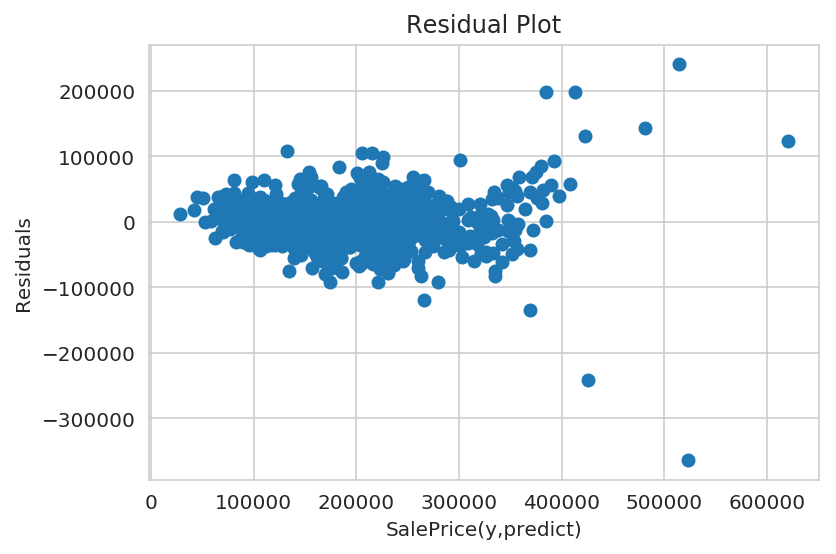

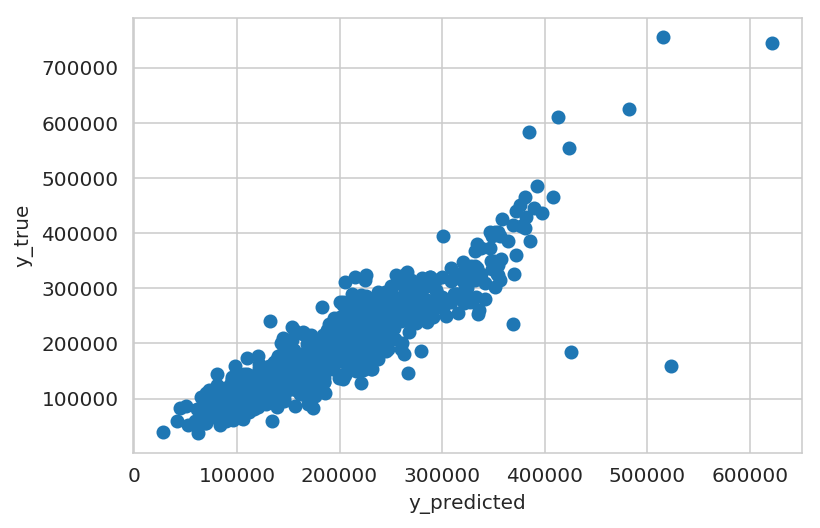

In [126]:
plt.scatter(x=y_pred,y=residuals)
plt.xlabel('SalePrice(y,predict)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
plt.scatter(x=y_pred,y=y_true)
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.show()

The residual plot the scatter plot of the y predict and y true do not show any insignificant issue. The residual plot shows a relatively uniform plot of points and the y_true vs y_predict plot shows a linear relationship between both variables. 

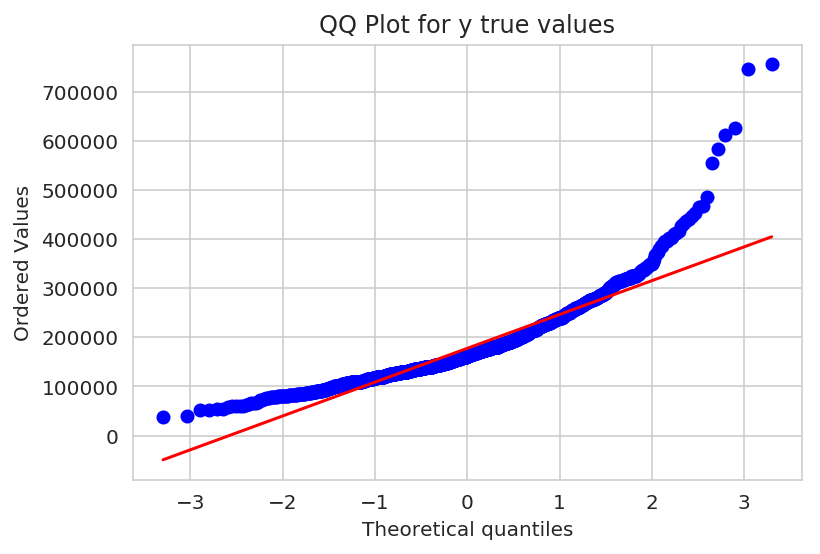

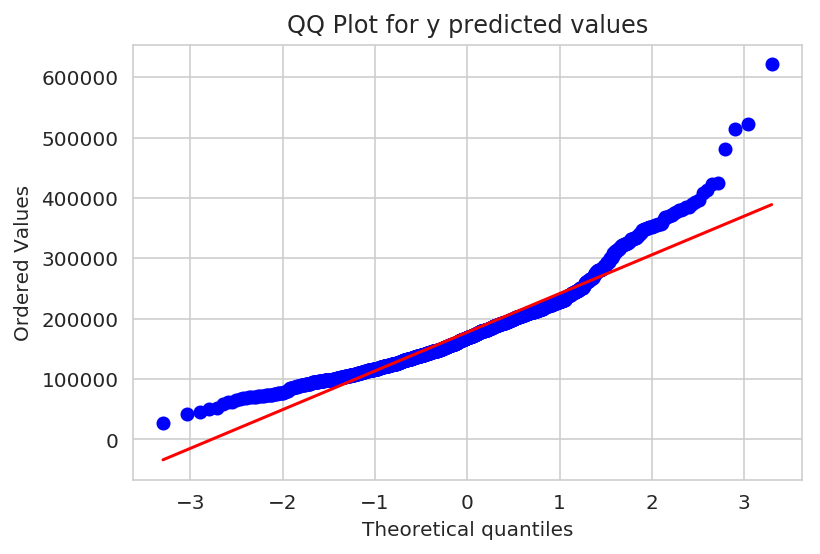

In [127]:
import pylab 
import scipy.stats as stats

stats.probplot(y_true, dist="norm", plot=pylab)
plt.title('QQ Plot for y true values')
pylab.show()
stats.probplot(y_pred, dist="norm", plot=pylab)
plt.title('QQ Plot for y predicted values')
pylab.show()

From the QQ-Plots, the y true and y predicted values are showing some normality which complies to the regression assumption. However, at the ends of the both plots, the points start to stray away from the normal distribution line, there are signs of kurtosis. The y distribution has been investigated earlier and it was found to have a positive skewness. In order to resolve this variation away from the normal distribution line, the y value could be power transformed.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

## Target

In [128]:
y_true2=residuals
y_true2.head()

231     56212.854646
496     48139.315862
654      2238.219671
661     47560.082574
691    240244.361569
Name: SalePrice, dtype: float64

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Residual Distribution')

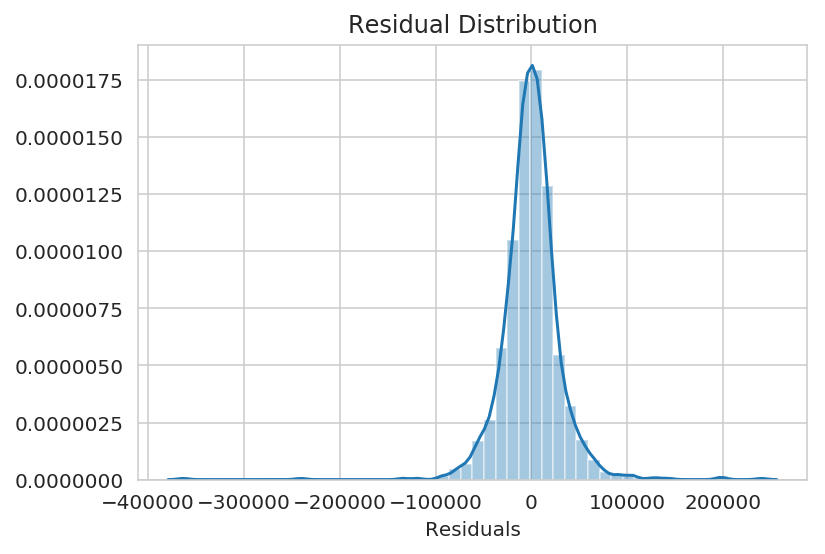

In [129]:
sns.distplot(y_true2)
plt.xlabel('Residuals')
plt.title('Residual Distribution')

## Predictors (Renovateable Features)

In [130]:
#hse_1[['Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond']] done

#hse_1[['RoofStyle','RoofMatl']] done

#hse_1[['Heating','HeatingQC','CentralAir','Electrical']] done

#hse_1[['Fireplaces','FireplaceQu']] done

#hse_1['Fence'] done

#hse_1[['MiscFeature']]

#hse_1[['Utilities']] done

#hse_1[['Street','Alley']]

### Investigation 2.1.1 SalePrice_Residual vs Fence

In [131]:
hse_fence=pd.concat([pd.get_dummies(hse_1['Fence']),y_true2],axis=1)
hse_fence.columns=['Fence_GdPrv','Fence_GdWo','Fence_MnPrv','Fence_MnWw','SalePrice_Residual']
hse_fence.head()

Fence_GdPrv  Fence_GdWo  Fence_MnPrv  Fence_MnWw  SalePrice_Residual
231            0           0            0           0        56212.854646
496            0           0            0           0        48139.315862
654            0           0            0           0         2238.219671
661            0           0            0           0        47560.082574
691            0           0            0           0       240244.361569

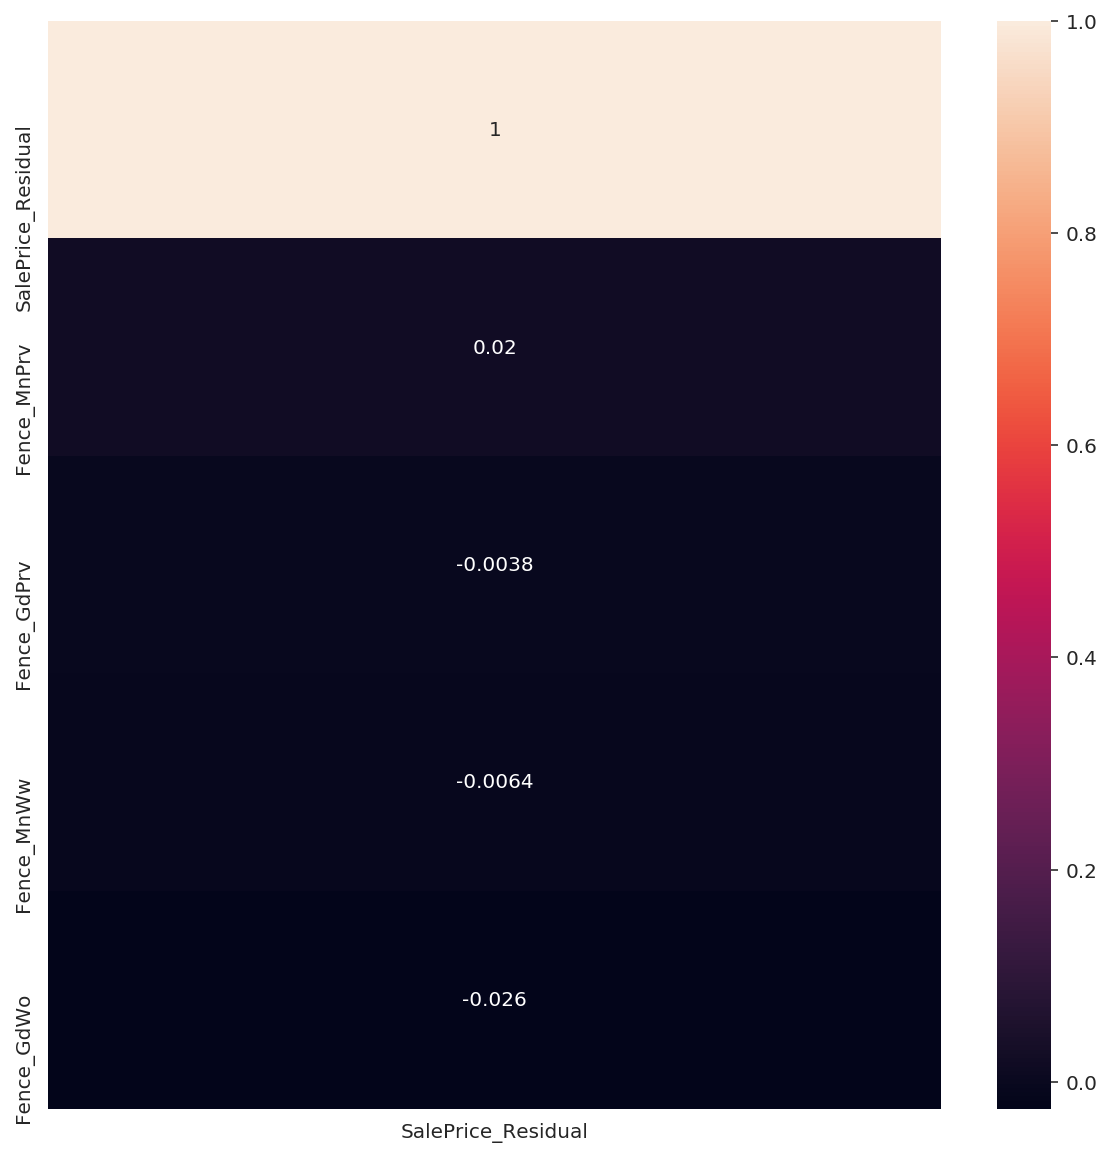

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_fence.corr('spearman')[['SalePrice_Residual']].sort_values(by='SalePrice_Residual', ascending=False), annot=True)

### Investigation 2.1.2 SalePrice_Residual vs Fireplaces,FireplaceQu 

In [133]:
dummy_fireplace1=pd.get_dummies(hse_1['FireplaceQu']).multiply(hse_1['Fireplaces'],axis='index')
dummy_fireplace1.columns=['Ex_Fireplaces', 'Fa_Fireplaces', 'Gd_Fireplaces', 'Po_Fireplaces', 'TA_Fireplaces']
dummy_fireplace2=pd.get_dummies(hse_1['FireplaceQu'])
dummy_fireplace2.columns=['Ex_FireplaceQU', 'Fa_FireplaceQU', 'Gd_FireplaceQU', 'Po_FireplaceQU', 'TA_FireplaceQU']

In [134]:
hse_fireplace=pd.concat([hse_1[['Fireplaces']],dummy_fireplace2,dummy_fireplace1],axis=1)
# hse_fireplace.columns=['Fireplaces','FireplaceQu']
hse_fireplace['SalePrice_Residuals']=y_true2
hse_fireplace.columns

Index(['Fireplaces', 'Ex_FireplaceQU', 'Fa_FireplaceQU', 'Gd_FireplaceQU',
       'Po_FireplaceQU', 'TA_FireplaceQU', 'Ex_Fireplaces', 'Fa_Fireplaces',
       'Gd_Fireplaces', 'Po_Fireplaces', 'TA_Fireplaces',
       'SalePrice_Residuals'],
      dtype='object')

In [135]:
hse_fireplace.corr()

Fireplaces  Ex_FireplaceQU  Fa_FireplaceQU  \
Fireplaces             1.000000        0.131731        0.140012   
Ex_FireplaceQU         0.131731        1.000000       -0.019308   
Fa_FireplaceQU         0.140012       -0.019308        1.000000   
Gd_FireplaceQU         0.493605       -0.072654       -0.089334   
Po_FireplaceQU         0.074458       -0.014962       -0.018397   
TA_FireplaceQU         0.464731       -0.065998       -0.081150   
Ex_Fireplaces          0.162280        0.920039       -0.017764   
Fa_Fireplaces          0.170215       -0.017978        0.931105   
Gd_Fireplaces          0.563435       -0.068111       -0.083748   
Po_Fireplaces          0.074458       -0.014962       -0.018397   
TA_Fireplaces          0.529138       -0.062094       -0.076350   
SalePrice_Residuals    0.125949        0.079748        0.008595   

                     Gd_FireplaceQU  Po_FireplaceQU  TA_FireplaceQU  \
Fireplaces                 0.493605        0.074458        0.464731   
Ex_FireplaceQU            -0.072654       -0.014962       -0.065998   
Fa_FireplaceQU            -0.089334       -0.018397       -0.081150   
Gd_FireplaceQU             1.000000       -0.069223       -0.305354   
Po_FireplaceQU            -0.069223        1.000000       -0.062881   
TA_FireplaceQU            -0.305354       -0.062881        1.000000   
Ex_Fireplaces             -0.066844       -0.013765       -0.060720   
Fa_Fireplaces             -0.083179       -0.017129       -0.075559   
Gd_Fireplaces              0.937466       -0.064895       -0.286259   
Po_Fireplaces             -0.069223        1.000000       -0.062881   
TA_Fireplaces             -0.287292       -0.059162        0.940850   
SalePrice_Residuals        0.117100       -0.033880       -0.004160   

                     Ex_Fireplaces  Fa_Fireplaces  Gd_Fireplaces  \
Fireplaces                0.162280       0.170215       0.563435   
Ex_FireplaceQU            0.920039      -0.017978      -0.068111   
Fa_FireplaceQU           -0.017764       0.931105      -0.083748   
Gd_FireplaceQU           -0.066844      -0.083179       0.937466   
Po_FireplaceQU           -0.013765      -0.017129      -0.064895   
TA_FireplaceQU           -0.060720      -0.075559      -0.286259   
Ex_Fireplaces             1.000000      -0.016540      -0.062664   
Fa_Fireplaces            -0.016540       1.000000      -0.077978   
Gd_Fireplaces            -0.062664      -0.077978       1.000000   
Po_Fireplaces            -0.013765      -0.017129      -0.064895   
TA_Fireplaces            -0.057129      -0.071089      -0.269327   
SalePrice_Residuals       0.094186       0.010566       0.112611   

                     Po_Fireplaces  TA_Fireplaces  SalePrice_Residuals  
Fireplaces                0.074458       0.529138             0.125949  
Ex_FireplaceQU           -0.014962      -0.062094             0.079748  
Fa_FireplaceQU           -0.018397      -0.076350             0.008595  
Gd_FireplaceQU           -0.069223      -0.287292             0.117100  
Po_FireplaceQU            1.000000      -0.059162            -0.033880  
TA_FireplaceQU           -0.062881       0.940850            -0.004160  
Ex_Fireplaces            -0.013765      -0.057129             0.094186  
Fa_Fireplaces            -0.017129      -0.071089             0.010566  
Gd_Fireplaces            -0.064895      -0.269327             0.112611  
Po_Fireplaces             1.000000      -0.059162            -0.033880  
TA_Fireplaces            -0.059162       1.000000             0.012792  
SalePrice_Residuals      -0.033880       0.012792             1.000000

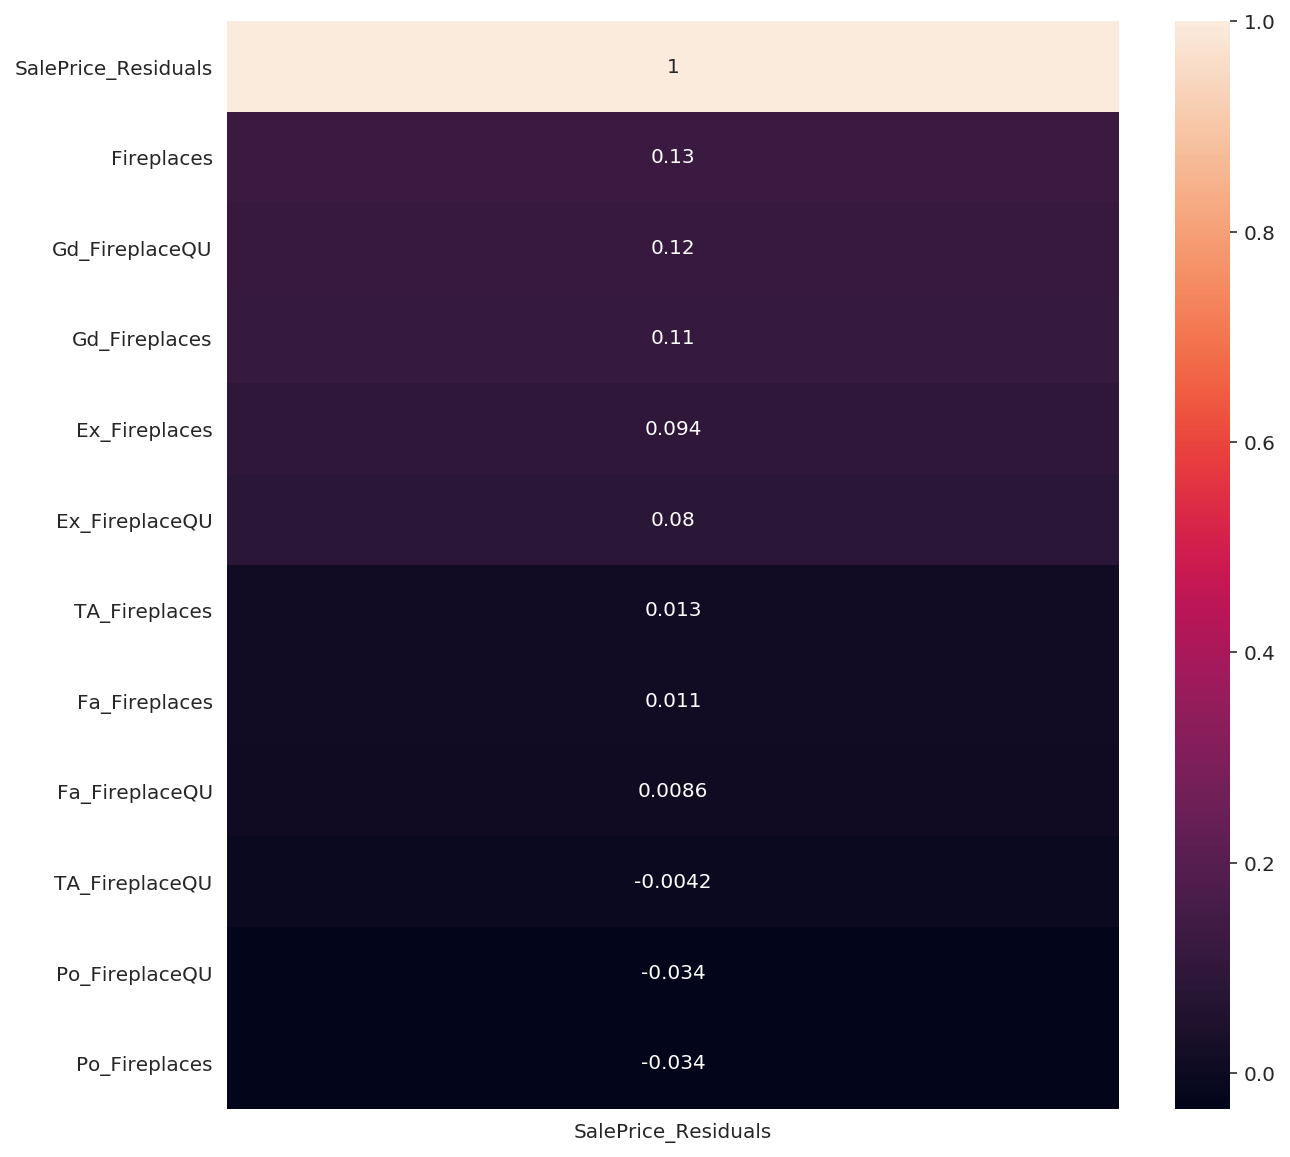

In [136]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_fireplace.corr('pearson')[['SalePrice_Residuals']].sort_values(by='SalePrice_Residuals', ascending=False), annot=True)

### Investigation 2.1.3 SalePrice_Residual vs 'RoofStyle','RoofMatl'

In [137]:
hse_roof=pd.concat([pd.get_dummies(hse_1[['RoofStyle','RoofMatl']])],axis=1)
hse_roof['SalePrice_Residuals']=y_true2
hse_roof.columns

Index(['RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'SalePrice_Residuals'],
      dtype='object')

In [138]:
hse_roof.corr()

RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  \
RoofStyle_Flat             1.000000        -0.185385          -0.008078   
RoofStyle_Gable           -0.185385         1.000000          -0.162421   
RoofStyle_Gambrel         -0.008078        -0.162421           1.000000   
RoofStyle_Hip             -0.046359        -0.932151          -0.040616   
RoofStyle_Mansard         -0.006751        -0.135747          -0.005915   
RoofStyle_Shed            -0.003602        -0.072432          -0.003156   
RoofMatl_ClyTile          -0.002546        -0.051199          -0.002231   
RoofMatl_CompShg          -0.675744         0.186061           0.011019   
RoofMatl_Membran           0.276177        -0.051199          -0.002231   
RoofMatl_Metal             0.276177        -0.051199          -0.002231   
RoofMatl_Roll             -0.002546         0.013735          -0.002231   
RoofMatl_Tar&Grv           0.834879        -0.150761          -0.007425   
RoofMatl_WdShake          -0.005702        -0.114646          -0.004995   
RoofMatl_WdShngl          -0.005098        -0.005002          -0.004467   
SalePrice_Residuals       -0.004758        -0.073372           0.033230   

                     RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  \
RoofStyle_Flat           -0.046359          -0.006751       -0.003602   
RoofStyle_Gable          -0.932151          -0.135747       -0.072432   
RoofStyle_Gambrel        -0.040616          -0.005915       -0.003156   
RoofStyle_Hip             1.000000          -0.033946       -0.018113   
RoofStyle_Mansard        -0.033946           1.000000       -0.002638   
RoofStyle_Shed           -0.018113          -0.002638        1.000000   
RoofMatl_ClyTile          0.054926          -0.001865       -0.000995   
RoofMatl_CompShg          0.007483          -0.146796       -0.140759   
RoofMatl_Membran         -0.012803          -0.001865       -0.000995   
RoofMatl_Metal           -0.012803          -0.001865       -0.000995   
RoofMatl_Roll            -0.012803          -0.001865       -0.000995   
RoofMatl_Tar&Grv         -0.042614          -0.006206       -0.003311   
RoofMatl_WdShake          0.031995           0.335318        0.314780   
RoofMatl_WdShngl          0.008267          -0.003733       -0.001992   
SalePrice_Residuals       0.070890           0.003584       -0.009754   

                     RoofMatl_ClyTile  RoofMatl_CompShg  RoofMatl_Membran  \
RoofStyle_Flat              -0.002546         -0.675744          0.276177   
RoofStyle_Gable             -0.051199          0.186061         -0.051199   
RoofStyle_Gambrel           -0.002231          0.011019         -0.002231   
RoofStyle_Hip                0.054926          0.007483         -0.012803   
RoofStyle_Mansard           -0.001865         -0.146796         -0.001865   
RoofStyle_Shed              -0.000995         -0.140759         -0.000995   
RoofMatl_ClyTile             1.000000         -0.202467         -0.000703   
RoofMatl_CompShg            -0.202467          1.000000         -0.202467   
RoofMatl_Membran            -0.000703         -0.202467          1.000000   
RoofMatl_Metal              -0.000703         -0.202467         -0.000703   
RoofMatl_Roll               -0.000703         -0.202467         -0.000703   
RoofMatl_Tar&Grv            -0.002341         -0.673879         -0.002341   
RoofMatl_WdShake            -0.001575         -0.453367         -0.001575   
RoofMatl_WdShngl            -0.001408         -0.405361         -0.001408   
SalePrice_Residuals         -0.309196          0.012974          0.027596   

                     RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  \
RoofStyle_Flat             0.276177      -0.002546          0.834879   
RoofStyle_Gable           -0.051199       0.013735         -0.150761   
RoofStyle_Gambrel         -0.002231      -0.002231         -0.007425   
RoofStyle_Hip             -0.012803      -0.012803         -0.042614   
RoofStyle_Mansard         -0.001865      -0.001865        

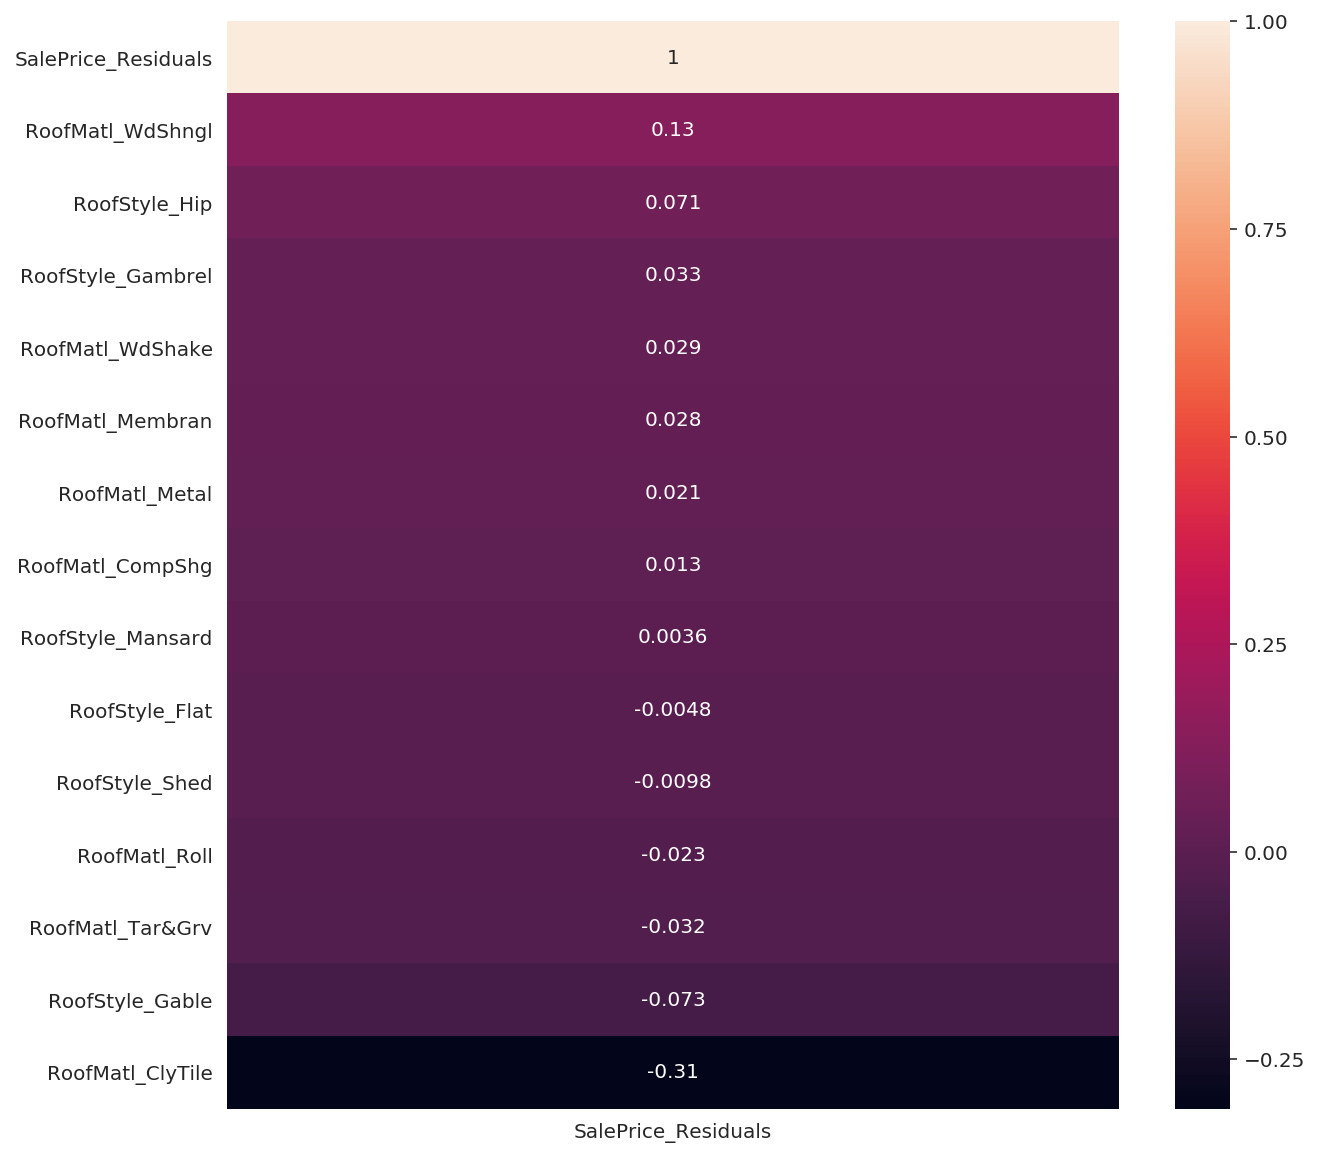

In [139]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_roof.corr('pearson')[['SalePrice_Residuals']].sort_values(by='SalePrice_Residuals', ascending=False), annot=True)

### Investigation 2.1.4 SalePrice_Residual vs 'Heating','HeatingQC', 'CentralAir', 'Electrical'

In [140]:
hse_1[['Heating','HeatingQC', 'CentralAir', 'Electrical','Utilities']].isnull().any()

Heating       False
HeatingQC     False
CentralAir    False
Electrical     True
Utilities     False
dtype: bool

In [141]:
pd.get_dummies(hse_1[['Heating','HeatingQC', 'CentralAir', 'Electrical','Utilities']])

Heating_Floor  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  \
231               0             1             0             0             0   
496               0             1             0             0             0   
654               0             1             0             0             0   
661               0             1             0             0             0   
691               0             1             0             0             0   
718               0             1             0             0             0   
763               0             1             0             0             0   
981               0             1             0             0             0   
990               0             1             0             0             0   
1169              0             1             0             0             0   
1182              0             1             0             0             0   
1313              0             1             0             0             0   
1353              0             1             0             0             0   
1373              0             1             0             0             0   
1417              0             1             0             0             0   
11                0             1             0             0             0   
151               0             1             0             0             0   
161               0             1             0             0             0   
224               0             1             0             0             0   
278               0             1             0             0             0   
309               0             1             0             0             0   
320               0             1             0             0             0   
321               0             1             0             0             0   
349               0             1             0             0             0   
389               0             1             0             0             0   
440               0             1             0             0             0   
473               0             1             0             0             0   
477               0             1             0             0             0   
481               0             1             0             0             0   
515               0             1             0             0             0   
...             ...           ...           ...           ...           ...   
1429              0             1             0             0             0   
1430              0             1             0             0             0   
1431              0             1             0             0             0   
1432              0             1             0             0             0   
1433              0             1             0             0             0   
1434              0             1             0             0             0   
1435              0             1             0             0             0   
1436              0             1             0             0             0   
1438              0             1             0             0             0   
1439              0             1             0             0             0   
1440              0             1             0             0             0   
1441              0             1             0             0             0   
1442              0             1             0             0             0   
1443              0             0             0             1             0   
1444              0             1             0             0             0   
1445              0             1             0             0             0   
1446              0             1             0             0             0   
1447              0             1             0             0             0   
1448              0             1             0         

In [142]:
hse_utilities=pd.concat([pd.get_dummies(hse_1[['Heating','HeatingQC', 'CentralAir', 'Electrical','Utilities']])],axis=1)
hse_utilities['SalePrice_Residuals']=y_true2

In [143]:
hse_utilities.corr()

Heating_Floor  Heating_GasA  Heating_GasW  Heating_Grav  \
Heating_Floor             1.000000     -0.180703     -0.002828     -0.001865   
Heating_GasA             -0.180703      1.000000     -0.726654     -0.479107   
Heating_GasW             -0.002828     -0.726654      1.000000     -0.007498   
Heating_Grav             -0.001865     -0.479107     -0.007498      1.000000   
Heating_OthW             -0.000995     -0.255642     -0.004001     -0.002638   
Heating_Wall             -0.001408     -0.361788     -0.005662     -0.003733   
HeatingQC_Ex             -0.026762      0.138315     -0.094287     -0.070955   
HeatingQC_Fa             -0.005008     -0.374696      0.089517      0.372317   
HeatingQC_Gd             -0.011854      0.039343     -0.011892     -0.031430   
HeatingQC_Po             -0.000703      0.003892     -0.002828     -0.001865   
HeatingQC_TA              0.041119     -0.034235      0.077555     -0.045344   
CentralAir_N              0.102668     -0.467146      0.275229      0.272208   
CentralAir_Y             -0.102668      0.467146     -0.275229     -0.272208   
Electrical_FuseA         -0.006891     -0.102547      0.027055      0.105527   
Electrical_FuseF         -0.003688     -0.194718      0.082872      0.137463   
Electrical_FuseP         -0.001219      0.006745     -0.004902     -0.003232   
Electrical_Mix           -0.000703      0.003892     -0.002828     -0.001865   
Electrical_SBrkr          0.008121      0.182201     -0.062567     -0.157850   
Utilities_AllPub          0.000703     -0.003892      0.002828      0.001865   
Utilities_NoSeWa         -0.000703      0.003892     -0.002828     -0.001865   
SalePrice_Residuals       0.003313      0.025689     -0.015863     -0.005671   

                     Heating_OthW  Heating_Wall  HeatingQC_Ex  HeatingQC_Fa  \
Heating_Floor           -0.000995     -0.001408     -0.026762     -0.005008   
Heating_GasA            -0.255642     -0.361788      0.138315     -0.374696   
Heating_GasW            -0.004001     -0.005662     -0.094287      0.089517   
Heating_Grav            -0.002638     -0.003733     -0.070955      0.372317   
Heating_OthW             1.000000     -0.001992     -0.037860      0.198661   
Heating_Wall            -0.001992      1.000000     -0.053580      0.208354   
HeatingQC_Ex            -0.037860     -0.053580      1.000000     -0.190578   
HeatingQC_Fa             0.198661      0.208354     -0.190578      1.000000   
HeatingQC_Gd            -0.016771     -0.023734     -0.451128     -0.084418   
HeatingQC_Po            -0.000995     -0.001408     -0.026762     -0.005008   
HeatingQC_TA            -0.024195     -0.005099     -0.650838     -0.121789   
CentralAir_N             0.145245      0.205552     -0.220034      0.333212   
CentralAir_Y            -0.145245     -0.205552      0.220034     -0.333212   
Electrical_FuseA        -0.009748      0.095267     -0.129412      0.077599   
Electrical_FuseF        -0.005217      0.187192     -0.088838      0.143225   
Electrical_FuseP        -0.001724     -0.002440     -0.046386     -0.008680   
Electrical_Mix          -0.000995     -0.001408     -0.026762     -0.005008   
Electrical_SBrkr         0.011488     -0.173379      0.168468     -0.134889   
Utilities_AllPub         0.000995      0.001408      0.026762      0.005008   
Utilities_NoSeWa        -0.000995     -0.001408     -0.026762     -0.005008   
SalePrice_Residuals     -0.027511     -0.012810      0.086243     -0.019059   

                     HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA  CentralAir_N  \
Heating_Floor           -0.011854     -0.000703      0.041119      0.102668   
Heating_GasA             0.039343      0.003892     -0.034235     -0.467146   
Heating_GasW            -0.011892     -0.002828      0.077555      0.275229   
Heating_Grav            -0.031430     -0.001865     -0.045344      0.272208   
Heating_OthW            -0.016771     -0.000995     -0.024195      0.145245   
Heating_Wall            -0.023734     -0.001408

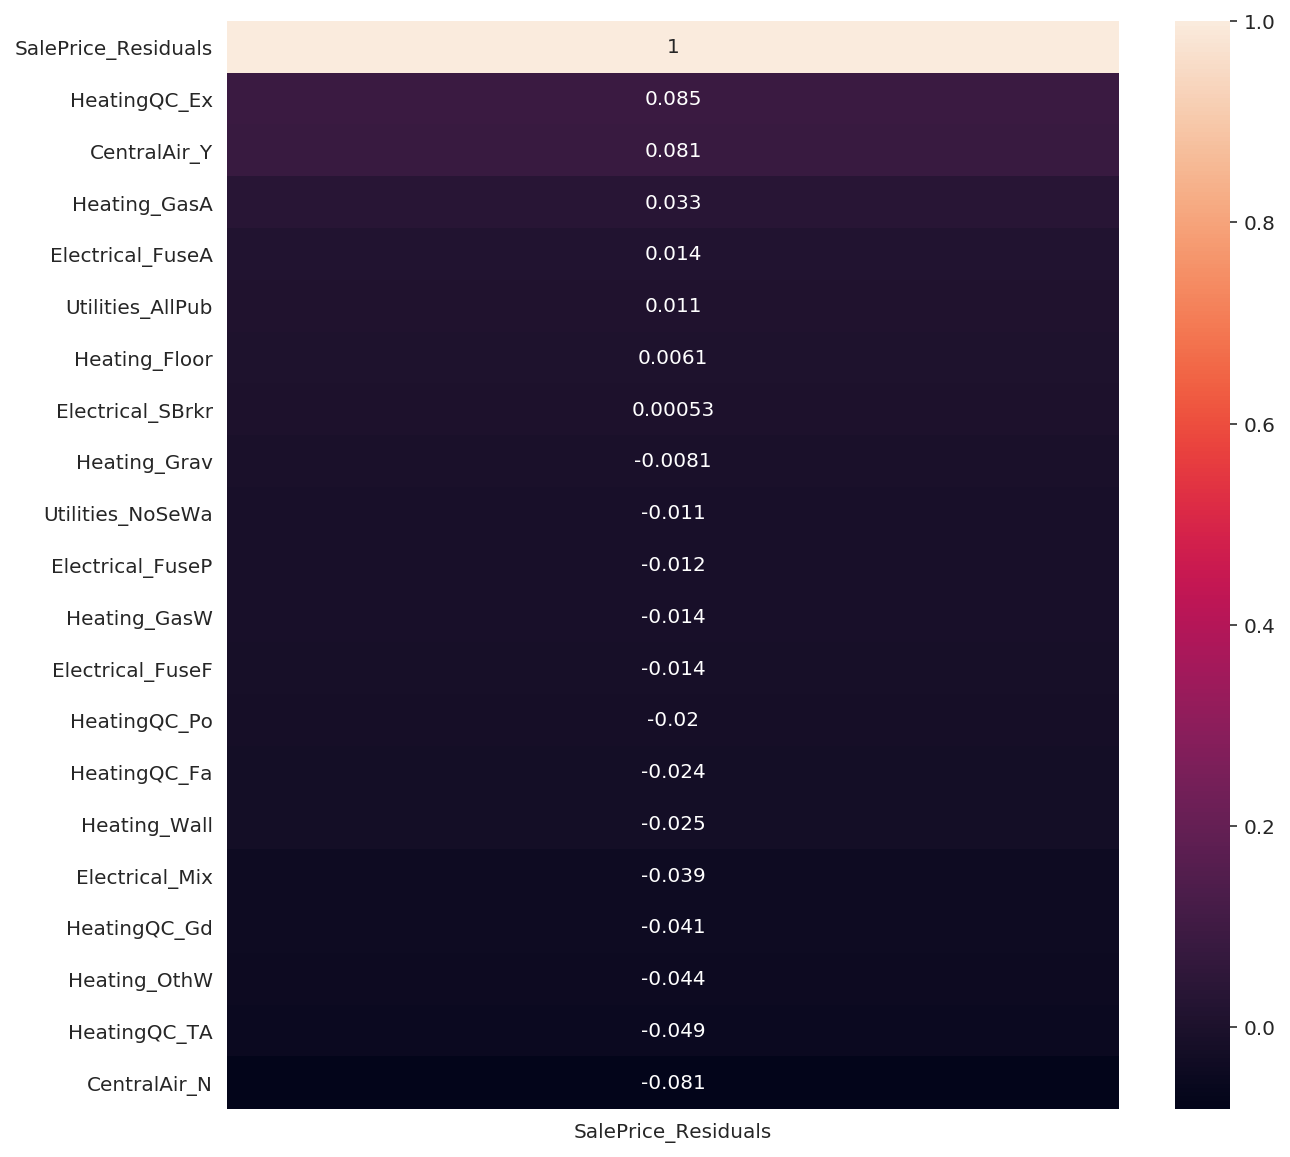

In [144]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_utilities.corr('spearman')[['SalePrice_Residuals']].sort_values(by='SalePrice_Residuals', ascending=False), annot=True)

## Investigation 2.1.5 SalePrice vs 'Exterior1st','Exterior2nd','ExterQual','ExterCond','MasVnrType','MasVnrArea'

In [145]:
hse_1['MasVnrType'].fillna(value=pd.np.nan, inplace=True)
hse_1['MasVnrType'].replace('None', np.nan, inplace=True)
hse_1['MasVnrArea'].fillna(value=0,inplace=True)

In [146]:
hse_1['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [147]:
dummy_exterior1=pd.get_dummies(hse_1['MasVnrType'])
dummy_exterior2=pd.get_dummies(hse_1[['Exterior1st','Exterior2nd','ExterQual','ExterCond']])

In [148]:
dummy_exterior1.columns=['MasVnrType_BrkCmn','MasVnrType_BrkFace','MasVnrType_Stone']

In [149]:
dummy_exterior1_1=dummy_exterior1[['MasVnrType_BrkCmn','MasVnrType_BrkFace','MasVnrType_Stone']].multiply(hse_1['MasVnrArea'],axis='index')
dummy_exterior1_1.columns=['MasVnrType_BrkCmn_A','MasVnrType_BrkFace_A','MasVnrType_Stone_A']

In [150]:
hse_exterior=pd.concat([dummy_exterior1,dummy_exterior1_1,dummy_exterior2,hse_1['MasVnrArea']],axis=1)
hse_exterior['SalePrice_Residuals']=y_true2

In [151]:
hse_exterior.corr()

MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_Stone  \
MasVnrType_BrkCmn              1.000000           -0.068828         -0.030893   
MasVnrType_BrkFace            -0.068828            1.000000         -0.199591   
MasVnrType_Stone              -0.030893           -0.199591          1.000000   
MasVnrType_BrkCmn_A            0.813315           -0.055979         -0.025126   
MasVnrType_BrkFace_A          -0.048826            0.709389         -0.141587   
MasVnrType_Stone_A            -0.024640           -0.159189          0.797576   
Exterior1st_AsbShng           -0.012007           -0.064309         -0.012530   
Exterior1st_AsphShn           -0.002737           -0.017684         -0.007937   
Exterior1st_BrkComm           -0.003872           -0.025017         -0.011229   
Exterior1st_BrkFace           -0.018865           -0.121880         -0.040242   
Exterior1st_CBlock            -0.002737           -0.017684         -0.007937   
Exterior1st_CemntBd           -0.020891           -0.048835          0.123620   
Exterior1st_HdBoard            0.012513            0.174827         -0.079334   
Exterior1st_ImStucc           -0.002737           -0.017684         -0.007937   
Exterior1st_MetalSd           -0.004730           -0.040803         -0.089726   
Exterior1st_Plywood           -0.003076            0.060147         -0.055685   
Exterior1st_Stone             -0.003872           -0.025017         -0.011229   
Exterior1st_Stucco             0.041337           -0.061325         -0.018077   
Exterior1st_VinylSd           -0.047531            0.061072          0.222846   
Exterior1st_Wd Sdng            0.056276           -0.110938         -0.114778   
Exterior1st_WdShing            0.038574           -0.042820         -0.020553   
Exterior2nd_AsbShng           -0.012007           -0.064309         -0.012530   
Exterior2nd_AsphShn           -0.004744            0.035735         -0.013757   
Exterior2nd_Brk Cmn           -0.007257           -0.046885         -0.021045   
Exterior2nd_BrkFace           -0.013230           -0.085471         -0.038364   
Exterior2nd_CBlock            -0.002737           -0.017684         -0.007937   
Exterior2nd_CmentBd           -0.020696           -0.046828          0.125784   
Exterior2nd_HdBoard            0.035759            0.171313         -0.072250   
Exterior2nd_ImStucc           -0.008683            0.016804          0.005445   
Exterior2nd_MetalSd           -0.003552           -0.046268         -0.087213   
Exterior2nd_Other             -0.002737            0.039768         -0.007937   
Exterior2nd_Plywood           -0.011200            0.038727         -0.056452   
Exterior2nd_Stone             -0.006129           -0.039597         -0.017773   
Exterior2nd_Stucco             0.038574           -0.065996         -0.020553   
Exterior2nd_VinylSd           -0.046097            0.069022          0.196580   
Exterior2nd_Wd Sdng            0.039801           -0.111842         -0.110719   
Exterior2nd_Wd Shng            0.027191           -0.078346          0.033235   
ExterQual_Ex                  -0.018437            0.056788          0.242107   
ExterQual_Fa                  -0.009110           -0.058857         -0.026418   
ExterQual_Gd                  -0.043485            0.138134          0.212949   
ExterQual_TA                   0.050659           -0.144362         -0.289620   
ExterCond_Ex                  -0.004744           -0.030650         -0.013757   
ExterCond_Fa                   0.037297           -0.056869         -0.040833   
ExterCond_Gd                   0.011552           -0.028993         -0.082582   
ExterCond_Po                  -0.002737           -0.017684         -0.007937   
ExterCond_TA                  -0.025055            0.055773          0.095288   
MasVnrArea                     0.084792            0.578129          0.224573   
SalePrice_Residuals           -0.052857           -0.024593          0.020144   

                      MasVnrType_BrkCmn_A  MasVnrTyp

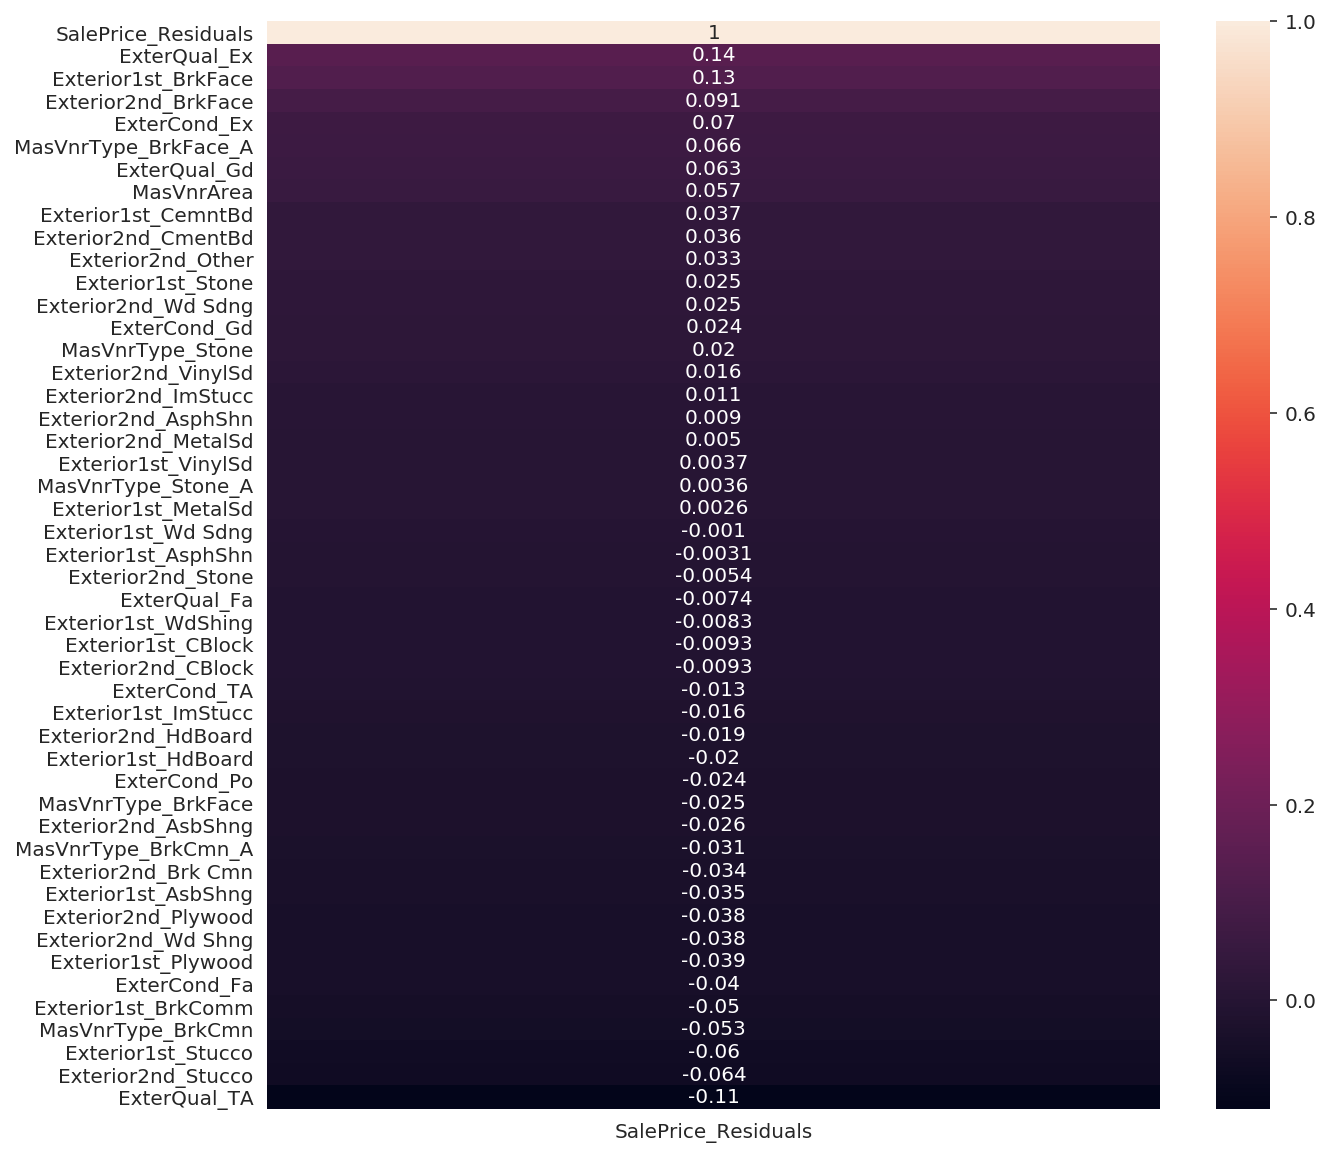

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(hse_exterior.corr('pearson')[['SalePrice_Residuals']].sort_values(by='SalePrice_Residuals', ascending=False), annot=True)

### Investigation 2.1.6 SalePrice_Residual vs 'Street','Alley'

In [153]:
hse_1[['Street','Alley']].isnull().any()

Street    False
Alley      True
dtype: bool

In [154]:
hse_1['Alley'].fillna(value=np.nan,inplace=True)

In [155]:
dummy_street_alley=pd.get_dummies(hse_1[['Street','Alley']])

In [156]:
hse_street_alley=dummy_street_alley

In [157]:
hse_street_alley['SalePrice_Residual']=y_true2


In [158]:
hse_street_alley.corr()

Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  \
Street_Grvl            1.000000    -1.000000   -0.010132   -0.008913   
Street_Pave           -1.000000     1.000000    0.010132    0.008913   
Alley_Grvl            -0.010132     0.010132    1.000000   -0.032034   
Alley_Pave            -0.008913     0.008913   -0.032034    1.000000   
SalePrice_Residual    -0.053978     0.053978   -0.025483    0.033810   

                    SalePrice_Residual  
Street_Grvl                  -0.053978  
Street_Pave                   0.053978  
Alley_Grvl                   -0.025483  
Alley_Pave                    0.033810  
SalePrice_Residual            1.000000

In [159]:
data10=hse_utilities['HeatingQC_Ex']

data11=hse_fireplace[['Fireplaces','Gd_FireplaceQU','Gd_Fireplaces']]

data12=hse_roof[['RoofMatl_ClyTile']]

data13=hse_exterior[['ExterQual_Ex','Exterior1st_BrkFace','ExterQual_TA']]

data14=hse_street_alley[['Street_Grvl','Street_Pave']]

# data10=hse_utilities['HeatingQC_Ex']

# data11=hse_fireplace[['Fireplaces','Gd_Fireplaces','Gd_FireplaceQU']]

# data12=hse_roof[['RoofMatl_ClyTile']]

# data13=hse_exterior[['MasVnrType_Stone_A','ExterQual_Ex','MasVnrArea','MasVnrType_Stone','ExterQual_TA']]

In [160]:
X_pred=pd.concat([data10,data11,data12,data13,data14],axis=1)

In [161]:
X_pred.isnull().any()

HeatingQC_Ex           False
Fireplaces             False
Gd_FireplaceQU         False
Gd_Fireplaces          False
RoofMatl_ClyTile       False
ExterQual_Ex           False
Exterior1st_BrkFace    False
ExterQual_TA           False
Street_Grvl            False
Street_Pave            False
dtype: bool

In [162]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 231 to 1459
Data columns (total 10 columns):
HeatingQC_Ex           1423 non-null uint8
Fireplaces             1423 non-null int64
Gd_FireplaceQU         1423 non-null uint8
Gd_Fireplaces          1423 non-null int64
RoofMatl_ClyTile       1423 non-null uint8
ExterQual_Ex           1423 non-null uint8
Exterior1st_BrkFace    1423 non-null uint8
ExterQual_TA           1423 non-null uint8
Street_Grvl            1423 non-null uint8
Street_Pave            1423 non-null uint8
dtypes: int64(2), uint8(8)
memory usage: 44.5 KB


In [163]:
index1=x_pred[x_pred['YrSold']==2010].index
index2=x_pred[x_pred['YrSold']<2010].index

In [164]:
x2_test=X_pred.loc[index1]
y2_test=y_true2.loc[index1]
x2_train=X_pred.loc[index2]
y2_train=y_true2.loc[index2]


In [165]:
ss = StandardScaler()
x2s_train=ss.fit_transform(x2_train)
x2s_test=ss.fit_transform(x2_test)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [166]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(x2s_train, y2_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1267.7089535816083


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


In [167]:
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, x2s_train, y2_train, cv=10)

print(lasso_scores) # outputs all the R2 values from using Ridge 10KFolds
print(np.mean(lasso_scores)) # mean R2 values 

[-0.0851594   0.02957507  0.01594903 -0.12143694 -0.05915267  0.09950989
  0.06913579  0.01619886 -0.10059865  0.064124  ]
-0.007185501251948401


In [168]:
lasso.fit(x2s_train, y2_train)

lasso_coefs = pd.DataFrame({'variable':x2_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

variable         coef     abs_coef
4     RoofMatl_ClyTile -9918.213771  9918.213771
5         ExterQual_Ex  3131.974857  3131.974857
6  Exterior1st_BrkFace  2740.861414  2740.861414
1           Fireplaces  1607.594100  1607.594100
3        Gd_Fireplaces  1575.226663  1575.226663
7         ExterQual_TA -1346.347601  1346.347601
8          Street_Grvl  -530.048728   530.048728
0         HeatingQC_Ex   183.024705   183.024705
2       Gd_FireplaceQU     0.000000     0.000000
9          Street_Pave     0.000000     0.000000

### Summary 

The 2nd model is not a very good predicting model compared to the 1st model as the R squared value is very insignificant. Majority of the renovatable features do not have a strong correlation with the residuals.  Based on this model, it seems the features that deals with heat seems to be a criteria considered quite significantly and this is because Ames has very cool weather during winter. This could also explain the important of having good external facade quality to retain heat and expel cold during winter. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [169]:
# A: